# HOMEWORK FOR NORD SECURITY 

The goal is to have a file preprocessing pipeline with a working model, predicting the
malware with the highest accuracy on a given dataset. And, of course, having the minimum
number of false positives at the same time.

## Imports 

In [150]:
import os
import re
import pandas as pd
import numpy as np 
import pefile
import requests
import seaborn as sns
import scipy.stats as stats
from PIL import Image
from bitstring import BitArray

from tqdm import tqdm
from bitstring import BitArray
from bs4 import BeautifulSoup

from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, roc_curve, RocCurveDisplay

import tensorflow as tf 
import keras
from keras import layers
from keras.layers import Input
from keras.models import Model
from matplotlib import pyplot as plt

## downloading data 

I'll use the requests package to download data.

In [109]:
response = requests.get('http://s3-nord-challenge-data.s3-website.eu-central-1.amazonaws.com/1/00Tree.html')
soup = BeautifulSoup(response.content, 'html.parser')
fnames = [ i.text for i in soup.find_all("a")]
fnames = fnames[2:]

In [114]:
for name in fnames:
    url = "http://s3-nord-challenge-data.s3-website.eu-central-1.amazonaws.com/1/" + name
    response = requests.get(url, stream=True)
    print(name)
    with open("./data/1/" + name,'wb') as f:
        f.write(response.content)

00G8W57Cz6gRc0Xl41jSEMIFLR9iLDOx.exe
00gYviABxsPRDDr8JrYKT6LUuWqpzHe0.exe
00Nb1Q3mxXNb6fvAp3SrscnVWACdUwpM.exe
017xEB9ZOAAG3VdYpTc0kBPzlh40cPab.exe
01KX3RaIsPgUolmbUpt1FCYGTUv8CkEW.exe
01vgd5H6vf8eabjwvwbaGb1Tc5HZUdYZ.exe
01XgnxoPD16wn3C8YhiJq3UeTWTwtq56.exe
01ZseJudbJ3nzlsg1YpZaRbuDfAzv7MW.exe
02PwdMnzbvm9dXWOAG5Y7ihfwKa3ewGc.exe
02vt0butgJMGqXUq51y72dTI5Aj0k2A2.exe
0303VNErw5ceP5Nx5GPSTEnrtpdX9128.exe
03ixgT7kIcZnarJpWSg2cwIN8IH9DLIR.exe
03NmTF0VlROIiR6sVKtpoFPmdSz7zwkL.exe
03OCZb5Iw4xmwLIPJb2g0MLc1x1IjHvM.exe
03uIoE7kIaOAhbv1M5dMSSPSVq20ZiDt.exe
03wDK0Ivutb98o8bjKtdf7MYMJDoZ0Qk.exe
03yO56tBEeEQVr93fCkaQuKUUb4gINb1.exe
042gQrK2ljMReryL5bAMMugSyEEcYdvL.exe
04K69IjPh1XFVaciuyHoh0xTU26fUiNa.exe
04npxaxgLjvZqqI9yvzp8xHV0KUxz8RO.exe
04QaXcy6TCFume7R4bcZjYg61WslmgYV.exe
04s8eWKKgbPkuO68fLeeBVlQ7yA3uET5.exe
05fizHLsSpYgnA6la2RMc562rwvwpw0s.exe
05r5kEbpVZqVjBVuumX8B2MxTaIb9Ni8.exe
05RV6kQA8XHvEedh855OD3xd0ea3Zk3q.exe
06746cYkxxGDCUDmiiy1fk67vH4TOtB5.exe
06aftQpMaWw1NMGw3CYDMizLgKDHhfdE.exe
0

12vkzXjB5r049uYU3X4vEao2BoZHuKmO.exe
12vwmK8pnEyANeod4b3y90ktGs1BNLIS.dll
13BXAm56UNDojdBfpUuuQwuzMGUGjlcX.exe
14fbh9jpPU3mbHsilhk3nTmGY6xcqRRH.exe
14IfWsiAKx0ySQ8aWUcopdLF6B42lRmS.exe
14MXsZC31tLWfA2Ss6ZdhUzR3bMesqaO.exe
14PiJadvmepW0asB9iddCM1oKXQlpB9d.exe
14QapXx0KZJEEOq2nZp1MSdqPCFkDfZZ.exe
14QFPP1tBXbASo6RhsPlXGX2dhQ9E88u.exe
15FkuFSHG8HPKvgxtYTAwgPlGDIA8QUh.exe
15haJVZM3epK1zCepmQGrz9L7YSioPzd.exe
15Many63f99qmCwAHxpUKNGbvHIIuF1B.exe
15sNyCdZAykiDvpABt25XNw626iE7kpd.exe
167K2sEk53OOaISehyFcGINh2LpHCm6K.exe
16hiAEWPduDIRqok6ylnFPk0WHwmBodl.exe
16lZpchSULcBQhnY8vLkQQZUjYlYU8ym.exe
16RCYjHPm17cs5nLp3uyYVSEgazFSEWK.exe
178XqpmHfyQewbf5CqXGlFc3HNB3LbqD.exe
17RX0ObaC5gnv3jMMY0A2kADD3h1imjn.exe
17TJiB8pz1ILa0sBBInHlGQhuLjQSlp4.exe
18daQNucsGb4nXiftLIHg6yZCC4Co1cq.exe
18FvRQs83UIZ50XhPFMiVzFyM0X1eCxs.exe
18k1obR6vI5qlOuzS9YXQlS8gUtEmSxK.exe
18lRk1ZMQfk3D2TkqDxIEh5TMncPV7Kf.exe
18PNTRW9P4oXqvADYpDHv6AUSQlv8pLm.exe
18XdTN6gFnOzSsqlyc259mJhGbW32DFg.exe
18xf9yhM0xcqDtLwnn05GoaNobnytkHP.exe
1

1XXeHZbuNhHEdeHmarcXgmUBCaVLTglZ.exe
1XYtjGOu1Q3jj3FU4yZEHvygsfkXIGwy.exe
1Y03TZ6SFFr7SgituJLhCbJehMdCIcSx.exe
1YbDdIBzZJmSPWPuGzlqATZWEsT7voZC.exe
1YBFnMg9olZwMwSpDR2KlxfqbNUDhtMR.exe
1ykxd4Np6BZk9P66XVy2sbmyC1wbc96h.exe
1yMx9aC8awDLCeJsYjxclxRXsrzPLKUd.exe
1YTXfayTKkmvpjnGgBOJWsNZL27OOiUi.exe
1YUQqfDmkRtCWG30BJunU7bqyaSt45PY.exe
1z4vBEc5d6inbxvat7xhVBJCimBue2ID.exe
1z4vbXuSK5oV8SEfh8tLQsbMp3bnq4L2.exe
1ZAbyhYB7NbHBVZlLVI2Azofi9vOo34n.exe
1zBFnuyAU60oa2U3VdpvDTTFEPGJRvBg.exe
1ze5YX9SmR9g3nYZUrLjfZy2htvD02UW.exe
1Zl1X3CgXtNQ7eqrWh2B94JKhXFMucUW.exe
1ZPAXiwn00Jfrzc81ssIJxPHOSc1NwKe.exe
1zpBOFlVT9vKbUmGjzkG81w3qULqiUTY.exe
1zVM2UrJleHuEBCX6uF9Bggy4mFPjhay.exe
1zwMpNbLigbHFq84G3Fk3O0kfelECnX5.exe
1zxS8wRlENtHpk5mxthnosbCwmSlfWDv.exe
204OxPImQB6lULiHUz7lCbE5GSS5OpdT.exe
20b5nceHeYWYnkCGZuRL745bIZHX7abf.exe
20J7TCxGRooXFRaIuN7vCSoF94af4WsG.exe
20NXh8FLaGZw16Qumhy6uE30WVyOaJay.exe
20o13UEllyKt1JAgKlQFiBioBVCqxfr9.exe
20qczZmZDXYrXEAehQP84cI6CR9Z6kYG.exe
20Qqla0TkAmZJ1MO6kTwzHEZp2axzpEh.exe
2

2WBa2MWXGq6YuWXqmjKq0YOXewJZqiRM.exe
2weQ8jsnI8Q0PK0cSuniOUoxTMk3chaf.exe
2WMOyF7xLVzkj3aFKodXL6t4fLQYvUyf.exe
2wYUYrYavXgSIuSQj5QaYXHjJIC7Gwtr.exe
2WzegRRSQ4muXhuf8fNK3WfwcxWicUID.exe
2X0f5B3xbbOFRMn8RQ5gCcchVx9gYCso.exe
2x10RGOStFP8O1T72dsvEPtSPRJmuJAF.exe
2X3qpexc6CNOJY0HcOzTtrOISTiyMIGK.exe
2xBO8Fq6ay1uAJoQs20nJ8Fka9VSJWSD.exe
2XJmqJLbeNuLVuTzpGmC7x2KEkhB0Ybr.exe
2Xp8pX8xRFoJXrET4bqm8Oqr9WVE4ZeQ.exe
2xqsgyslfuXig7DcN00rrlQmlNPRMoUp.exe
2XRxVPNz6ZEun5pKAsVrq7srvu8u5HeM.exe
2Xt4u4rw0p4CUcN8mxibXG0Adfq9Of7e.exe
2xWAmQZ8aKDaJRYTQnJrN6j1O0rxZWcK.exe
2Y3fkxpF3MiGZNrfNLdA6LZkpGQXn04Q.exe
2y5lPWV8qCrojPRknCZNloYwjjkjavO0.exe
2yevxD7LflKXiNYR6vvkHSsbS9w7VQe6.exe
2yf0WCAY0ZU4mvEsb2leqYRc2K2XIr04.exe
2YF48fCakEWugghrtHtT5Jg4OpF0Vpcq.exe
2yhPYj8ffN12a9C2WtXdCB8j2XerXgft.dll
2yQoKBhEF9QIkvxACBSar5GnoH3BVFh4.exe
2Yrn76Wo0JUU4LzgSvj3C0X3fflTCln9.exe
2Yxx8uepaq2WKkCe56AImlV8zygLXAWl.exe
2z1nO4lUOK4GwEwT3VEsK0mkdppva3gf.exe
2Z3YqJDTIyxy2B8HT1yxcuoMz3tzgWMc.exe
2zCzNMXm4FLDUlUSvjuStIJoB84jhM6Z.exe
2

3wGWrah0hcS5mUFMx1jsoonueMUowfrs.exe
3wimJdO3GPCf5Cydu5WO6FEshnL2qY4h.exe
3Wlepj9YGVkBlPYMdeuJuqfunJqJPOGO.exe
3WMd6B5fxDyzVLYcrFUiXXASnoEb5VYA.exe
3woxWjRDjkvF7KfLJ8kOgdMYmm1UHkFk.exe
3wuERshaXcaWomWvRchoRwTNyAOhbcf4.exe
3WVX4K06AKaBEFzXl6jgD7V49zwBn1lO.exe
3xDAA8nzN5TfYKvJlZJJDPMTu9oCRWyT.exe
3xE4bSTsAwc3TaUhfwmjZEh6MMpZWRZu.exe
3XhIGS9Q4L3YqooKNmcMWj9Uah16EvV8.exe
3XRxWzRmyNedqqQPpW5kU2FHjzwerQm3.exe
3xsyIlcGRihwevrv5zgzadVhuIgSyGhi.exe
3Y3FVAq9s7bBVVET6LHhiGqp1gx1NEV4.exe
3Y4ycCKRWxb1FOr2l7gY4Mb36kxLRLKf.exe
3YeeRs0vlf81m8d9JPsF5KFxYupgoaty.exe
3Yh9DoJBOujAey2pHPyptqgOGt9Doucy.exe
3yJIQyoQI7S888YjakY8SbCFTarm9G2Y.exe
3yjuzEzw06f22JE6kiEmZa8HtOJZ5WkU.exe
3yoQsmqHUhmgooSkPMqZ6AkH4TgBYpcZ.exe
3ytjBM0WtLAiVf2ss21i1xfQZ2m1Cnyx.exe
3yVPk8GJC3mGRZX6rQtUFzY3aeXoAUYY.exe
3yxcyriLb9XcGmB7Tjh90ryVzXI6VHnX.exe
3yxVE8Bsod3KoGNbjaBZPY9dEc1SdwGP.exe
3zCYx580i8CJp1e2hE3OkoX1pAaIbdAH.exe
3zqmLNXGVmD961uJcRqo2FHnMwAIC16y.exe
3zS1olZ8pbjLoUk90R0WYnQxjgV8gWE1.exe
3zWP1NSGQUnhO8ZtH6ow4BjcUa86cHiL.exe
3

4TkRkaDvLeEDwMjqeTIHzjRtT7HHnADR.exe
4TljGYzQeS1BtkwELbLdKjrtImxnnW0r.exe
4TPcyuNZM7TAbDBW1xK4gHMhGQ5h44vJ.exe
4tQEaMDb0f9C7L7vKxJIVJLY2K4TxEa1.exe
4tSmAtRhEQY1KL5f5GIjLJOTksCjUCfO.exe
4Tt70L6a3WKwwQJOTJOEDwrtzEGSgSZn.exe
4txSkvxYlNgQjn7PFg321zYa6XOi8SaZ.exe
4u11tTlRUfTtppGpksw2Rnw1BMCFFAEp.exe
4U2pHEvivBgfno88g764933qKHa08AC7.exe
4uAjEuOKQoPtR5zZj0RwX1Lg9sBshPYT.exe
4ucEe7xChIdTp2GtiUfI3ymctvQvtsNY.exe
4ucioy4TacwU2i2ay7mSqxsI3vxHkBLq.exe
4UdFFEOVvne537owqUThT7VOAr5xglmO.exe
4uH128GgIksCeq3HrLM1yed1QCkgJNRq.exe
4ur9oMMYmanUYei8MwP7gdvOW4CfghVT.exe
4UsscZPpchIPoaGP0E0gePp41wIesaUB.exe
4uu7bESqNWmKHprlrEseTmEPcJnSmKcG.exe
4UVKLyW15tAVNKGjhNJxBA0InSmkhAsX.exe
4v6sCDRQIgGCkwAsLcfO3Th4ZEJlsFH4.exe
4VNo5b66FRw4wVmXND3tSZL2vXBEOhPW.exe
4vuvrp8JowxqdpiGye4TKtbCGsY6lc03.exe
4w9RXt5Iyy0u7GWsDysCKZAe8Jtacebl.exe
4Wb6VVAQ2bMEc6TwrKc85GcgWIZTQL1k.exe
4wBOPmLSUllerIlUOs8ieNV91kR6Gt59.exe
4wk8cVl6ZALN76G7PoJ8cpx7BP9x4QB2.exe
4wSixWouMVhL0786aP5Bz5tYGaViewPi.exe
4wViFdLOHXDzU4uk3zvCR4dNl9m67Diq.exe
4

5RI5YrrGh2LrDwnQ0l62eBjDthLVuasH.exe
5rK67hDQZAPjBNjcLwDLjOfnWEGVjDEN.exe
5rONt8S7WC2VytsgRx08Hv4B5DE3gZV5.exe
5rsdHOA7Wx19CoHjMJaLCaTWsFFgeMlK.exe
5RSUMghO8XKHEUFimKgaOjUzzXby41KI.exe
5rvOuaAYp6Pz9ODWIwrJmydIPPtBbR6g.exe
5rx1w6ZDLSPKtEmYwhOZHFQBC4ts31S0.exe
5RXml8vFxo1Ts4nAfklN7NgQwDFWfkOh.exe
5S1DzOMiFPhiD4bYdLrUFFVFxBwfNwK2.exe
5S39hmXggG1ZavrCivtXsNOUPDvnQxL1.exe
5sg66XD8hGrPGYPYJQVQIy9hmLpiLaQV.exe
5SGbml0A22JOWeg542v0gBbEmW1OIkF6.exe
5sLoWtQBGKuirR9rNKjq1rPSEUepSHeW.exe
5sUfJkBmM1WWEkcDkzal5huAwnzvN9uR.exe
5SuLqAnjcuCrGVqxqIl4hj2MrkhpaHxx.exe
5SuOEQs3HsB2DAwrRwSelGPS60UX7xd1.exe
5sysUVMNtm2VNQeB3W61bqdxa3aqcoR0.dll
5T34e0bPXZ4ngUwBkq5PpNXv5ImYWpmQ.exe
5t5ksgVAElnWnHbaRljP4hRGPcvy3JBc.exe
5t7ZU5TvAGDBR2joXk4XmUmyEZLoZU7h.exe
5TCrOQQscVWBmYL3zEYBLMQYFp53OlDZ.exe
5TdK558CbQbQ60591yDY3boFgHsz2IDt.exe
5TE4T2GEKIGxws7asYJeFF7um64tk5NA.exe
5tGyWfCUUItzk6pwxPByHFiLEfDRwaTA.exe
5TmlxtzShFZSvp6U6SbV2jEZiXAiVeX9.exe
5trLv9TusGdqh20QOQwDbJwU5wV8mhnP.dll
5TX9C7aHrN9luYeTjmEaJY0L4PKtPYZg.exe
5

6Owoju9XFMJU1pRei4CYy5W4qR4rnw5S.exe
6OzbjvSlECyz9xctxkKBimSvZ0riwoYS.dll
6p6IcjXrBPI96Gq8vFiLqEvRIybU2qaD.exe
6pCv4c0ny3oGT7nXXSibJLWunpmRbBPD.exe
6PFXmFqkrqp0uyiEonCMRZtFEDUF9Sod.exe
6Pl7bb0i8fk9jGRAiRzcjtuLemkN6Z42.exe
6POEucZHDGv1xjxiPCufgOUm2Kd4qsWj.exe
6PV0Tki3cz5p2QFlPRCOmPaCEsM0s15s.exe
6Q9oi8fQNKsWDwKmygRZEwjegvHQRRNO.exe
6QaTQdyZkNw7QtoECws3MRu0KnwiF7ML.exe
6QBCOh6omP27VaPRd9rPQM1XauBm0nCX.exe
6qGEt70B6ngp6DryxPjADY9tySf1lAcX.exe
6qOXAceTWQ2jlF0wRq8cMERr6KNjjAdO.exe
6QpvPMlOH9ux9bVC9EfzN9vS147heKaN.exe
6R3rJ5cJ323fCgA5NXyK5yBMJ6BHhnUW.dll
6r59UukjB9x0dQu11iXRbkMJsTOY5QBN.exe
6RFxE8K7FFv2GdVLMXt2xXRAcLk9BnGq.exe
6ri1TUNNYlDXZZbQ3FcWRihoXx8iHUY7.exe
6rjctBkdt27LmtovQSYvuYHaK7imAh0F.exe
6rvj7T53cxZcQL4vCYOxSu1t2L2aiv4i.exe
6RyfZ6R7KJUXxP2wIPm4LvvEfLkanL2E.exe
6rZ0NWOUJgsLhu8MBeIH4bo6IdkA05A2.exe
6s4xzUBtr6x21VAizZovb6nBjBbO7TRq.exe
6s6M7lBUz3AEb0yDFdLNipLeGU5vIzTp.exe
6S9iRlhObfTpwo8w1faOO4sGQEU3Iusm.exe
6sBWIoWWaNkusM5rPnhFnaz722ybwm3D.exe
6sGoWfCuCmlsydNO5AgfbW0du2umBq4Z.exe
6

7NQLQX6Vd7SEGLqeP8cm5hwhXLSG98ep.exe
7nRGoobmdhLmwiwgo6FoatV9TXpIeaq9.exe
7nv7kGNg4dvOVze9rxIqRPzbkzT5jomm.exe
7O59szpv7YBkH26iqMtxdoaeo8eytyth.exe
7O6Q3NB2HGckY1qFzBfhwytsyFUr2A50.exe
7ozaAfYi7FsEDIISsiQGpDZVPLhSvItb.exe
7P1l2Jysxm8hygqdqGDxhnOWbhl4WRkL.exe
7ph3wc1OaerHcExGm3G7XPlrbNYCgK91.exe
7phIoKJFerKBQ9UrZ6JjcZ7IYuA86vga.exe
7PLP6wO2trsfo6txjYPvPX61rpcGQYnT.exe
7ppXOxg2muoeB5JMqYvNtnEAc0cq69y2.exe
7PQ2v3AgJbZ4JB6WRe5nimf925upcmm9.exe
7PrXcdJOZH6NuMnmRxbUgwYCmRvHq2R2.exe
7PSVLEI1dCVZnZNHfnfwwPdxlCdZAh2e.exe
7pvDtDH3phCGKsMb5k2Ej7vORdyia8iB.exe
7Pxp9DMlgT9ZSiRylFgiDHj0FwYAgqcn.exe
7pZqEvwRh2tFZj8x5akXbPi3AZTJrSHL.exe
7qD1PLlleYUQ0pfq7KAdV1tiZiBIEnQf.exe
7QHPDvzQafixDnAtD2SFgy7khRy24K1i.exe
7Ql13y4PzLDWPtwYxSGRTP7V12aQiyPM.exe
7QUqp49EmdJ5iR6OzkmLiUt7azUwvE3q.exe
7Qv8gF1C9sB40RE76vsg5YW3Kfl792cI.exe
7qxehsp1l9gCKcuhN24TYYy4ClnGZXPA.exe
7qXFBbe0M0e7RvIzAgj9yWsZDSibNCJl.exe
7QzYBQXaUgTTK4IAAlNNoKneNMRqJTR6.exe
7r1DnuoX0lixOcVRQpu1w9vdVX3GD21b.exe
7r5pqPXfok8PoKQVM9OLbPLdUI8KZV6J.exe
7

8opJGNXmpGq4AshzDwFIRv1Q0is0jIAn.exe
8PBGQ5E5d8xTFuEB1MnQ2aNGDEg4lLcB.exe
8PeUsDrKmA7tKg3i6WmCFiXjTf9JvmMB.exe
8Pgwaagp5TXRxt4jylm3cYlLgerJovpj.exe
8Pixv7n73Na2hO8aEAK4fiyzqbljmZs2.exe
8pPhXwuM9db6j8FYupHrYB5YZmlxWXXV.exe
8prjZ0WVoKBBARw805bSwHJoOknudzyt.exe
8PZr3EWLvAKzgMkLO9bReaOzwiQCcP5c.exe
8q2hyZjaSannhW8bAPAG3Q1MV8Moq8W4.exe
8qAe1wn2JhUejRZGjDvDki2duZTDC5Q4.exe
8QgMoCoDkpIgkWCeZDL7xGtr0epPC8Rx.exe
8QqRbp3S5jxpBrYoAYQg9mJp2hihEczd.exe
8QwdZXDlkjHo6b8p8EPk3TH1qmINHilr.exe
8RjYg8n74DWcPBbwU9zzkBfsXzfZCY5z.exe
8RRCl4GGaKFqGAC98SVmfR1bE7tlQLYC.exe
8rtNskezOkkkpgV7fGVLzi02O1QAFXYc.exe
8Sa9tZaLeDDZmjlRkJcA1npKHLjggACf.exe
8ShV24b7iFdFDJJbC8Vy1wI5jPBJab2C.exe
8SiBavtA4gB6lHwGntbqrpyibqFTW26J.exe
8sK2mqmRTe2wZu28seUEYYigDyVgiUat.exe
8SSiKwTnVH3M39kMBwig8javlW5eL4LH.dll
8SUGNe9bfui6HeXj6rrXZPtUhJcjmxcQ.exe
8sV9pPhXznpGZWp1GbisaKU3o7ioGlm0.exe
8sxx4wzAfF1BFhDUiTIGJ2KDWKkFLeom.exe
8TAqix07tvIL9OxRV3aHmQNmVpTw2TXw.exe
8TESNDFWbNhvvL2IVyP4scefJUKutEWH.exe
8TiWGvQX2Y1kuWAjxuJbsc1vY9jVedCa.dll
8

9QLgCzb8DATutkSy75NlnYVkhxvwqHua.exe
9QsJuWfCiZSJs2QN1A6jNEg41YCxUoQe.exe
9QsnGLL5sfV4Kbt2pc2UCIgXNkAZFrSV.exe
9qV4IsjHkgbl5bdGowSgTgADeVtlfrK0.exe
9R5rFpQl9nrSydyTwBh1DVCuOJ8HRIGA.exe
9Ram18JJT7Vn09MIHZeqTAJRTT07M31k.exe
9rANQhMAF1rYEIwZGYQT0baDfRMML57Y.exe
9RdM7yTIwqLmxyl5VwCbohUJpmluQfS9.exe
9rm9qyZOfIs0dzkJRLCXXLEj97U89NRw.exe
9s6SVGjcCPQhvqw04dv761ZonqJOwavj.exe
9s9rH2HKBYPpxcEti9UcSGSIe8ovNvY2.exe
9scAfitufb6f8pn6oMebEIoBnAWABsdi.exe
9sFtaFTjmjZBJYdeUTnKZcUM1D0fC2cR.exe
9sOuNsHTndtjUNAqVNYFH03xsC17idzZ.exe
9sTsXrCHWXqSveeuXLTwsYqLm7iaCcr7.exe
9sxu6Sk9GR4Ermh2yN9YKDg0XrEDCMiw.exe
9t1x94ydRtRXjZc2ngPeJ623qs8x5Gnt.exe
9t24EPDNGaMduQgl7Nz9VlvFotW8oWmk.exe
9t3c5Wr5fTByrY2shGhReCARvH7vsKnG.exe
9tdmr8JyjvU8UFkbcmoXTDCCbQmchYzw.exe
9TFEP0lBHVK3TpIH2ZS6ebfoz2o2PzAX.exe
9tGm3c6vWOMxsIRVpPJKwp5H3733pZv5.exe
9tGydM3lTDqKV1kHKHxG15b5e7GkZ2Qb.exe
9Thafg7xQFFQyb0sMrtjHiAsKd32skrx.exe
9ToOjyvCc2Fac54p600ceSlfbgLix0DD.exe
9tSh5hCln8obZEeOwmnUi77bMalLAIFy.dll
9TTgH7NyD7eWIZ0mLspUbl6uxXB9WQCS.exe
9

Agc8X75dGx9rsiZImVFOy9p17wYBQlCQ.exe
AgcO5dz7RWM1DDa1CsFM2UmdqBNHXfGg.exe
AGE5tYTbdVnC0wUuiAF2XuJXNMj2r5Al.exe
aGGzMwUYm276Kx80LbyMgFL9MatdeLSw.exe
AGilllajVcIFRitPnOe49S24I1rFFlp6.exe
aGiqxN1Zh5AV87rrGTyd2AeuoeLD1aGI.exe
Agtbw2zd3ZBDW9bgT92vxDIbFqCgVEt2.exe
agtKuWhpmsQqyBZGqezariXhYyCZ3y4I.exe
aHa6cQAZcJ6qdNVpvYvQOQWe8odu2UvA.exe
AHJ8h2b9hU5r3hzKQRM1HYNccqrUsvQn.exe
ahPmlOzZkTgS1Z7g49IA9qHb3UdPJJtY.exe
AhQzk1rY7ftwkBlaTKifXxKhEHc89oEj.exe
AhSZABkg91Zaz3pfvw6SiS2kTedtnv5Q.exe
AhvSoCG5SwzCELJyZCBP0IR9VxGqp5It.exe
AHvxs7FXJTi5x6XJWe8EI7yq7aANtOfG.exe
AhWLypmmTh42b1AujbVGmtb34Cbld0rT.exe
AhxnxT6uAGqUOv8EyHexn3YOwOkeucZb.exe
aHXQfG5IPPc3KCjb8KB0vmZSgiLlpMtT.exe
aHZeZnogYTxLEpO1pgVLPMQTO5YefDQ4.exe
AI1snhrrMxby8NXUwIZfR64N0L1ahsxE.exe
AIaIZE4NbxD3PjTiJfHavTRS83cwyxjk.exe
AiC8FjrGWI7l0B1FbQMu0rhNAkxC3On3.exe
AiCpdscQUjSLFgYqJ4jEUzDbjmbEY7ow.exe
aiGOoEfouXAe2CnuS11u2ymdFmsMV5Gr.exe
AIGS1RPW7ky3BrfNyI6h5ijPK0qowaay.exe
aiHz50sN41vKU116h3vT0JsURtrWj8Q1.exe
aiiShgTsPODGZubLO2f90ICilUJBinlT.exe
a

awMugtHSELVSRdf2yZYGhQdSXh5G8q1F.exe
AWPLXedxborVafxzPPvmwIfoexM7uVcH.exe
AWtUXqgq2Elt2X9Ac3Tkz2jlVYGPLvPh.exe
AWvNnwzdNjtKQQBdPAL20qTueJjJpWQd.exe
aX3KpzMBcOyiakO7CUyFA7qwI7oJuIfR.exe
aX5W1r8B8C0OJAihuDAvhSV3sF0WR8AM.exe
axaSqZILlnejlCQAVc2fFccuRHgO4KYb.exe
AxazSVm3LYbrvu2vm2csiQObws5x58Bm.dll
AxbYl0cs6lTML2UHr6KtpaBYfSDsRfZT.exe
aXdbSKvfmBfW5mT0N2SREntJI5NlBmw3.exe
AXGQcojIcakI3i3ADhb26L3ddeJbFzGa.exe
AxLJoYwbeeQyP4Z3IuYsAj4hEBKZeIAW.exe
axLqzRHbjpx5Ovwjecc2VClNaqbGCfGc.exe
axqo8TO5tXw3hL4YRIezMMwvr22mV1kw.exe
axqww57I9FU0slQsYEiF3Q0vdUPihj4e.exe
axTljgo97Gn21h2WnLakDl5rou0eS1VO.exe
AxwUpTEtViozeai5jTtGcqNsswR9mpWT.exe
aXXqGkAs1sVdAizrnfR7S1FNcsd6SpDb.exe
axXVMrOw7mxuz7DAAp5JSTo2iznbsVhL.exe
aY3133giTzu1NqbsCfpaXiPBlm3yQvFh.exe
aybckt59dy6bloJUZcMXewxqgJfOSJ1y.exe
AYHxB14vgxTPmetcscHgNFFeuD3tI67U.exe
ayMJRTR29jHA2afXiyThm4pvt4vrklbN.exe
AyNFvDIC50RIGAN9GlY0KiODIm7fhKF6.exe
AyNsIoV0plAZfRusGZ91W6vED7UjNNJS.exe
ayQkXej3ty5O0mfSKLovBFraMmbt1tjD.exe
AyRTO25zGfVzbcURjEB60JhffqwerYQB.exe
A

BI1tcKCCTnJeiy0elizD8qrqMSemOX9c.exe
bI3Rc6UjznLJhoR7ZUzGIiCs9nOzS1kQ.exe
bI5frxqxKN19SSXX32gwaOczVfaNLD6N.exe
bI9fjHxyVqAyoqlTVwBQVNtUfuHSU6Wb.exe
BiboZI9qsN8Ke5P96EyflE5evF78G1rW.exe
Bibt1E7QAdouwKHxDrkCxezHLMGRdPNu.exe
BICTaUyXOIizXv6fLMdUsprXDWPzMl4x.exe
bIeoZ1ildUi5Y1QP3RfgjAzb4IdmGceI.dll
biEz92MO8iqXYEMoKoAyRZE2cU06JhzW.exe
BIFWE3itYBYqTqUqqZlI2fxrCsp6S1la.exe
bijNDwuOJkHTHUqYaHcYRroV8bFkWYPM.exe
BIk74e61Ff1btEScJ8N8hz9w3zy7cowG.exe
BikNedkQYtfO1BZhZzagDBasHh99SEPG.exe
biLJQUpE45AeHxODJSBiHIDSFz0QkcIg.exe
bIluAl5UyC4FLjJCTMu412woKTyRJkBJ.exe
biNfrb6KpaZOep3FgGqPPBJXeyAzPBRF.exe
BISKpPYa2Nnco3nK6ZFl0GKJMcybQ2RB.exe
BIsRxOCQ5c6I5onOpFd7NlXlmDM2fK2k.exe
BIX7PnlcN91P6JdV4Xs3pYlmYOB0qHe7.exe
biY1hssUnfnxFBJuIOUZ7SW0Vo7UWjlz.exe
biZcY77ROixF4C0BRCDyMaLJshhUhp6u.exe
bJ3jH5Z26ix358bEmLWj2ybQJlERISsR.exe
BJ68YOMCLxTgUb1kbx6pJw5zneEMqcjy.exe
BJ6zsCD2BKvWzuiEsRsSQ1xJ0Lc2C4CX.exe
bJbKhgKRNm6BB1i8UThcImRZnBQsIiWf.exe
bjCWMHfvVkLY9wr0dp6bFKIpluJZ05cw.exe
BjE7gNLDPPZkcGDtS2y0K6KynUMhFlvk.exe
B

BW4CvWWZm5EOn9ObTewZ44uZyZoKkGMo.exe
Bw5QcU837eP3HaCZuiETLpo1WiKehfKt.exe
BWA3HdSIsV8JICYKgmo6OJC0UhVkBHha.exe
bwcZJhYWLKUP3EOSJCWcKyVQIWGY1Om9.exe
bWf0C8q3KkYZ6AoLqGH6WToY5YPjbfsm.exe
bWhktH3e31W3QUuSlLVGPSxaX3ayeCOI.exe
BWHlHhENzD5RgIgLWVfx0YLYzabhjdmA.exe
BwjAsOqcHvHniL3NkDsUznCBl85rxU7J.exe
Bwjw82cPI6PfZI0iG6TRfJ8gx6BW3Oqd.exe
bWK0Jw1b8D67ARVDqvlmPgu53WQesxYn.exe
bwKTd11UZOCnbBDTIsqnQdLZrEUaPHAh.exe
bwM9hwZ6rPiCauDCSPSYlbAnTij8K7i7.exe
bWmzoPq8SIGkDzu8px001MUsA9VUjRua.exe
bWPeL78CHrn4sXxFviBwPleogThysuoF.exe
bwWBGlNqHdj6ejHPFft7EeXB098tqcUS.exe
bx19kJga8Xf1Xn1smT5Nl2J96Eov7eX6.exe
bX2xhGlRLY9Q21lAyILs2AzaRh89KXui.exe
bx6bTN3lY9b5kfiVHU2tSzuyobzRrijy.dll
Bx81gw54ePimjGumyHXPIsveI5qzcjje.exe
bXdX730UAgYMQsPvhJXuvqp3t5rf7fYh.exe
Bxhn29XZIUsE8Acn691Vf8ZaGEOrqGlL.exe
bXmQzY7dJj63VRgLUDk8viDDwbVDOBUf.exe
bXOztTdUtr1sdRiBdo3PmHwa8fTe5g3s.exe
bxSZg62Jdbid7BYwhKZHlBkCRftMwpi0.exe
BxuTJp8aiqVvYVQxfkI9hL6hNan8x10p.exe
BxVt0cfHdmtkhadzCh5el0DAmgtC8xS7.exe
BxwnYDymVqbfLpikXRpeLbpNYlO2GgGH.exe
B

CE7Gynj1qNsVbcbt5SrvQbyMX0hcp4tm.exe
ceAudYXAvH6J3lqRE9UP1pdBtjjvf0g3.exe
cEAXFwYtLXDIrkFtIhI3nSWlQMOspzgE.exe
CEDNqmuT4RlhLHP8wKF2yEOOZbwowgKj.exe
CegudRZPKUtIXfaYl9tixzpxju254YKP.exe
CEjioHGuo8tm1karot6LY1UXhooTcnV6.exe
CeJP8gYeKbRnIyxx0uAkIoC9gleMRcp9.exe
cenVtgXv7hBfgnqUGYGyZfAiRVGWk28w.dll
CeO4aPrOARqJPYkG3dryoVwu4ksTU8PM.exe
CEsdTk3vYag0KpeDmmaoHTXDMnlIZoC8.dll
cevxWtMvPvm4SCPecHtm1C0P79xEh3Ar.exe
CEwiV4NYDuWbikJZtnDBjiEhdit1hGiY.exe
cEWt0VF27L4reLaaVLSsxCq7EjRqKK61.exe
CeXzFYKvmr8moiAUC2h5p3ClsVEfOIaj.exe
cEZo8vm2Kd7mmdMpyFIlihM4I2Y6RAIQ.exe
cF1Hlx5VxXabWgkmUyk9JcHGqjXkWjFl.exe
cf1P9NCfTnAQOnk2qHke36563ivZevtO.exe
cF2P3DLfC9JN5m8Np7Z7HJmqc0f6tUvI.exe
CF4lsDDZ8Vv5Ynd6jqcT4tRetEt9sYfN.exe
CF4Zo2wWfq2qvo4CdTRHQTglsv2kClNN.exe
Cfd4QP9ito3vm7Y9ebsddjs1iWlpgFrV.dll
cFeE1pNjeRPqxZkZ0AnHPfMbNNrEYSuK.exe
CfeuJ9eEC4jacAEaz6EBvSsHPP8F4T0s.exe
cfF5thsghBT0izPPAiBFkkikaXbC8bMA.dll
Cffa56kASey1HSIkVgM1EpDx9zecn5JQ.exe
CfgqnYaG2hQJHMaF4LuDvk9hgcLUV18V.exe
cFj3KOdtAzOMytRz1LMeL5oiMDbQMfh8.exe
C

crbYlgTnUIQOeuLHezJvkcFXzf2NBSZL.exe
crdPt8SzyKUeyUxBna5zbR2z0VOEhtGJ.exe
CrfbKvgzBpPm0RgVEZqv9AhjOQkhM2IR.exe
cRGMO2sec8wwBTXkWbybHyqB1zUNOqVG.dll
crJGOKMdioPsrDSfJR1vRNufExFBQR98.exe
crJsgCKtfOaUgcAVU1hQQsXe5Oe3JFVZ.exe
crkgeqf4odawzGF62mdnXcHi6lGCdnpw.exe
CRoDKLrn14IvHjzZTlXJwldBp3WGVdoi.exe
cROsZYIwP6VmJh05l11uWVUsCEBJ8ew6.exe
cRRPawmIFFQjLSMnvaJ1X7hq0bFE4D6L.exe
crRs4GKWBkUClVN3Ir0hOOAE6IMv2FwZ.exe
crtahpy6QZrazH7ovXC5pqbpyfx7FIAF.exe
CrtYikNZZEzuAEPDuZXXTFnCJP372gKh.exe
CRU1TAWAohK4IcdHIep6cN8vay907DOW.exe
cryH911to6qbzUwsVlI5GKuMl9LOavZl.exe
cs1awExaO8id7Fp4SbG8vxROyUkMfEHa.dll
cs3mwJsg7VhVe6Rmhse2Tz2jjVeaaYHD.exe
cs6ImP0gWLpH8WK2J5svL6sG47bUGXSw.exe
cshboZIwXhIWyw5VgXrdpD7ayAWlhgXz.exe
CskB7Fx3HnCXldnFH6P4q8PetPYegUdP.exe
csM9BS21kkmVFQPrbrF2t4NydOHNIcTA.exe
csMmsaNCCQt09zs6AhQqlFMqyfTzGRZm.exe
CSN07mFZcsdxuDJMnRPMgM7GE34PElZE.exe
csOoS17Wn7tTrLvL7NrRBA8kDCg3sQqt.exe
cSTWgoPJBBA9Oq52PjL9XH4GcNERrrgM.exe
CsU5yfBEKZDuKHXggpj0ME2F7IJuvuTU.exe
csvFQhrWmEWwHxfz21rTSJrP0YgPJfMg.dll
C

dBhyrX3O6fDw5tkzcuMKzqRB9fYTEm3R.exe
dBjR48SluvIZjjeYesXJiSnOCwj1Qkgp.exe
DBKVTzRXvTy1awQhzhzisgt5D9HwXfGs.dll
DbOtbiHmF6q1rH0hMWZZDGyYP78AiDq2.exe
DBqFDY59s4o5IE6jr3ueNqaFpPo15hrD.exe
dbRjznN3CCLNzki5YUGN3o1K4sADZZss.exe
DbTVbOmlCAC5PPn9F3nL4meONvuO387y.exe
DbWQ9DyzmmWx1Snr0IH8YMQs2X1bNUR3.exe
DBWzD6HKmvMrKHtFNvVI4hAljw85QBZj.exe
dc0Tn8FKHQ4Ey0bTcOsjI8PMhsT49Lph.exe
dc3yHlqlAjXYZByuRO12GsX17PQhW0Ub.exe
Dc9RQTrGLAsTZ0a8GXrd3qoty3erS4j1.exe
dcc6qMQ335zQwCN7L7zMPCiqpXepNtB4.exe
DcdkWFphg5gmxqwGO0LcUbS6WRwwqCGr.exe
DcE6NbhKlHliglZKuKmBl5qQbXRxWspA.exe
DcHXFKZBrGG0AoIObzQa1UTNrn3NX0n0.exe
DCJ9WZnaTWrAI6Dptep1ynkta7sgx1ee.exe
dcokQfkf5Eya1F1PIjaLJ6h4lNyACEvF.dll
dcPan1AbSaKInmaekySfSwXAAm0AgThV.exe
DCs3wDu0UMsnDLWYdoPtbp7SDHe1s3Vz.exe
DCu4v8QQ9fIqfevGxLmORCsCPQSKpKLk.exe
dcugpWLy7ZvJNtA55vVIsCdh6QbYbUHb.exe
dCvRtU9JtFrA2X7XnH6piLh1try3qHDB.exe
DCz9wSbTIyJhVCwo4Y0uj90Jm9XjiR2s.exe
dd0VyjRY93z7t1CthYceP4bnS36rAree.exe
Dd6xQgPfffQ3MFd7gqlpHBkxjBCqX6gy.exe
DddnPRdGInDYWoRXTEDrveQZxaa7x5IT.exe
d

Dp6xl91cQxEab6cmHXQoiiewErq1JiRq.exe
DP744DkPGAwQa93MChAW4WqDroeUxOAN.exe
DpAYfSN7wNNPTJ5dINAJXePBBRaIh6oO.exe
dPczr8r4L1Pl7obvSFFgvs9xLS1sKfrF.exe
dPDFcjKxZLAgYIupkPhBfwylTK6Fl6Kr.exe
dpEg7P7WChBA0jfQGfO24bzD5EHSl4a2.exe
DpFmmU4P3xYGJY5HySPBuXVGVH29alC2.exe
dpgwXjGcUkNp1cr6cSE3J5wVzKi6owrr.exe
DPigp2AgdPeQuAjjn6Jwx7vesa5prkIJ.exe
DPMfQkNQwpqKSRLIMOZAy3XFEU98Qb5v.exe
dpPg4oWVdHtvsLQMhwgr4gTAjyVZ6v5q.exe
dPR3c8nGz4P2HcfOzd540zZiJ8COOMkx.exe
DPSTTaUXspwEZumxnL7ARovidZelRMiP.exe
dPuFLODE39d7uBTlu9GNijQnnEm1o5Ox.exe
DPVbDx153q7HL4D5qAAzIZHUFgdEP566.exe
dPwxaZtKOlRD6SpKDD1JznYJZ8iYFhFg.exe
dPXBJ13hySaWpZBXBeGdttFOItGF0zP8.exe
dpY8i9kGYivrQl4ixNropPMiR2Eghs7R.dll
DpZpiD7miWfQ7iJKfRVipPCCq8n6nSOR.exe
DQ6bMWN3grydMxz3BfZpk7jJvFVEbNQg.exe
dQ8kKFZ0scbnpJezxxdPf1zopksobtl0.exe
DqJlfdM4a0YUmwDRy0bqSGIgSVeapYsj.exe
dQNtwiPGrMp44U36EBpYNregdVYvqlBv.exe
dQplxIVzvycvOItC3dxapxW6aeeIME6M.exe
DQUFm1FvNsMeI664srz6TEpunab8rQZK.exe
dQy5fmLcoG3DxaPu5oiipnQ5gBzVADWJ.exe
DR5Kt6ek3WRm0jKQQxk8NuN38xzkJ2no.exe
d

e6uOW3RVWJ56otcNdz2sdzC96Xprqgvv.exe
E6w345t6J6BI9MsSLsLEow66B9zQsen0.exe
E6xpW71Tg4PgRBOQfymXBy80F9OjjFdS.exe
E75KLqCSUgTwkvxLs4kX7R83MTlYN87x.exe
e75oKvwPK3OxS35D7Q4mSTzIx2Ov95MM.exe
E7cFMkUd6Fm2DiGyGiwVKpen9bCv4nOs.exe
E7Kb36858EzIabQ7jLUWZXzJ5wOsbK24.dll
E7lWHMBHQCg76QQCaWhNhjNx4YKfHysf.exe
E7OocREsLwE00OPJ1IxcaBsko80WjYtz.exe
e7RAVKTRw7Flfp1wBOCvjnlopdHDUFkr.exe
E7VudOtXDfk4XtPbZs8cLmLfAxs17Dh6.exe
e7XOCRDM3Lq7frGA7Tj0HClbkeSLdZ5H.exe
e7YOUofoZadYLVW2SIs4XB50h6xPHY6a.exe
e7zShWUe8VAn2Ot1rCz0zNvZuB2mJjFh.exe
E87ZJnbH1wWn7VlVtXxIFFIbQp7ra0Hl.dll
e8AdjyxbM7LdB4SsnjfQqxzmnLQbUuZg.exe
E8b2HQ3GMLg1fZwhUJbZGKVI7gvYYNam.exe
e8H1ggV5kuvlFGMhiwRpy1vmaHvrQ3b2.exe
e8IS2xYJ2qZa0DOMGFyAXGYVp61Rpn89.exe
E8NKLExYSAn9Dtg4DwI2wwENEH3WtWhC.exe
E8P9AcZwLsVEreignuAjcYqALu2IhgA9.exe
e8pwpTCrERb72ZGfMmF14JhF2gNkxRWu.exe
E8sysQ5yJzX2YgXIwpXLtNDJKaTaLq5x.exe
E8zm0Fuuyom1fjGuX7IJZiloIzFmnMoz.exe
e9cwSVXFLj7IZBr0kQBABuVgeLCHslaj.exe
e9Ga5EaM7fAdMTxQmxzDHyaVl4dQYR4p.exe
E9hllVUZXxrJGRBibwwrAjDdf2RSn68U.exe
E

elH2VznrRSPYFYdb9Oy4zm6jrme3by5H.exe
eLhf0HmbQrdCeU3WQknP6X3Ol7mJOszg.exe
eliaRGbpm1sGu3s2izfY7xxGk7B22pb6.exe
ELMRmkiyhM8qIIN7Nx8z3uqnQAfVcKnR.exe
eLoHyLvrEwKd7YwOEUyaKYK0dvKLnCsb.exe
ElTQpUJXR9U8TNTx2otOaUyK3NUqxTaq.exe
eluP5cmhlN8bRAqhWWym1DDHhlkkVnsL.exe
ElXqMPgDgtT1PrNV27yr3LrhMOxFgRC6.exe
eLzHRBXsmpPwxthFtl69mLHUhXovqXfx.exe
Em37awIsTRfcc7ArFX6u2bwdPfJQDDWj.exe
eM9TKVlTk6UCLwFpPBlJrQNA8k6f2NQR.exe
EmCgJ2EErE9fYtg3hzXvAXyceZUl97Qk.exe
eMircTAQeeANgzWJnEgBAkrLBiYOo4ee.exe
eMMM4wSjNtiZ9k4VLubqpSSEUKXafd4l.exe
EmmMBLErMLU2gK0QlMrxYcDJue7ikL7f.exe
emSKDobyaerIKADBNWcBY9HG8d7Zy9d3.exe
EmW00kTjsetGSMydXhU5hQ4Z6G99YUov.exe
En47WKey46jlpLqdCKxN54A6J0usvbzH.exe
EN5GOkQ12O77dxX0NAt0s8WASdCNTiAJ.exe
En6ev3Jli8nja6MJwfhVuWL5k852uUd0.exe
en9PkJuEgV25Z8U4qd38ol2ZKlGPegbp.exe
encg5i4SrkPvKnjsgzN1edOEmnbYUG2e.exe
EnD6cs53IIfVaBP7nkKu3mvX3e7teLal.exe
EnEJP09ozBmZlbsp1m9DK4NlVBX1yIMc.exe
enENz6NxvtIdOmzO8sLuBHfJXzsbHDbB.exe
eNetOxTDDrvwshf2gDnNU8u41UGpKl3W.exe
enLSA0zDXUouLNfgImqIw5Gs6LoCDlkP.exe
e

EzXLzDRoyqRPUD1TWIcpFQaCEyJxDNBi.exe
F0dPi3cyX9ifgCVMyV7BapNi3IRbSyvH.exe
f0EhaBwAP3sHowfhsKIvsPwzZkeiLW8q.exe
F0FjSgbL9aZ2o35arc2WW4xx89M6KDI2.exe
F0igMQgj7h6bzIR2xDlBgu9WuyOspGV5.exe
f0LDE1SQOJrnNwIjFbR1Tb5pAalcPtNq.exe
F0to5tgM6gNssh4AkOCHIfaIpGf8jRKb.exe
f16uVgliyRDJe9ELIYvxxUjrMVxMGOdy.exe
F1d7i1AJyF69CN3tWjZDya2fuiH6cvzz.exe
f1dMaxVGPJEnbKDEusbdzg9SNj37678K.exe
f1l11XnPNtkRrJA3bINr27mB9TeWfTRt.exe
F1SHylgpHhn5payh37knIHtQGAAu8Zz0.exe
f1sITZNafFBAoNQ1GSB45aBQVuMb3qXw.exe
f23c55KOBGUEf1pTvz9NyQjlGaUvHZNL.exe
F27SQ4enLBb0gitgMSiPOqPKndsjWZzW.exe
F29i7nyqfPXuS8I2l1VADtOJv4LNMhQU.exe
F2jIT5HOqCRcFhgCEQzh5QrVjOsT7v6V.exe
F2ohv6LNgmIAn1BO6ryCKTH80q2xEr5p.exe
f2UNGmNSL0q2R3rTMb3tgx8JJaIhIY4W.exe
f36Fauz8Fh7qEYu96PmQ7DPVVDUGo7li.exe
f3bfCb4xt09ZX89CD0rBTJpa8fj0BeZq.exe
f3CHcSHv8DlQHyaPTDb7OndqHzXUwhs0.exe
F3JE3IC5yQP4hnR4xq73HUUCNhBhy2pn.exe
f3jP1ozey2dB7pgnvHWPV2y0slCWu4lS.exe
F3KkjB4EorgyNUlHheaCzuTa0K0GOaKU.exe
f3mfnVlm0dSqjtkYzftLX38RT5DXTIgJ.exe
f4De6Y7sSYuZ412JFaIciiTswZHDYnyW.exe
F

fJMorJKLzPEkFl2qzl7Q09Vjo2QdlzYd.exe
fjRrqr30CpOPhygJmpe8mPaFRToDYwXI.exe
fjspEPQY5mdRuWnx2EMeQVlWbSjyXUjw.exe
fJsXYWRTCQxB1wWTY4N5jO9t52cexLYJ.exe
FjVRRJlsAB36vwulRozRRCxOp5mxoENd.exe
fjWMvHLqdN2lUdSAkgqEfRBXTAQvtKsJ.exe
Fjx9e1GR2K9DKG4kt0Q54J6UBT9aAVgY.exe
FjxIUmDNI2bUakVdGaLat7bZSU3IIQWa.exe
FJYHbkG6KpwsM750BmiG2k04A5bJaP9F.exe
fkbcAsmmZpbcWCmNa0ZLhJehJzceh62u.exe
FKCUi7rzlEbGmTMmIyV4JUJrRGScmcfZ.exe
Fkmd7VQvphIJ3teoZJj6EqwqZPniSY3b.exe
fKmSboPsPzl2WNBKVrQKLy2XeXdglReE.exe
fKMWnP4eQSw9Y61Lx5R4NW80bmh4VlVP.exe
FKNP1VVuYWgWGMvgzb9UWiIUDvRF1obq.exe
FKOCMizKFl7q6z2FzS2uLHHAB1jrjfbF.exe
FKOGrYAld8SedouvE3bMrN6lCMkBIEji.exe
fkoq0xZZUWfUvgG1WFiDDtaUwZa8JNd6.exe
FkSkgrigNgXaI8UyOQyrVfLEGqd9qEjw.exe
fkV9D8HCSmBDf9KBkaIain3vEyVJY8mH.exe
FL3BTwL9Q7bKGlXGC3b0V1p0MblIx6nZ.exe
fLdfzbqknufWAPPRaY88vmaeFu7a8ZtC.exe
FLiXA0k1VqqrzaMArV56RsVh9mKOFVS5.exe
fLJS37hFimRQqdEAzrj1qK3ehMEaaHOg.exe
fljTX8CEJTgptcJqM1iQd25jQvUHu00i.exe
FlnfABnP9vWnvgqeTEbqdR8R9oLU4ZNu.exe
flNrk2897iltmQYMfFbPprnV3IBSWNOq.exe
F

G0olIRrHXqBbzgvLisih2ybthRMQAZTr.exe
g0rvpnbQjBC9UzlGJyMSnMSPXqkCeFG1.exe
G0VT13tsEjuIzjKFcGe2xxgFY9vPjO45.exe
G0W3H5QyVWfrr77QOtHmOQn8zpkEEwuY.exe
G0XWAOWT9LAeuerxqmHltgviKxmmlcmD.exe
G0ZNJhueg7aC0ZZaf0kfaKrGJEZWTul1.exe
G14uJb872ORHgDmxb1sxU3ybOplFPcVF.exe
G1gO0V46AY0lbtQAUeksMuYsb9r2k3jS.exe
G1Jx1H5Cb2ULJ2Kfpnw87aPceGPJhXA6.exe
G1mWZuoLk0t5zBXDV6ma5qvSrImh6j5y.exe
G1NeuYn2bNVHRdRAweAy7quVeTwrwJsP.dll
g1v2DnccnvqiIYPkmjmJ07S2EjLkyxq0.exe
g26RCmIMpHSQiB0gQ2pQN2Dn0axhWZ6u.exe
G2Aq69NKJ3rMcMLb1m8EsC1vk3hfqIeF.exe
G2bnwV9C5Ugi4LiLuA0wsBtIOJBD0q8d.exe
G2DCZ5k3YDvJ0eLiV8DrDA4Y6s5KqR6q.exe
g2efqg23ogYxCtODKplS2BMkYulV4na2.exe
g2i8GgyqaE8c07pvo59FP9PYadV7bf9n.exe
g2o4tpq79utC2jyQHh9SuQeuy5Hu2M92.exe
g2qozlOtapUusAHC1wUgdzeVlajqJna9.exe
G2TGcEVWe4Lfi2bVX1VZUIyAFjMhM3J4.exe
g2uQ8TyVDUuc19h6vskMZBesNl4H0cVY.exe
g2wEP7OhGKOdEnwOT1cHOQXHAap9Hnz8.exe
G2zwfXhmvGrHTcCeFwKibp9xoIm6Ldlo.exe
G31CKl4EoPo7anYunXLD1kpfZCfuWARM.exe
G33i21cGuGfXXY1wuQrUOKlcVufuRonW.exe
g35UXcKXdtiHj76cnpYNCpVhY9liVO0W.exe
G

Gj1QS6TDZJO5Lp4VtGG0jAukNcSsy3kf.exe
Gj2Yz0jHd1TP2w848ikVwTXSKVAqlYtj.exe
Gj4THHbcGWtE832lcHifhiaThWOB6AhE.exe
gJaa2kaHAXsk6Tx9oKpGK7hBzU67gRvn.exe
GJbWAeogTH9lq9GPbwAPEKBfvkf6gQ7d.exe
gJBy0VleVhcHIblr3pD6TKHTbgv5omFN.exe
GjfUsh72U3BRdMWyrJBswhNP4NK5gXxw.exe
gJh9Z8qA7xe2ThJ1ns8aGqhL3rftSAjN.exe
GjHrv9VCxRRaUDxQKuJqCzycR0vWLVFy.exe
GjIthLUIxwMkSQR8LaHGaqAhzYJhpWvZ.exe
gJJJuVcwm5lKzyoSRY8Y3xQbQOUPfxa9.dll
GjPmjjnSMPV2rrpibl3iZ9qpQUWmcgra.exe
GjQAFnxGoLQks0s4XAYkly2V8fG1reL4.exe
GjQy2qP622fPj9aBJa2ZziAW7xCFyFQ6.exe
gJRn3tHd3OHSfVevyWWCBVpb307Y1sKI.exe
GjsKo921kC1rNQQ0XOZWCajHI77MFsX7.exe
GJSPhGA9f2XHVkZw1sjC0upgjFXdc3sd.exe
gJtbTtCCZvw8GhWs7Mz6lNqdUdGUosFM.exe
gJtKEzdpIJ4aomayeQN2k7Ra0W5daAVu.dll
gjujfUESHdZatHCNgNdMCZD3iSy5X9sd.exe
gJZGn7QB5d9S8M9OIFM9gahWaBtC72Pr.exe
gk0PMA1XqcDhCzi2XiphW1k3YcQYdkxr.exe
gK0RG0puYU12qmfSjaiA6QV2JSjJgRHn.exe
gK3vuORv9DYcZGQtP9HJetLRMmXKumqE.exe
gK7LrhRWaTNekJ1Nta7JHUIk8dYhF5cf.exe
gKA2U1d28Gg13HMWYVVC3YoMnGhZbNzM.exe
gKBR7Pfh7nzJu8PFKNaxjlhE9rPk39Lr.exe
g

GwmCsEu1YFL4hN3KtdoP8Ng1sNgXQa1o.exe
GwmwTIBa61ETFh47xsNRm6u21s1iJb2V.exe
GWOolIpctumMaSJoKk9DVasJOin3sHlT.exe
GWpr9U1AL3AFwYkwu3Cje3AAmkevmXFK.exe
gwpxdPn9HLCGY2KwsJ7sH5Kn5M1Kwmwf.exe
gwUfUVJ3QFOHsiZnFmLgFu3oxEdKTbzs.exe
GwukHNnJpI4FLROigdQPf83Oom2aMvTT.exe
gWwAvTJ1eUcVzWvs4LYujI84FSVHfhht.exe
GWWs7UYwugEBa4czjASbFXe9hRil6qUj.exe
gWxzzYabqDRiDoCwhc9Oxw1CgGM7HqpZ.exe
gX2BihtdJeANrpOhn9zfr9L7eFd8jMS9.exe
gX31MAknLD9Z2hMggbqoCxWniDFIgejd.exe
GXctAVfuy9GlklfVSBwavW67hXFpe2rP.exe
gXDdguU9LcYJIPjGJNWYpkBU1auRag2u.exe
gXEvuL7YvHR23f817eCSfcmB2cePXLd7.exe
gxfPCzJGBRR93EGjdY0KZAdPvso5eXD4.exe
GXhquG9JD3UGqBI8PYnDbEtskabpgqbu.exe
gxiGqRMvhfTXnfkQY3z3QH2x98Ho4uhc.exe
gXiW3GjSOQ7cQ0GfnHyNNNEEaUf28ViW.exe
gXKBzohjGuzgCh0K3CLaERvEIQPVdqSh.exe
GxOqsi5aV2n9LPC2VcrPrU8kF1qP9U3o.exe
GxQFuDkKj3tW4SJqY74SySo2TCqr6WpE.exe
GXSvCrWQwkzCUqyt58xL16PdmfbUZX0H.exe
GXXX1DfZohNcsuQuxZ0e132ETlmXFmNI.exe
gxznKn3TgHoErKeprtH3wj6skHXqBdcL.exe
gy29B5KyiRSxyMvys0yBTTga7SOq0ugy.exe
Gy4TSD196rZe3516kOJ1EhIn3JjGATBK.exe
G

HgnIV4tmR87Kcx4xmDYOOrYwa6a2t3G4.exe
HgPoXpvzjU56eGBXWZPmoZIXD5r5XCCi.exe
hgr0NuDSS9xwTZfh49rxIbIaom6UUr3b.exe
HgRrvxMDh9NVsCusmLhOcM5qjFGdkvAD.exe
hgTpUHEXJY14qf9QbYPTX94kFodIVZxo.exe
HgV3qAENK1jz9vzeW7aIcEJr2boOI5Rz.exe
HGv7FseVlXiBNvR6B65PfkVHsn47c7TC.exe
HgvMt9igL0DsHfvphWD7oF3SnTxyrIHP.exe
HGX3vI7PPLQKEifAQkJHPwqav4mu3Ua4.exe
hH0m4KTcDAwn4sjxnXiMCmRHyR8JBQhX.exe
Hh1SObxfubz3rAqe6JkYK5qtvRFL7mPz.exe
HhbpLULU1UXZq0GBDScvobYnLXnjlTRo.exe
hhfyhRrt8B5bDN5EpbUXkb0L53GZYlGi.exe
hHG9u73NdGU2NBnd8hv4vafPM9P7LFeT.exe
hHOgQVkPRFHbWLszpYJYFSEbzJ9zesz6.exe
hhuMoTilaxRHr40uXG3v9y2kO9KmVKJP.exe
hhvxA4aO0nAPAWYwzcBzPmjVibQT9Y6g.exe
HHW6gY2e0DxHDOHjeGEet0V6v9zfZ1mZ.exe
hHZZgJFk68nSnXSH9OIx0HPycVHA8dRt.exe
Hi1g38hZ8yumstidewC566L4zgW1GfA1.exe
Hi4HKX3voeo6rBKGs4G5FevA8GUsKQQn.exe
Hi5r0l9kGV8rYwueGSy3pB2GuiJXokfN.exe
hIaQMEnvU1PnPNBzXngmlos6lKMO3hID.exe
hiD3qNqqgLTb49ad4WQFWwtvPEdi7iyZ.exe
hIEv5XUrTRq21InO55wLNCCyL5BSwsJ9.exe
HIf38nqhD9hVH2K0r79rH6KDkWxUZ2YF.exe
hiMjWZY3CdL2SMnxdkS2Ao49abXg2DeB.exe
H

HVoNAjjfVITyAWI1Sb2xni5o9enwhsrD.exe
hvqISGn2CzXre9IOObEWzz19Fcj2MVYv.dll
hVR701vN8MdHBFeMDPnprNWwB3wkaQWh.exe
HvS3oSg83Opq3kVYr5N23RavamncBBrs.exe
HVsJkRkqqRB6UETYRxBK1Q2SeXol39VF.exe
HvTLpIhWO4aa0nQ18ZyHLmJtOaxsH95j.exe
hvvqmHSWIiMzz8inGoUi2pjOeyZIYt2p.exe
hw1IWs9c8bZogB8FZR9e18KwEsyCLNat.exe
Hw2sYBu6oEF8hAae2RoSVOA4NLN8F5TK.exe
hw3YhnYFHiTF5I96Hhp0lnaRmL79fIrY.exe
Hw70fQYGBZEQsCMJA180pzEBLeOsrZuX.exe
HW7M4nPflAvYnlUufa6hRv79HMDn0qMT.exe
HW9XPsYkEkhGRseeQg1a5XxOikvKdo72.exe
Hw9xxakbVTmjfJdYBRyU4WHmCnQes03E.exe
HwbPbqUxU044OZ3SDNV4TdDsyH8ttTGa.exe
HweBcgB9lx7SRalpbrWrsU9h1gjx8t1M.exe
HWfXxcI3Jy0sj5Pr374T5MSe7g4tBEW4.exe
HwlKcNPsUGwmiOOvmqt2SjxOPuzfBGhU.exe
HWLO24deoNF606qKdmsrjCoJPlRL3SlS.exe
hwpbcHo4iSMQ0UZdr325FMzFgbjflo0x.exe
hWQiarTODbyO5Jc7bLTsT2zThVKGPlVZ.exe
HwrsVZ5qdPPp5AsrXtZjIT46Rf3VPHJE.exe
HwsYeTDG71KBuUxMW482AbwozpilI32I.exe
HwUINAfW2kvFwwpWDeCwohlKAR2GBV4C.exe
hWuTLyFW6zA1TRKYbNOEenVvoiDRGLfI.exe
HWvYW2l5JG172ak3swkCeGP6aPwyiq8T.exe
hWwFbapeBHoqIoUqrlBdKLj1Qg71SRHA.exe
h

IfFz8pwlKVLZMkxXm5WWbWvg4fLvap3K.exe
ifPw1YCjVy8P8qdrVCifo8NXHFZDfWtp.exe
ifVz8DDnELMMhMPReZLYRpufj43rVeGh.exe
ifZalmz1g4vvPrSTXhV4LcQKuAddtiKm.exe
iG5OtIYq59s15QnI5M2HrGE2vNSuCSUA.exe
IgaLKLZAhoX4SU08pdc4gT35liVNnevI.exe
iGbeOIinFg3gWl3hu1TTbE4UQSmkRjMV.exe
iGbT62bn2DNEwKa7mXcu9xwq8J2kKG5q.exe
IgD4KZHcVCaz4KJJSTSvaRvLpZPVcpMp.exe
IGDBiObK1MfMP31nZcZxVbhwwFVjcNDf.exe
IGfHdLNocX2xk6SObqddRhSz2d3GLLaT.exe
IgiuWzoR9vJnYcDmW32sOOa5hKiFRzC9.exe
IgMEML1aGPXsC6VeHqCVwgl52VykKDF2.exe
iGN2aA6eoWwZrogHYJQ10YtR0jWluOsg.exe
igsdF10BnpA6V1sxAEe4tohdLCpUILHa.exe
IGU71S5K1xoQI2J2Wf2nV6Bj8H7QimMm.exe
IGukyqkkGTzkVtjGaMcQXpoQD5hvOLIZ.exe
iGWpfFz4Fv8eMwA6IVex7IhJiR9l6ryH.exe
igXzjROIpv2UWFeojeYKvH8ZjUwxCcbp.exe
iH5kIKhvxzIryIeH5rxEzuddMAlhPa2r.exe
IH5N40UPgKXX1z3DT8MqVjf8PluAeS12.exe
iH5OHD3tl5UKE3BN1w07w9l8gS2gjv6F.exe
iha1nW4REGxhYRx38RwqJ603bib8eWgu.exe
IhBtSlaewh5E5q7bASaZBeBL3Sbp78aT.exe
iHEfrEd3XZh9qWp8mOmA7MFKcMpXcgnq.exe
IhEVLhNjYYPzCMtNRBMsy2wOxiLTz2pW.exe
IHgvorbasMGkieKgGa44iOFlUMvRfXZE.exe
I

iTycSuisaKkDhQPTmP2Vp02zgnAEk3ZT.exe
itzpC5WjItew8Quv4Eyq7zFrHxhsTIRX.exe
iU1BvE4jwbLUDYsrmBfqInFg1zzUREkh.exe
Iu3SVhiWh4cHOYRclI8XcOQ4UKCfgnfz.exe
iUcAmNbv2H1uDHZpAh3CqGlSpBQuCIZ6.exe
iUdpMQ1e4QRm1bNGunEYJkDV1NepyXvV.exe
Iuf2h0OxKsmvY8JTh50Q8eMjCy90rupS.exe
IufmAU0xyJg5C4PuebT0QHMbdLnEu9DY.exe
IuFRKPUTFoK4HHZJB7Bbm8p7bajTCLOH.exe
iUgb6gqwo7JepnM0bfhluUWXxT7deBOK.exe
Iuh3QgtWh3fLeGScWLUQ6opn6BeZA8AY.exe
iUHNZpJyxqXYnrYzqDNqbH0gZgTdxubr.exe
IUIs0lF1MNzQAsrDGqqbrgxMftZnAeOw.exe
iUjdvNTgHj4d1ZtOn2A4RK8pc4F3Wv8B.exe
IuKAxnti7Q02W5RFMD4i5c0Ot0iJkzCv.exe
iUlQOVFfUXLqWWqiThrySShAth7FMoJQ.exe
IuN4kchIhVn0E4mu6oU70y0Yt28yWQXQ.dll
IuowekFXA7xlcsqUknvZFhtqC2iPbh2x.exe
iuPeBLXuXqh6vO99XA1Aci60vtcjQfXR.exe
IuSvo2jOck39mQ9a1ymjIhNdSrwQctzo.exe
iUXB5rUSzEmpe1VyntS871NxYX1082PD.exe
IUzymcROuNQC5j9moIFrGV1xpXTrBy5C.exe
iV31DosBtBq9I3Ign9E2BSajJtdlwxNG.exe
IV41RbLOaEQ495fer5eKqXpLYD4dlrf6.exe
iV4Gr1N4LtMzOpdEBy2e73uDhJhHyA9N.exe
iv4mmgj6d7HBcjHQ8qm6d9kLHiiAn9cx.exe
iV51iiyYA5jGmoyHl1M6KUMUTgDocXik.exe
I

JbGcvF1AuzNljKFSaMNPjX1jnftjkQAk.exe
jbHSrSC4qqVeRW3dAo2b6cBb4L38CfQU.dll
JBK8UfWl6ao3KiD8JVAkq1H9tOQzUIG2.exe
JbliAFlq1ma8bMcWXNg7NJDAK7zD4L1w.exe
jBt4Iy8zyLLDbCb8900v2PaVIV7Zmx1d.exe
jBT6HtQYWFZqmwcdXuNFsZya3OMR2PW4.exe
jBTw0lyL0WBjJcQeTCDxKtJoAFpbUJ9V.exe
jBzgS9X7uNqqLfxzMywcCAOuUNXpm1hN.exe
jc0Hv1b4hsxUZq9WGTQp85PgHm3mBTtZ.exe
JCaCrmfg5axfXbGeXtqBG6HZ3hyLRe4u.exe
JCbiYFMKBDIUChRbZTY7KByrSoylVrgB.exe
JCCuuD8fq8Fc4HUOzlejDszzOx6REwyo.exe
jciJ4Ap1mmMzaFWlBg0AyKW48Z4y0CWX.exe
JCk0tXUOLDkL8quEYvTa3clefpoWtOIx.exe
JClv81hkW7mJvglVDrflCldFtFeiCJST.exe
jcMh06CkSP5tcm6FdXBBVzHDPnL4W9Gg.exe
jcmOT2lWrHJsmUmrWb9mbiFoKfR8FUVW.exe
JCNtHuJihNrXxuxC8JDCC8B0YPWBGDJ2.exe
Jcq9Mg4agUhW9OS0ZJDRYQbhGxSg3N5K.exe
jcqHP0VW7MwlGm32oVqCDfs6hgGOsT3M.exe
JCqvdfzHFB2lrhUfEQMqou7y1vborWk8.exe
jcsICYkaZwel5vS9sA8MSNtFzBP1ALbf.exe
jCt4qtqOTY4a1I4UvWEXfm5FyFcxtCcq.exe
JctV1Rhy66WybC05NTvirLq0mgP8tQnf.exe
jcU1n480MI9Fuzb4hOB1xoowyNKaUUMs.exe
JCucyPMV79EpzZ1WaO2jlJtvIgwONt82.exe
jcyXdSlyRa0TVc3ENPVaxLa18nBZHa5V.exe
j

jOk8EyRrORzFUwjqJkGHMS7H4wBzo7VX.exe
jOkUsSoawvdCEmNyA5saVYgxkrIJs97w.exe
joNGIqSQsmnzRSwzraaLWUN1e7i5q6at.exe
JOnHhMlIrHlgFMzIcQ3ClmM4DAeDbfcd.exe
Jons6zLG2nxVDL1addB4kscECVkWOyt2.exe
joqsci4OKrPQ9hdZX6oHMuTtFBTuiDz2.exe
JORjJtGLMJYRBWjy984IL6EJjgZVAz77.exe
JosW6SlNC5udmkN68nyAmAkTUBoaNemG.exe
joZn435jxnTUDSSxl1KfZgahXMxpWoXI.exe
JpbXms5oT0IkkWAEaxAoMAtYR1ZSQ5ta.exe
jpd46K9vXjvcUlZIXn8Dxzi9uKGRCiIs.exe
JPDOc8FCngJGYoxMdJvlxIOcZwj8v1wj.exe
JPFyTB9CpfonMwplTKuoDkjg8iA6FGvK.exe
JpgBAtUOQpO3LWXnpib5BDSJMqY8ngGY.exe
jPI2m2dIfZGoDXUD5XcjctVu2A72flam.exe
JPoZ1LgRFyp2smVspm92dkBxTwZdLbMs.exe
JpwImPqFG2JP7P8IC00flTnRHfiHp98d.dll
jPYb9SvjtZWkvcLAiXz0Ser9Ceo61AEp.exe
JpZrn78TdZzoKKv6eLzWS1Ep9ymA7Lqb.dll
jq5uxpKdzsxc54x9tzDGRvciiYQtmzC8.exe
jqcCO15DEQEjj588tCuz3fqNjSLnnppK.exe
JQECHdhoUIR0kQ32PmzZsULY2OvmW7bi.exe
jqFiUINUIk1IeydLyBwZTtlvMEgZeQw4.exe
JqI3Tbdngy1caHVaA5HVR1FjKhM5drui.exe
jqk7RLAr3ZWCYUa7PdpoxkrVHx0TlwCZ.exe
jqKaDhUUIQUKLSTqyZvuwdd95cmgzyrH.exe
jQmPLNMp7hVMN4qTvINHPGBSIncEqwVK.exe
j

K7ebMskEDYtP4sHXLqeaAtEkzcvkgJgp.exe
K7gl30gdVJ3XMU7nAVBM3tqWVd6DRhKX.exe
k7pD83YnceeUW9u9X4VIOLSwq3UaomJp.exe
k7SglkVdJDswKPhnvgJHh15FIGzTE05Q.exe
K8gWXJUx35IpXB2y8xw0Hrb7gbc3G0EQ.exe
k8KUAqPjzKzUjFSlZI55dIiLM67ilM5x.exe
K8qlG2GfiCGozYXyvcSeKG8hnqhs3FDy.exe
K8XxcJb9Fq39HNx5ZyZf97DjuF35Pgxy.exe
k98IimiqZczmOpANJOyGQopmdgGM30Ax.exe
k9aTdG4YCAN0DNNFmLYJIBBfUd1VcJzP.exe
k9bjN6obrx9mpe2vUsN24eSUBS8SR61n.exe
k9eeSMuGzxsMQZqpsXn2NfVPYITpXPut.dll
K9GG4bEx6Qxiyg3yTx9nSTNZXQsaXP3W.exe
k9jgXSSuPH0FCWrUnIUKJnbhl9niOb8p.exe
k9jqLfqqlXUzhdpkzuqPhXNuRcnwR3ds.exe
K9NCtfoWBb1fGitNMpAwOVslyGhb1hxv.exe
K9QXLRFRqn0ZNSzrMSfBYrZndpHEl47Y.exe
K9Ut7A93FvRlWK02EQQNnFHzSEmYfeUz.exe
k9xBbTJE7VUsEles1oKTh0klbb5BSu4H.exe
ka3PNgIw0laccHxvLnzcXP7jqgK7h2bz.exe
kA6HSvL3gTZc52x9bK4OTGvlbLHYhl2J.exe
KAaBFVtMNXajOBiALe9qSBYz5FgwVY6P.exe
KAAFSSLAaYQHSJMginO45jqzOaYhVsHg.exe
KaCR53eI0Qj0Moaug6bqKl4SZZ9PJyUr.dll
kafZfns1UReCwL0FBT7cRdXhXm0xdRvW.exe
KaiKyAAb5VfoSnct6L65dlos3dPKz6cB.exe
KaJBBz96OJI55vWiQlg4QJpg5WONT3Ez.exe
k

knQr8bmlMOzhkeTw3xO2Pfndk4vVjvvo.exe
KnqUuyQKALgby7MyfyNbp0d5v5MiM0Gu.exe
KnT9wChhiWSAHZOLUQBMJ4r4ezOtuVWl.exe
knx71X7Gg7xTD4lLbbJxe8LbFSqUcER1.exe
KNXmavhLoJOUzIPHDpzzVL0Em1kgiIM1.exe
KNz9FWVKufTilpyMcwgy9MwpSsefkkLG.dll
Ko1NziTSMIHr3SerBAuJtwnOaD6IZI9p.exe
Ko2JzqHnElnADRB4E4xVFOZEjs3ric0j.exe
ko6ON6SKvsXLrlkneaYzwhKPycS1SmSS.exe
KoAetL1oHqFrAtDZg0EMwHjaU4YaHQMj.exe
KOBWJpFl3inPxvsxCMD3NG69GBMpwljS.dll
koCaYdgOO1drH4D1JZJ8JXqRgVl0Yx2S.exe
KOcXxhQtPOIbDjRzMnrj1l4brhH3bvMK.exe
KOeSIRyPF4xOhRAHaA6Rbz0FBNnggvxw.dll
kOGSqKawjHjMD2ldXwyWbeh5x4D4cvzI.exe
kOQ6mF5Tc6SY6KG2YiK9foYyaHuPo6da.exe
Kos0vaqadlbSf8iSS5AtRxqwAgUgHOSc.exe
kOtaxFj9eqJp16umzJjo1Y66GdWdZPEu.exe
kOX3ZLzynFn6E4DoVr550lttM9wn7A1B.exe
kP2aiuunbszf50f3pE43bNPmZNGhbAX9.exe
kP4Gx7Qyq4u3TZq91wYHWEQWS8INelLa.exe
KP5uu3rIfita4xucbalH85SZ428Mo3KX.exe
kP66yPEbexYQUlTd77t5ka1wsTYaOc79.exe
kpF9G7jA3yjKXdTo3LZDpHDIyD0fb8yI.exe
KPFd9RBBenGOH5x6qeAYmcdl8BAUIliz.exe
KpGOmpN3EVXDV4QuHsiGVKAg6yiI4KX4.exe
Kpkq1B5c4cwALMWb7NgwWwmpYHgu5dMv.exe
K

l5sKRkkVxrKe9fSoZvJtCkazGx0sq9gl.exe
l5TCAm9na8HVgpLJkzApJLlW2iQQ81r6.exe
l5v8ggE73IDjWYVrKszfVazE0phnyqWg.exe
L65QBaMzjzLPtW0L08HCSCnQEmCHvuKP.exe
l6c8z2G2Rr5LjXzL46s9S2oRVvV4aNhs.exe
L6E5L1ZPJOhqdSfRtea6GZRDRMPmTGtJ.exe
L6GODywvYESaPtg5pfBxCyCLykXig07Z.exe
L6h9ux9uC63C7xFsntjwdyypCyZQfqFX.exe
L6KauFeuheOppIfr0td9d1t45fXjIl8j.dll
L6LcyCjq5ZELbXnRw1oQWeSRlI4D4LSz.exe
l6PPg9stLC1ym54cjpoqjwfkuF3Tq8k4.exe
L6Q25JixyJ5sr8LrPl9J9Kuwk8siSXxC.exe
l73c53n0HUlcy0QyaGz7E9MsJgF7yviT.exe
l75euoL4KMjtMvTZoAVDrBKdYe279dKP.exe
l7d0S4GQkE5QAkDPZPfLbFBHeJH43BQb.exe
l7famTx7kXaV0ZI68UDt7pQRc4oee30G.exe
l7Ih3dKcX43w55460S1nItMPkAtMwKZ3.exe
l7TMbQM7LpC1O8vV37mTghmh7VPAttIh.exe
L7YkdOQfrgKwLZ8alfYmTahJPKNCIn88.exe
L7zGTMNrA2gu8On97cL4xEhwmN5fZI0E.exe
L7ZXq7vTeoRDc9f3U5riQ165Tmt8vHVu.exe
L89zqqBL8UgcmwYc4mNjL0ceLylgQ4RZ.exe
l8fB8hQiXd5rUOQmIFOL7wR04y8ef7KT.exe
l8I3nJGNEyJdUTfyY2sVxHORqBYXvs9W.exe
l8ODfO6TxcImAXeU3FFLUeZ76eOAb1Z8.exe
L8rjr8ljJ5Xr9RGZ1X9KCGCnNAcyFM03.exe
l8TdzwxKK1fnFv5XodM386ursI3CYDGS.exe
l

lLIVWDggmK6R9ZswZM0PqvVRG0IR1jML.exe
LLji8QwdW1byz4t1RsPxZBdakmqKUZdA.exe
llK9c0U8O6SpemHRetFRGMe800KN0hUo.exe
LLRZhqeBmrduYK8QFYxETr7EYw7ZhTxv.exe
lLuvbImLSIznOqaweJn32XaUcYkr0vGr.exe
Llvaswsum85ATKlB2WJUTwVaLr44u4Is.exe
lLVuw02YgExXWcAjSA7b5QCtcQcUpaRj.exe
lLyDm8JVvuu3stG8tmQ1eVNRd9M8KoOm.exe
lm1AbxYX8kEKfeee6jx1IcFjDu4vh8uR.exe
LM45rXMg9F2c837JrT1UkYeNKFdJgYDs.dll
LM8t6nfM5iy6vXU6uYv09bR5xvnQBNGy.exe
LmAshwPMZVldVK56fuEYyQpfUVobbMWm.exe
LmBSvUlTxhYtLJQt7zhilmHoOHgBjsQp.exe
LmdJqpVLjyjYaoPFXG5RWkJT1IUA9Bsn.exe
LmMfrhHR1FtCjfJRmIWTeeU0oMtYwmnz.exe
lmoja5wZes5XG0C6h4NWrvACe7EIj9PT.exe
lmP65WSOLc0JguCpknh3EYHpgMlafXuA.exe
LMpfEBMAb3wFTDgeNBdvxpUNJOyqKp48.exe
LmpMdH4O62umOBiGF9a0U9p66cJqk18N.exe
lmrZ1Q7lIL3w6ZdRWGO6lRiU0V1ts3t8.exe
LmXKiDKMyN7pKiluERbIUrfPesMTDJHl.exe
Lmyqzn5adqqZXbv46VXIkAWB9Wt6fics.dll
ln1bgegiFsZIh1UP4PmGtbjTAuV8iyy4.exe
lneVUsPpTJ8BLeR79v0JE4PvWGw3XddJ.exe
lngyC0HUXLKXTMJsEbyqtxAgjYBpDEth.exe
LNIlUycfrnZDZIWxuuU5cGJsOO4hqPN3.exe
LNo41XWg3LF63E3yUgxbuarf65GLB7ol.dll
l

lzCRX3ulryYbiRn9XzGMCLibPjOlVxZv.exe
LZdUmfxSQd9bdB2qqmPs0T40sba0IboJ.exe
LZffGPpdCnXiw8o11dibCA9r70OVAx4i.exe
lZGY1Nd6HxgwKQfpcJGt5PU9OYaN5zsx.exe
LzH1TO8lSq8Qoiy0WPQORAEB5DHqXvez.exe
lzJIiTGWOhHDrMKgi5J439GpLO1kghtU.exe
lzKp5fenX9S2qFDBIY2pWEBMRib7Shzb.exe
lzLQO6yu6u7qq5kl13DAr2lVFE8C8BvD.exe
lZMERpooJoPldonTniolIrb49XcwhPd0.exe
LzoQFhh9cMUAdwxAACwueRzzja3v2mC9.exe
lZqbtcQ6GzoLNPZVmYiT6y4ZU7DdD0Zp.exe
LzqlOs9YUp3uIZqsfBzx8d0ziqkh2Ho7.exe
LzTgKepa0ESySYJc52ivOvmSx3z04imI.exe
lzTZ6oUge7a9V0qfbt47UnWmR0j4hH2U.exe
lzvTrTMRJcLFTU1dkZieTigztSs3dkEs.exe
lZWnoG4ffE8aSLYQxVQxtnpozfIkvP5K.exe
LZwtjk2tY1vqEQOWwGWlxa82VZDq2cff.exe
m01C8DBaKmGigqNGo2BE9mWr5os9LlCM.exe
m05xAmdyd1iPeLSzKfjB5qwDp3igjJi0.exe
M0e8vLdJFwNMqaBsTo0r5hnq7fsIIOY8.exe
M0H67dPVkmSKMZG9Q9RsbfuCxxdTFAVI.exe
m0qzdatTG1zImjbgu8V8IkR2FACmIdv1.exe
M0T9nvr3URYmLpY37AMgjPgCpq5Hnrjb.exe
m0XSyYtjlz90YgInk7QssTCBUNYZrfmr.dll
M0yes8kmw4EiqLXFjqZLOnpmifetYJBg.exe
M0z7umJKZVe6vN8AkrqLXnUzqE1oOByq.exe
m1benbmWRD2GXIiIZQNvhA7rOM9bapXA.exe
M

MILBZBCATc78NZhL6o4Lt4Gkn3lhB5D2.exe
MILtGUOJjoGJfTzDB9DHd7W59yJxoVAi.exe
mIRm7pq6oyNrP8jn7oBFj5qmKwgjLExF.exe
MiuDE61nKPiFUxnPlaWBJgoSCQ4R74ip.exe
mIVRwKt5DbUu3kGmVm96BRvhvvCu9tMJ.exe
miz0zGYk9zYkAzJ6BaJnv1Yu1keBBbqe.exe
MIz1yENf23OIjLOMzXqzPPLlE2qd15iJ.exe
Mj4YGeI5kalkW0op6Bsl3AGBzViQDmPX.exe
mj6BTvyGen5E5mhLuGhjwSl5B35VoNEl.dll
mj75K8SDpJnVyJ4QStlPC3JJeL74DNvN.exe
mJ8k68AMbRtW6DC1OkJnzYaOZwBy2coU.exe
mJaSyX4oSqALY9MYdYDAqjZrZLI8pliA.exe
mjASzajSnISoxb0t4kD2UminhNaSHyIv.exe
MjDSydmpg5vtoFAeY5GBdeJGVKtDwrZD.exe
MjEL86wg7gtHDHoH0yIxcxUf3wkSRMUp.exe
MjGxUPvI8UtIZ0Y354ViVHbFuUyE2G5t.exe
mJMyFHGuG3dgfxXUK2Om09JbHPDKMKsH.exe
mJnDI3Z8SFUf6yC8QrjmunU9vjdQuOyA.exe
MJnSwOD8icVGI5DVamn16I9lHK7dSciH.exe
mJnutlgNTPHdVRBdQHArdfyVNOMUs9GV.exe
mJpyCAiMrL1xALpYkFmEEn3QsORZ8I4U.exe
MjqFM2csbLXkE41jqCtdGVd21lCrcdWB.exe
MJQmEo5y99gu6LjdvgPNa4TLCdewRpbG.exe
mJsbv0pkgHt5ObuV3k76D70SbcYcMfHJ.exe
mjtsEVJF9j3MuIKbxSW0faRECd3aIcGs.exe
mjuho0HsASFrx1AzdWNaRLkJi2iQrBWG.exe
MJvAZedZ8uI6BFSgGOgKlnqohwqccMzL.exe
m

MvtfghlMGgArzecgDZWU83cLsXS5jYuQ.exe
mVVCogU2ChaPi9GDeIlSM8d3pJ8Mdncp.exe
Mw0Ldy48sl1X8nHEhqp4dwnNKcJqyJsX.exe
mW1Abxwvmhd1QWa9TMYHDAmbPyJHReO0.exe
mw2YWO8r3MSudv9uwPN5xOVrxWHWFKRH.exe
mW6vjWaAxSnYYXCiaRwl22S5vCiIJ4tc.exe
MW74ibE3guJADLWpxB30DWshrtDXa4xh.exe
Mw9qaYAz2y9la3ETRKJC8qTrmiuhYHds.exe
mWAap1WHAEqA30EJ8CdDrD7o34UxiMh7.exe
MwDiDtjDT7NfF2eFd9Z9pc4APnHOufxX.exe
mWecjsOEORKq1vB8qWISYbJQAUOVH0Rf.exe
MWELRvaVcLczwhroXusit6VJxNfuZWfm.exe
mWexQJSRb09hJSHwJXcwXmRrn3aD3jsP.exe
MwGlKSEu8RAdF123eg1cG9y6Gm0VbgBG.exe
mwmir136yV0HicDY7jMB3MZlGgKtBeY9.exe
mWpgnXUfZfRNyAQCyW5mWX6rxSyE3JQW.exe
MwsuDtD1GGiu25ECnDXqz69F588yfpmD.exe
mWTGuFlmh98asGNhgJsjDOJqmvjobEN1.exe
mwX2Dfeb8FzjeAGX4ZEeiTM9BYmM0gZ1.exe
Mx3ATJh1U37o5e2Z1pJOwVV3E2X4gkra.exe
MxfuB8A99F1kKNygVB1vzDt2ekcFgRoO.exe
MXfXAgq3PBU9y3JiXgSzicL0DNuzMw9d.exe
MXnYCezHmDBQTHdsAscUPyzmS1NB0ThR.exe
MxoBWjrW07teoTdkFS1AEUCRBroq7p3y.exe
MxOvEuUvQD0lih2eZxcmmOSwqE6M7ueb.exe
MxRh70DR4bcK7gDEbnEbH0Z73oaHpN1K.exe
mxTrkVrKpw4nnWy04VuaJEfCRxQUGKGe.exe
m

neNYmnj4s1v3gOpGJjnzES2c4kfjR0Rd.exe
Neorb8x5n3TyqIgeLdqBAK6kjHkQkKRQ.exe
NetgkH9vOwvTuDcMq6Vquxg5KxdAwCU0.exe
nf1TZMQi8b2DwbMFiIqPYKvdhvjynPvg.exe
nf4wQG4hViXkvDZwXv4E9oTjMTkoRptN.exe
Nf5i4gicxtIk8nEQhYLRdhopN1BH1HUl.exe
NFAaz6SvpeuiCCXMdV04jClFAsqbCFxm.exe
nfBidPOzlDWVM7c51mNN22JupzKIZcjv.exe
nFgYTUlSB5iSO82D86uzTWSZag6ZTpWk.exe
nfi5yfIxZMMmTfQ8lpSgcohaIeUSZzSZ.exe
NFKRYj5pHSbnG4liTuV3OPgS8NXxdwTc.exe
nfl5poDF1RkfIJDpxMtzoOdyaAxM1YvW.exe
NFOMxLELcc8q9cQOVcQnk9kg4bMZu35f.exe
NfqSDrdIQmbmo8nYGkli3L86Vs81OBvA.exe
nFrq0vx2EpnHtmJ8loc1AEX2sy0aWAgN.exe
NFU9432qcOr0bQmJKcSV390obK3hhObV.dll
NfuOWPcr4eweWZubI4xAlDwlHvfmJcM2.exe
NfvSArPmwLKzTY1Cu7iCCGwqJ3OsJD6u.exe
NfWQBistw10d3K6Ax2cdWlVRkM6WH0VK.exe
nFWTr0OvMLhzdltdkhZc1hG5iNSE8Y78.exe
Ng0bQi9FrnL2G13FEndFfemEQOmiIeoN.exe
ng3NAJgHFIOc5aKccN7QqdN9OmbG0AON.exe
nG4wm6ALU36DEpYc9xNXZmFrVtwSuPsS.exe
NG57eu4WgLuChhwPNvZbLcxpwyFdYIeP.exe
nGAJP3KoCADpJz1UiRv8ghkeOxqy3Ngr.exe
nGbtjgXS6ESpnHaweMv9zGAXM28R3Z2l.exe
ngBZYOiCoDerG1vOSgSiydNZ2mJoDYqG.exe
N

NSizWtKw4BnPRYeZrQ0pH3XRc83MHSHY.dll
NsL6qhYaHJtMwNJbklMWzM0IZL28w8XI.exe
nSlYAzx2gaAyiGm96BLFCGTAXzwT7ENB.exe
NsVoMdRsDpkwUIZmZWN46pytoVYr5RVu.exe
nSyqfbAADbnqSH5NfjZwCsM6PwCoqrbc.exe
NSYwZq8FfhrWB0Iz7Ry9pmLwzCvxdfJz.exe
NT0S5z6mBzwvEJZzxdzZY6mThnPgHwbf.exe
nt8OTyf0l4vZnnlyuBIw7DmnwLnTKK3z.exe
nt9K2KsTHm9tXvQRk29FwVt24FNpwgj0.exe
nTDBvsWArDO87jipaOBBSp5I0bDfw9TG.exe
NteVD3Bm66i9RYQonyOxnuiDvo2GMr74.exe
nTH4QNQzQGXi4B67b6CTh321iBQtr7ie.exe
ntiVxu3x84vXHBa1TVGT38O5AoCo0Ltl.dll
nTJmZUMSiyPzhNHvIOaloTBRgs9ZAdoB.exe
nTK5AU4tu396BRBcr3XfXaKoJNzkJ0Bu.exe
NTkEsaohSkUAygJ8LSTpvvPXwicYwiSx.exe
nTOAjPxvmeFRZRgGfWuToDVlQIv4nG0d.dll
NToiScelm4lTjDV3qogSeqNw1mEgNbWH.exe
ntrFBwGt5JNnHctFFa0yf9N6ssqLKmkw.exe
NTRwxV65CbnhqoJuf6Mj1pUoumpTR2bU.exe
nTuoFNwLODQiidfGquRahiyMJ9NsNaP3.exe
NtxjvKLIvEEchG2p1tulyc3w2buXsTeM.exe
nTXqOGvBLiUG2HAXxJJGzl9D0WvdJ2sY.exe
NU6HfDx6ShjyAX22gsdDB78NAeKoOoIf.exe
nU9hh2d0xME1flyYL86GxIeXAfUTQdVG.exe
NU9yKAF5ZRJ89TdEOrnAIOg92Qa4QkxN.exe
nuBtcHJuAVO3niXYQeLbjEBqRwwPeV7d.exe
N

ob5c6RYbRvPrWCu477e5beTHeCB31gKH.exe
ob8RQyRp5JnckuGMf9iyoazed2kWB1T4.exe
ObcIlptk7KA7CVFAXdu4q2Xu1ZCiIhsM.exe
OBCtWIWSbACRspkJwozDxtuT1jJ8Gc6k.exe
OBDQRGHgBCzRf5OwkTVYRjUUsxnusxdd.exe
oBIgEXeQA9M4req54ve8p6HyBGZ7lGtX.exe
oBN0ISq0IAH1uobBJaU4HdBWNHFInAZi.exe
obnZPRA3HKb2cx6dg573OogRz8CwIzQs.exe
oBT4Q2w4VpPcpcwG7nSbVBBquYn6YuX3.exe
obuM0BjbOcOWT3EuXCEsJDKz2XWJb3LW.exe
OBw4KpRXTzInhYrPTAb44LFnciwthTji.exe
obXaBRUWdIK7uIySNOZ2zMfeCJLGVd0r.exe
OByOwpKkdcOapKBrJ39EZzJPkWSwLX2K.exe
OC1ZASxATF6dAY04JAdy03skwXNSJlS0.dll
oc5AmdHA6VslUZGglDgr8kiueJVRGJia.exe
oC6J6cCTmOXBT019s56bPlgLNM8uhzBS.exe
oCbEv6U1fbUQyVBgWtwmAynrdN4kK79L.exe
OccR1mi6bjPdzQMUGxIFhz9Zkhic5DMK.exe
OciLkQ926PPhn7muKg9V7W0PFEdrsxyo.exe
oCJqNNCy0GxZOXwStvmOY2V6269Rumuc.exe
ocKuUI0yJ7ag0lEsX1IOYxkp205CQ5xe.exe
oCmCb6C7ypcPrYEJAZq411Ja6fjxac0W.exe
OcMhLYmx4lADc2BsnXlJlGTXASuOlPcx.exe
OCNoqLmaDErqo0ysNmaKRp5ZWQTns9ux.exe
OCNydL3LowNbL4iGUOkFxVXoo8lTcoF2.exe
OcqC7gIbB79clxOCBMKxGqL4AaJRWMG1.exe
ocRnQx9XvtIuTJJ51ro80nxfsraT3GgU.exe
O

OrFuKy0tPXGGCvmeG5Qa8ld5Batwaeyl.exe
orGpJ6v88PkjwRh9WPC98T91lIgn5b9j.exe
oRiag3iTJqKAB3dTqpvc2rcBxXgPWUDy.exe
orJjCmbUSMFeG0iwjOgGooN1PmKDzbfi.dll
oRjxvd9JQhQYL7PHZgX5mFD7RKiHLi53.exe
ORM05v3W6M3SFjDodx9fwYJgqUWwEVkD.exe
oRrFnSQ7x0JgwPyURFXMCotYDfuXKTiy.exe
OrrIKsg4ZfcILu8etAt0hdaePbW9Lb5t.exe
ORszZLlHtFHxgZvoGfreFUqesjpQT8UD.exe
ORUoiFhwwnAF4ap8rf1GkIVqFCrmAgeg.dll
orZ96aHADXnB0x3TQizyepavDVTSl3ne.exe
ORZu1kyOEA9iPkrICumLHnaUdapazr1o.exe
os0PUJhJVsy9tvrqFArb75sSeZyE4D3P.exe
OSasBsDCq1aF2hiGXxKCScJFb8tAPUDa.exe
oSbX8ct0ret2YS5h7Fb0OWEmpdWjSRzY.exe
oSbZcMaiKGyBLA0ECHmy8XFLd9oTpMZx.exe
OscJyOhYr2uoPipzzwHmZAGX4Ws5W8Tq.exe
OscPObT9vZei6DS44zbezNEcOPzmLRhD.exe
OsDGzW4ePqQZCSi7FEl8PgZgj1RxbGBc.exe
OSdRnfk6GvjSp7WU8j1hL7b95poMV61D.exe
oSFDDaF9Nn2ETKZ7obhg0xvh2VDAOY6q.exe
OSmsPynRrbUuEB9OO9J3PedacN4qcCLl.exe
Oso82WN6BWDFS8NLN6IukUX8iV9N0NIp.exe
OsoDrf8etTqcpbVbmucOTn3JGtfAbzgh.exe
osonq9JH0m6eG3UYf5KZLOtoORa4PNLo.exe
OsRuutcUUHgXY21JeqgyLRYDpPEfVfgS.exe
oStdnVJoSJa51KfhMWEIaqwSZMkQ7CQz.dll
o

PAYkHCo0Q9y8f29XuafSRMMflGWhYUcB.exe
PaYZrQb9SrE8OexNR9wP1HaxzbjzvDR0.exe
pazcsldYqjIViztMHyj9VEnG0Hh5l1DR.exe
Pb6Q28CNKEZJcf6m2WprO0gxwSMn9iuH.exe
pbAaYqCz2F1ywgTJKq6xjYfjMkWXBjXj.exe
PbD89GPIdqKxl7ri0hkseAftmWy43AJz.exe
pBhjtsek8gtZUw1LZbUCvjKzfDeKgsPD.exe
PBIcGZADQby9dok6NccOHz44rWOaB6Dv.exe
PbicpwTONLdDaTjpMn0d0v6iQUqe20b1.exe
PbIU9LFZIEUI5PqyErgkElMtwjoyePV1.exe
PbkLU6WXO0RWaQYiS11lnEKPGGggZSs5.exe
PbSqu6xBsQM8KWgqN3pd140Odm4WTysv.exe
PbSzVXDK1amHuPBGJAHQ8BnTMdfqk2Ip.exe
pBtHGUpxUYM4IzDuvbp9oAc6UNaeuw8A.exe
PBUGJU302cGi0V9k8PPdRckxylk0DdwR.exe
PBXbigDHYdT6AtUFnJMNGMfC7ZRuDV2L.exe
PBYIUgIzO9cjgil6CZHWChfvkEpOYRLD.exe
pC4hYTrctyxMi5XwSGSOO57yTuEsLZrq.exe
pcCBLK4LjmTuvZbNMwrGqsHtbjDRkDjx.exe
PcEHRE5FKAGfMhslq5fVq5INI2R6Qe0T.exe
pCH0ldw3ozqWZSYlsHekajObU3kaSTaR.exe
pcJMTryKxC6x9J7WLbm2peS5sCKoPDRj.exe
PcMsB3jeJML3ll7USkjBwFRHsyZMA8AI.exe
pCOksoojRGanA0aKSSTolJIv7im4YG3N.exe
PcOtFpXp0zph5G8Fl1NU9SbVXv1nLfLI.exe
PcQfsObxelEaI0xdqyUfGkDn6DkU9JuU.exe
pcZ3768CWvrdfr7kJRKEEFLVGsCIcZC7.exe
p

pOrXRY32zxTcJo0LeaMLDZwzIWTF61ZP.exe
PoS5RYTT04zlwl1qGtwt9gGC6aQZ8wZi.exe
potehVWGnOEMPgRmPefP4Vwto0pvOmha.exe
PouJjP3viSu2R8ewEX0SMklQQWMq7iPs.exe
pOWB6nZPYraIH6qI9Ut2xMHJ8D2hW814.exe
PoWmjm2Q0ejDS1npGxB7bvHAK1Rr2KhJ.exe
Pp9Mo3whjlGS9q1dqtUhU5txY6aufcXq.exe
PPADGxmeBECi7oYvpj2Bt4Emyg2CkSFe.exe
PpaRmYPlFjR0r28YkfBpb6amZjn0m3wA.exe
PpcLG83CmSqwm5OcE48DC2GzjbkcIHw3.exe
ppDqs6KecdxtZy6speUzq8NODCEsHWEe.exe
ppERFiyCVGMi5se6p6fQAAKW2coOstUG.exe
PPHbo6jh0kGSaOPboatVHd233bguJxsh.exe
ppHRhltSXfAIq3niAyXw6mTiIaBQONq7.exe
PpLHqgVBlydPs3vGPW6iBQzQWm7w3la8.exe
pPNus3OqaqWl2Hd1HQohpo19RmVOtjVJ.exe
pPoK3jF420weFilw8M5xHdTQdcjaQhMG.exe
ppQMvdaQg0oyqKjjlaQ0TvE9x5Gd2jjX.exe
PPr8oH3uv4oD3nRMR2VVT32p9kTAO0hE.exe
pprI2HTRP0EYMPcC2wyVFhvpY5uzhlED.exe
ppwMGbbTCc8meMWazIeaJq6KzTTHwj7T.exe
pPxVfDXB7i5pTu8DzUEkJdlF4oknMXl0.exe
PPZWmTX0gRR1Sn6myKYbk4ask3MjLRGw.exe
pq1DN0SZBrwDNQ1Gg6xOa5U8q5seqZyy.exe
pQ1wNOWgDWTWTq9yrep63iU2haupAKPr.exe
Pq5aRIOUyn3FMEHUtbYUuST9uLW3p3g7.exe
pQ76UONTxRT2qFBqPPdZLzmiJDrkDv3l.exe
P

q5yS80Tvvl0um1YOhsp5AFD8a2CAdSZb.exe
Q5ZeY0nT5tx4LYxqv0NkLESay2ACWSKI.exe
Q6bKeHIGQkLDGVYnrlnaMrasRCYyBIcY.exe
Q6BplO0U2mP733fzpfus1Vc840pNtfC5.exe
Q6d1giUTEOZRQHkm193lNGlpuLVxjF3Z.exe
Q6DzUrJ4nYDavcLuNNn5RhfCl4H6FvqF.exe
Q6IfEKQSz3M0NQCQ4QyUAhC0aQxKYzia.exe
Q6KYLfaRE9rvrofA3WzDr4wCecgoKTr2.exe
q6P6t8E6dXpdKpIwkqmV6EK1KsEBDnGu.exe
q6VfSI95kkQf2s1jg76MLvoLPzPceqGD.exe
Q75AiQPdmrvWrDM6sdmg7X04d7CasVwq.exe
Q78BiuQFaYUWD5CcufEn9n2DGFF2v8iG.exe
q7Bn9tmHvkvvDohBFy2U2d1DeQUKseFi.exe
Q7dlIGRzQtpTJC2kysoQvRzxY5Av6rk4.exe
q7FHz19x1XqRDZdP8VUCSoRhGbvwvcwS.exe
q7KESHAdtTfL9pibpxgk9bqQiEAbJrVs.exe
Q7MM10b0bIRjIs32QEkAEEEbnjP7BTs4.exe
q7nmar5qeQ07sD1aTDwIN8xkX0M6zYit.exe
q7sugXZWam2zoyDzZlvb3sGikHqTBLHr.exe
Q7xzAjQ7tvpW4XD54OMxrzMR8NEgAbQC.dll
Q86mqIGA7igtWPVaZEbTmzoN1W0r6770.exe
Q8CIRzQCZc5708L1BWGcLfmog0vlXpq1.exe
q8DsO7pgUQinK1rtMfKgVExQJKH6UbYL.exe
q8iARldRAMtmrsIsXFaQubbQpiEoQ3wW.exe
Q8K96boPWxlXctrBvKf58sgCd0yFZA26.exe
q8LrBOCbxHX4iZ7hWnLVDele8Xzt9JOv.exe
q8odNEKqv9vdASPf3HOIG3oc53QuZhUw.exe
q

QlOXJZ9ymRrxXQqEr3iRA5MvrEXkmZJ8.exe
QlqQDJqrl21AJc5M85EejU5ii7uOSX8y.exe
qlrG5nhTw67hLMhYZYuh0ECY8GX62ccB.exe
QLTyb1jxCaDMc5d25uHAdreGkn4VmgrI.exe
qlUi2ns166K9ZhpZrpq7hpkABvfPCBCp.exe
qluoenaU7xAeCTydVDiCxWo02N0jc3Lu.exe
qLXr8TAjRwc12vt7HzF57RazGkr5Fjww.exe
qLxX6OyuOzYyNlDxxA92EjxvsfwiabLX.exe
QlZ8tPdKB67VVF1DAIuvAsZTdE7fk1PP.exe
qM4naP4LOdO84uluABfvfPrWeFHV21C4.exe
QM4pAGmgJP1vNXqJhIuPwviXRxM5V18x.dll
QMbastEkYXLKRxuQZwcxzB67qnQkhlQi.exe
QmcGeGnqdGulhBJvuqGbN6SQyYvmIrpL.exe
qMe9sr4I9VrHdxtSVdArR7fMwQWDxy1Z.exe
QMEDaHuHQSfFG2BW6SAmk7Pya15fTEFI.exe
Qmhl9xphNdL7h5OGiM15gjrLTGMenifn.exe
qMp6DdoPVhVhEI0WWhcU7OSpmXYbE4Zh.dll
qmPkILwpkxVIUclYRByfvZ0xRn8oMRQn.exe
qMqRjPf2hT9UgHtrQA7FnA9KwG1shkjW.exe
QmroeEcG4gNDa5AkobxJmOasYvAKBFtz.exe
QmTevIJ9AwtD6Z1trcVqIv036ey6KCm9.exe
Qmu6I6BkWT5QeXJjhg6yYhdGQbzgRQqt.exe
qmUER4llLbsASQDo0ilMndidGOhrwobW.exe
QMv8U7zlhWeZpQ5Q8COkwLpaTlR4xCjJ.exe
qMzdZlEHpKeBOV9k3uJP0kp79p51IIP2.dll
qn65uCqUThT9lw9egWimqL7fwDZbQktG.exe
Qn7E8KIC6DKDJ6FytEgvnqnbDJ2IFrmF.exe
Q

R1uepeqamWdKnRAZRvknGCF105ZjR1OF.dll
r1Ut7Hwqxjh53xXzeYy2B8YIw93e3zbQ.exe
R1V8aN6Hr9XhVNKuONJgR315HILMz4UR.exe
r29hdVvHSCGS1GRjQbOn7pLiwbDLlr0N.exe
r2eBS1oAHp2WXMWXwxjfWkTueU5FyDpH.exe
r2ejWEOJuBWZUwYBX2EoMsU6Mrtc8WtW.exe
R2kDO4zPBV2n427LyRy8Ihu0kfFHdXql.exe
R2lJm0KfKd3j4ZcRe3X23IbRynnalU5K.exe
R2MbgZwPlJidq2gIn1OrcCwYBnVkP4Ez.exe
r2mTbmx160sbsiX18M3zYVzafNh67qQM.exe
R2RUszFRqifhnBZqoW1YPXcA0jBxEKzI.exe
R2sOzO9FJCJ9CpNvoMcrBxh7eBpQ1Tog.exe
R33QVFTv2AOonIcaiTp2tADK519npogk.exe
r35jOJPihvLcfnQKBSztc79DWfytmAP7.exe
R3BvVSfC9EY8J2ExkhxXVcQYJjWOv96S.exe
R3gAjvgW00Kb4gRke60qlV0xUuqSbwSj.exe
R3GNn2ZBRleVNfNKJZIaFHGbzOdVmmVj.exe
R3gWuhJFJhAOAMfsmI7Sh8cvqDOtJXeT.exe
r3HnrViZCfl5r7Bq6twA7HWuyM9m54qh.exe
R3LYEbK0fdzXzFi9mE3lA6wtEEzaAUMG.exe
r3mCKYSvuJMiFli4n54U4IKujQo6kYYH.exe
r3ZGCx13KZyVcfXfDKiCRlvhjkLzm6fk.exe
R44sYds2fxF4ToeD4eoH3lR9kafxbQ5E.exe
r4DIEDybNp0kKIxE7cl8WiSVqFtWZLnm.exe
R4e7pNMheslLMoXpU8FzFiHJae77EpZf.dll
r4hufTUhhPUNOpiAOQ9JcUAjTpz3eIr1.exe
r4j8AbhVeGqy5ZxrdUFHDFVRYBowZbby.exe
r

RjiZ8lTvtiWjXGYCsF5HTBL6yXsNPy3n.exe
rjjj8CdIgJRMMCgavT6N58YY1qt9Dn0M.exe
RJLgFVJldTPNqXjwEhC1W2DseOHPyfXM.exe
rjlRJ5xVysXsGBKLxLuHqtazF3tmc8ah.dll
rJLsQY4XvNfXFscXVGOjdqflxExyB0mc.exe
RJM9DtxrDZLlXzTau9dT4rcqDcHYrZv9.exe
Rjpzwu25T9bWSkWzewCr81lsB7knYx2T.exe
RJqYF3lkcieX1PJnEWOGGcNCR8b2nIVo.exe
rJRdQzFwhp3eG3JgeY2WuSK0jYyJj8Qp.exe
rJSxAHmD7MxKKv0NSLrUDfSqyp6evBXn.exe
Rk0DWN3YuBOgYL68MbRramNNXdbcrlli.exe
Rk0woKUm4mqB9y7cLUtt4BazPO0IjI1i.exe
rK6hZLC5hC5zUWH27vqrDTP713us4MSj.exe
RKIrLuuh7iaX2tidNH5HYR2xOd7Bv0oU.exe
rkjC7o8owkDGaIUYZ9cpn0LBTAJmRAXn.exe
rKN8Kp1wQaxhAC88ZQpqFWgYfnGZtibw.dll
RKNjorVtIUzo7Cb1LFVQt9vQD796kdAJ.exe
rKr8rvRIxvek9Mb6I409UNRdgXhersag.exe
RKRXHj1r48dUSAlWZWReCmoGDwx6w8eG.dll
RKWlw7sOwFsvF9bShgOWnVETvqKfHBed.exe
RkxdHdbOFxe1FLd1cBFmiTfzHtPu9lFQ.exe
RKYFShDUqlRNrWcysgY8IapY8XERBBCz.exe
rkZiAiLfeX2n38gBQw05dD8wq9kbSVhX.exe
rkzPPQFtZ57UYgneMRqQNoH5jlgHYQ8c.exe
rL1eCzTVTyVQ5k2p24BETlo8tqFtRaMB.exe
Rl2SP8ftEoDMYxtDdAKZdJsJ7rREIULB.exe
RlAN8CyctFE0aZhEiWPAZtSNrUZQyYHK.exe
R

rXiKLIelZNFZCPBETcB6oYVzaIrs44za.exe
rXK75Q6AQaoGJofQw7iLNUzCI21WVb1R.exe
rXM0zFPBtcoj6xiThueSmYziAcUwGFdY.exe
RXPyzgl2kDg7xH5qq68gmGHYD30rAk6d.exe
rXqwMXSnPfq6QTpSgnzYo9HuSwAqqWKA.exe
rXrYnDH3IzhmOUeFlsJ6iq1J7cm6DsHl.exe
rXub7xcuVGYeEXVQHlx30eBw4mlp5NMD.exe
RxVa1F9NMEMm8VuUDGpl6kt8XDsMyiEx.exe
RXxpdUkH5CcAZ2eL3UDGYuA6rL3HVSb6.exe
RXYdD0qzN6uGuECHTb0qr2HcK4ZAM5Th.exe
rXyWll8uV22d5Eiw7nTIMMYZHXPz1s7f.exe
rYD8TraiOgdqKiXU7cSdpZUHQF3lXvAQ.exe
rygCcR5zjPQwcADvqRsqYncgjT61Ei4X.exe
ryHmpOldAI5vBxK0WTGsEgIdAdY1MzOG.exe
RyVYEMjtVtnTl7pWmVndqxd9DqNDT1lI.exe
ryx9l16iLdzuCsFC25XFQaxQa6nuMK0f.exe
rYyz2WLxf8htVu7ClBiriftYNO9TTr6e.exe
rz13pgPBuaKXJNwKcy5jSImZBs2uTMei.exe
rZbzwlGsKQtjfXXcdzywcRxJEB45vFMA.exe
RZccP3M3gUtzEvsQoeFv6MifK1jpZlkG.exe
RZCVqpe6ksEr0kJsq7ydZ0CZTGztNPTk.exe
RZEvnTMigVUJMsAwEDcFcJZby6uKMr8d.exe
RzfPhaH4rMdQUSSbYoSIGpxp2ontceuo.exe
rzGVRbjsPpinBT1bagLV5pt6shyJVHKy.exe
rZH0gZZJNZamEH18EvbasZoPJMgU1mOC.exe
RzIILmz3hI6Ha1QujPw2hqXw47YKh7um.exe
rzMIAVPUWKDOSDe1qDeHxOPyzuP5QUHy.exe
R

sGSY3yCGERiY1dKn6dE3DucbSyL23gJW.dll
SgUjEO6OeHcDVJUTAKHpfWVQmT5rsYRG.exe
sgv8sL4b5nWdjKo95VQmGlyLru1OEe2U.exe
sGWrpY0kYceo1SFSSkrgTbVSjxgBi1SY.exe
SgxvhRFxzg2Uxk3wSKX4P8t2gqGQPiUg.exe
sH3Z1TRcpZxYRWlNHGETXgLaCwQJZTqr.exe
Sh7FdR0XPe2N6zoqVrMBOF4Jm11TQqBN.exe
sHcvMUJb3zC0PfkuiNAStpmIK7M9lT0P.exe
SHjKSnp0OD8UWSetwHYD82EXvB45XwS6.exe
shMxRokhwGEBiYlZ9i6V6W6zfkf9Z74H.exe
sHn5veF0pb3AQvrGToYmjEYkPa15ANHc.exe
shnoNFxQZJkIe7yeGsnN0TWsrnmqfTzc.exe
shs0WJFn4ezD2szBwj7EugTJylzYeMJf.exe
shteie5JC1FArL5cxiuIV8ZJnRtgTBOL.exe
ShWzGQJYJWa8Gh6xvrPGgbykHsyhaqoo.exe
shyoF5O6El8nzB6okFd6hvuT1Xq2snwH.exe
SHyUuxEIi7r9uxpcAKJ8d04pPTTITMCT.exe
sI5pPeu6tfjRcKBdhP7G6U95QQi0iIJS.exe
SI8Ix93QBCJbF8b5mG76XjbOgmZfUuSx.dll
sI9ISkIyvYbPTCVXDojx0tNvFW35uQLT.exe
si9juQrqXKO95IuYZxOawervclTlqg61.exe
SI9UljFKZoJaRLEv1Cy7toZhn95h60WK.exe
sIAOKWLChYBEgyk5ayI0E15QQwx1QDt8.exe
SIE9FO5idyZ5MsNjfWzBjPNCcLydx8Mn.exe
siEGZqG3OsgV9TF3snVcdXQnkunBFGlx.exe
sIFLKdMfjO1Y4sQmzJ3jWgFlnIepZMBu.exe
siHIXrOpkqqDtFrC7U8Dvz4oV2Y90PHq.exe
S

sTSHR7LgdncbBMHkZaFYAjhGFaHDT3ey.exe
Stz5hptmeaICgNcMeD1gGAOS32OkjiTl.exe
sUA2pJDkgTjtEmXYE05HnKfMkXvpvlXB.exe
sucsqsDuoUVfL5z7e4DYtuEydWIvUYyR.exe
sudvSsGGbMIKUSrDS72ml7BHiVTF7KzO.exe
SUGaMXjQg2BHA3xRvMssTjOfVH4dSgdZ.exe
sUi7hbUVegUsgrZFTd93KC5L0y4Gbg2W.exe
SuKsmHu91KTVj5QmDeueyJ5baMZLyXCf.exe
sun7Kb80KUWGtQkXzEZ9ioNSyO5pFCOj.exe
sUOIG77bYJgJLZAiwrDntR4mqzEPo2yA.exe
SuoPp8PHuTkHFl7HG0L7npnnL1iSPViO.exe
SUsADhjGI6V6MmFw2gWFIu491CzlZaUF.exe
sUSRWuz9phj382zwPEyT9qj7GjRrdzGL.exe
sv13rFqIE9Hy2IcFyOPB3HQpoU3iThkL.exe
sVa4Y4fFRvb6GKERgV2aMKoc4EYK9dBq.exe
sVBEeSBcWF3TPhGQhYHWjE1wFdAyQ9Mu.dll
SvE77mEm6Y0xsJLAj0qWUf0z5ae2fNcG.exe
sViGLztjaTr8hrRm7DbtU89rCnH6JZdc.exe
SVJLoiDgvIqGoDi9FNqUm7tJvEwUX8xN.exe
SVq5nKKSpSSmh5Rn5i0qp9CieQIUWQHF.exe
SvuW1xbmxbhOTLUJxVvbRY0DRCA7ZmHw.exe
SVVt0iFBjB6eZzri4zU3mvlKPvlIBxjd.exe
svwnTDfH80bo5D0d76xqSvDOG1ZXNfJP.exe
sW3Rti9j5bSKo7R2LKlXmxGjhiDFSD1B.exe
sw5gWhhDGRhKwa5GuAQJnB321IWMZ5xl.exe
SW6l9jVIBPzjTAbNMH6Ol5mdJuKvOp44.exe
swaKYfOz6a2rceMwZS17QWjIMLKMfcFB.exe
S

tElbTMiCwDLmbesXlCQCwskg1aJMzJ7d.exe
tenxRsUjz61zOAbDWucs58hZccoeiVvP.exe
tEpmMdSQ7VVQM0xZTlwz2PLqXsHqpYlV.exe
TEQ20RqjHl7HfpB1LIXh4xd9lpDRf4MA.exe
teq6naUOqqpYWzQKOdBtjhtE2LThyJXm.exe
Teqs36bcBGzpbZlv6jTSecMhbZZZbnuN.exe
teST5x7I3RNLIAKBsJjq452wKpP9c5JU.exe
TEuIz5AzpFy4ahs2a7hefuKh97nnUvBN.exe
Tev5d8e8OhOhxD3XziChgaYPPlAUDw4r.exe
TEXTlvGGnn8LpfgnuJZ1ZRvVSbCPI3Hu.exe
TEXwSmPePZrfayPnpsC2zXG5a28HqCFo.exe
TEYsoBLV6WYUmL2q8A2f5wyeMXNr1ET7.exe
tF1d44sAdkOnEdsX3bgG22GeqKJ9MCJz.exe
TfabCrqTxeK3icPCqEqk6kjpjjCp5bfA.dll
TfALqFvM9FOjFrYPULcNtkSZE4zLmvHu.exe
TFCiru5JPlSb9kDyhGynb7W8cY94IZYN.exe
tfdSlxqrxPOl5O8dL5RL0l8104dq3BUG.exe
tFIk1YjSrEBwBbYvRd13MrKpHT67g5S0.exe
TfKGFGPb6CFbxGM3l84syGtUAfD1AGEw.exe
TFkPXqvtKczGimtAkwGR5fW11t8caXPF.exe
tFlecubvU8t3GWTXGs1pwqd6BaRKdQMz.exe
tflnh4FVNQWPxDbcOHYhdF0GGnB9325D.exe
tFMSWbmDq5j6ed77vClATJKdye6J1goe.exe
TFPVMkQM3KipGkni7CoYCoYvUEdo83Zi.exe
tFQLRT426KJY88oxE8s1l7oHlhADPBkW.exe
tFqoGIHfnqYqQhuGTOXzEMEfZLvkeL6I.exe
tfsQbH0wNlI3Yy7OwYgE7BDLvTu9cKoQ.exe
T

TuKBmBYYwcNI5vyNzp8hw2DgxrOym7me.exe
TukWYyhePdtwrjfbJ5Fwznf8IkSc3m8g.exe
TUN2JRFzRaDc7A21rjQfcheSMdO3OKl5.exe
tUOGlCPHjx4BWbbmlcz1QA1U9RHfkd3G.exe
tUotLwywExRyZwtKxOjJRzpNRoFeNS6J.exe
tuUDgMsVDG6kJF5GkoqyNAuwED7Uf1nx.exe
TUVbzguN2njNuaGtURL85tpFDl6eoXrQ.exe
TuzSEx3o1GgXkf3H5QH8KkMICA0DhArs.exe
TV8ZTbBdAPtbhF2htaiyQnyZznnVuYQn.exe
tvbbxKwljkyHXjZwVDQhFDfurg6NwPhm.exe
TvBvcs7rfz5hGMrG0evzMw22zOeua44H.exe
TVERkvtg3SEsdw1Sy4WAQ4GZ4mZiUHyG.exe
TVg75xIRTxMBclKAS6uMMTTXJ6PfLfK0.exe
tvgQY3B49pz7wGxi5rjLpkYTPy8qSRVu.exe
Tvj1KDYY2uCZPScR58mKFMS8VEMAwTq7.exe
tvj3P1IeRkD2EkwB3Jkeaz9ryS93cXjR.exe
tvjwOClPcrPrGtGhF7jcnjh7t0NSsNMp.exe
tvKv3S3oKaYJMglPOwHLBB3vdVGFaD3E.exe
tvlUQe7bxmfRtdUK2DZwrD6zZfVzBWIp.exe
tvnuvk6zZJy8d4YSZd4lLuJI8Y51nqFe.dll
TVPOk0wtb6VYeBKZGQHRiWx4CGF9MFTG.exe
tvqzW9zIcgfxy8L9oo2LoaDeXQ6FyrZh.exe
TVS7SajffXjtUdLd8C9bRt3MO48RiWWj.exe
TVSPs2hU6vfzvOwSHlaFrneHMYiZFfhK.exe
TvTivPzdK0KrUDq46XuwUolhHqwhu4QZ.exe
TVW0ylKerOWszlGWhlTSPiryr9Hfmg8n.exe
TvxzlnozyY4pTCxDUSeWv4G6D8wGX7M2.exe
t

UeHmOjsWFq0RtgpOHJYOuMplM5xKV3h6.exe
UEHrOysXunvoUi8F87xU1v3yGWAxZxbi.exe
UeHw3wRqpWJqUIthX978y6DVnf9ptuFl.exe
uelYxUZkpd5FAktsKysdzIsqS4wIeLfd.exe
UeNEW4qlsqHOR57PMGP2kh9QJR8XHHHA.exe
uETeHOB9xbcpndCGFqqgkB3Wy5GgmLt0.exe
uEUfkzF8zYIboepTpQTdNw0miohDOW7R.exe
ueyccgHEyqLqj26k19ZyF9iOqTo6sIwr.dll
uezVfAKDb9ryV46dRFs2mmbs0YU6o7tP.exe
UF1mbtH6TNobR1We3iBa5pSGFLcqKSYN.exe
ufBlPk3PEAPqFJoytjTR1wHCRhu95OrQ.exe
UfbmUjfmNSxRbBrB1Trq4z3Cr3hvVbRc.exe
ufBvsbsmHhZQfDMCgN0uoiIiZgefdEn9.exe
ufBxtqUZSRbWUYLnsckAbYwqcRrH3huS.dll
UFCdaHIwMnL1zboviCIeRcqeiYvN4UTX.dll
UFgUqrbK1lWHjzu3C9w209oSgRSl3t3X.dll
uFi6FMcqrVNJdiY4fOtBZ81mWvgpPsxu.exe
ufjJ4SAjTooZTnMGbXukCRrqRKGXTEPW.exe
UFLpAet2Mnm78nOEjdSgDqHnhup8HYol.exe
uFp2CmueYXUYGRATxsnZO4NhNZCBHqCK.exe
Ufp3VmxqahHrgvjVWcyHluGbq9cdy8R9.exe
ufQFE1231MaUuPw93Slq3kqtt569KrMo.exe
ufQPtYkNyuydex4TKyPAUbuDZbp1sr8Y.exe
ufsvbWmG0Ntu3crFsCTpkggEugh9Cipu.exe
UfTP5pS5oRaZspI6qUxsZ3uJzI5oaKw7.exe
Ufv5nDTQpTrc7fsVDgUu9iwHUwmCQdsS.exe
ufvOBfY6PTtadik0eq168FEV4fmCbfTp.exe
U

ut4TdmD1XnhHTy7PLvwcItgJkN1dXi8D.exe
utc1ipHfa0i99thM3YOVakSrwMMVaVZR.exe
UthrABAfJNawaWV4iG8hUiLevmQaXxjU.exe
utIAfj10xVV3GqTDV6SrDDN96Z2ZpeEH.exe
UTpwwebiA462dO2YGLGcXfcME8AKiNpU.exe
UTqW5kCz3egp0qiJCJ0IYwADC4uDATLv.exe
Utsyj8pYq4MC9tFbb2wvl3BIziHGJopK.exe
UttiOt0V5GOLKkN4729adU4KqQZbfLQ1.exe
utVwoWOkH60aAJRCnSgeygnZUi4JyAGK.exe
uTWP0PXTNaFslG4jzcvCF2F5qb4lpHH1.exe
UTWpmSHd5F8WkUKuKmmZK5GDLX0ck1Hm.exe
uu1xUFm69maauqlJz1f4WD4X0QbszQZB.exe
UU5rJhJH840ZCwnmh3byIoS1px5dWRh4.exe
uUaS50BU7mHpHcnE0ple00MR65bPtjBZ.exe
uUcHyfBUIpPPixegkBdCN5JYNbdx9neH.exe
uugkMzeB9sXfXkTrCopyaEqq6EvoPojw.exe
UUiD9YBNufJcHAbobkATBYfSOdNLfTY5.exe
uUKZqZAbkg6djX9lnkPAYSwjzO3mnxTM.exe
UULl240eJWLNWzKSpt55jL25M71hXCS2.exe
uuNBBuBl0WAVT8CyA3yTXsVCjngefpng.exe
UUpi2YCnFn4dB20khSIeqM0gCbhbagKQ.exe
uUPIYtQNHnrg1GS2XFgDxzx6Fo2i8lhL.exe
UUs0JhdFYQENjBmC9xwYBgcKochabIHx.exe
UUtQudaDrPh4Vl7HlepIlAPiWmQzLTkA.exe
uuv5y7HMgOf4knnnclDUPlkrCVmyb1DY.exe
UUw2ZxYoeLgVPpAtAIehg102Y67mzBEP.exe
uuYJUTSHr4bGboVzuDPRcPhM41EFc78t.exe
u

VEKrMeSUTPlFt83PzAbqcvLICVoqwbBr.exe
VEmg39QnRLG7ACpZvBbBoBintrw91xCh.exe
VEmvygr67GYK8bYZXn1rd3dgqIrFKibC.exe
veOPp9qtVqOlF9nAlSJKdDG0m58WEEvm.dll
vEr336mCzC1xnt8xYJMKJr75kqNNWGpo.exe
ves5KXqwioDPZ6T1y2gspKvbVxSUQCIP.exe
veS61lxfBTl5HZRlBWecVK3NOMdTqN8W.exe
vEvV0SuQYgT6rFBcvEA8Dy7Sfwfy1yCn.exe
VeXJ1inLC5ovD1fVUpYzIyfTDFBsGuCs.exe
vF2S6bIeCTYnEsUWbQM82gu7ACsJsFyf.dll
vF423F1ZQqPOYzdsQq5pz2yb7dLpTNH8.exe
Vf5rfQAvmGYQd4lpnp3DC1W4sLChKe0L.exe
VF8W0uk9tujyKG4nowiiXKofgVPfnixH.exe
VFFXcKx9SDPrUxvBmIHYFPxgBMTPgXW6.exe
VFH4KblKanFRVHJC4gxKptrZKvnHcrzQ.exe
VFhC85XEdPBnOaOLa8aWG5JtU1azUvCQ.exe
vfikNTTxC1YgDmOvDHoTQwRVw83bbaWp.exe
vFjnT1tPkGU75m4HNODR0ldSkvWKuIiB.dll
vfJYlqwO6jEPynDb8G8hxi0wzB6wOlny.exe
VfMkkuIljjkn12sCe6rRIkUz9e0OG6n1.exe
vfNgriHNqT4DmwZBbvYMhB9EKGDC6yf3.dll
vfopQEniQKZRd3MZwNovk7SYwInNeK3X.exe
VfP3ykbZ3v2iSvN0LrjLyPpQ91NrWlKM.exe
VFPP0XxjTMOl5s3gOwmXklqBzEkakofv.exe
VfuDlqcyypXPk8W50Mgm7aCjhF2tsGai.exe
vfX2sl6znbkNImaYU1fVbWeokmce5BiM.exe
vfxQjaDETpGhQdMOpT9fp2quzhJXF3Ij.exe
v

vRUuFFZ2V8elUavvAgH0rmBJc3R0feSk.exe
vRYY4C84TzQXP8zgX6Pi2ICtCsUVi6dD.exe
vRZRuXneoRtHX5C99OMXvMPhvg51U314.dll
vS26bMCjywzwb4rdMBRDYobkdZxyYU4e.exe
vS3fXpkmDwDw529d71d8aj7i7Cjp7MDC.exe
vS4Ybi4vQHfhvQQCIrnUfP0sLMpOgtne.exe
VS6LCe96b4k31jI2GG93X9mOa01wOIxi.dll
VS8yaBEIcd60jbt0qUMjd2ek3Hr1lnQb.exe
Vs90C14mHopKizUgEut7G1VffhSkX88f.exe
Vsd84HkKbG7h0rGhRUqXjBWCTJlb3yAj.exe
VsEO2GmMDJpwThDFoAXpey2azOHj5DtS.exe
VshCT2Z9AyxCJxPhvwzqEmANWwNvM0ud.exe
VsiLufaxlBtg3BfzybYlhrovPUZXov3O.exe
VSMefeBsnYAdw4QxZr10bNmznVKMs2kG.exe
vSmPLna3qBHk8rumS4rrx32Tx9V3yEmo.exe
VSMXQPHmZOM3d9ILc0kvRuGZVx194L9G.exe
vSnQXw7WY1cHjt4Inagb0gxq5xTXbthi.exe
vSNsxcQCqKbtjuObwASNG3pAWxI4glZP.exe
VSP3JNsBUbKSt2wApNiRsdVDQ1pyB3JU.exe
VSRSbLCuuTWlGzcmygsXq1eYNNmBUf1F.exe
vSuAQHUXjKeMNWKy4Ta3p8akjnZk2yPW.exe
VSuZtLYRu9W1FtMGwb4XqDxg7J1XtZbE.exe
vswlrHZRRIDKUvpJURp5oyMksmkw1vMM.exe
VsxedCs25bOjaSTKbgNUYfqSmcnye2gI.exe
VSXHwMrGgXuc2nBaZZVBbOShInnV3C5n.exe
VSZZ09NKH5uNVeN2pAZJI0WoHGP6WZ2w.exe
Vt2dumoH2KrvEvyAH88qGGecheAspdzT.exe
v

W9sxQf5l3IZ7SshaMBj57PIQzhg97vYb.exe
WA3USYMQDwVeJQiITjNLmcmHS2EkACnC.exe
wA5W6H0qouOEuv0TTbcMG7VJP8rT9SJh.exe
WaeKoUq3nuYlHxDpagzGrDfddW5Nqqez.exe
WAg7TOPnFDYgpxItrYrxsUv9QLLrfHad.exe
waiL3K5h8Yrv9QIytoscslB2nT84dtbS.exe
WaJcajXH11jxXXmMFOeMoPHAncSivQZY.dll
WaMC8cA9zF1Yhg3sllLZ46YY5zDja7uH.exe
WapT19ONQyr7Ux66vIyNFWfOp7EPLmxm.exe
WatG6jbDHvfzQPJ3TdnKjb95BWYeH0jw.dll
wAyfGIU8NA5unMZLtC8a0VgB5XfqpwRK.exe
Wb255ITzWFlPi6hxIJZcCIb9qcLC0MWV.exe
WB5GWHFfGhtwOEjLpnJUjsO0eEzYaEqy.exe
wB8pGZsDFwaqC5zxDBVsdN7tOlN7lXHl.exe
WBaM7fAe7dbFlBnb3181BdXUXPQrpQBY.exe
wbb3CeXxATgwWDE8x0GRwIdaUghxTxCD.exe
wBEbAhLtBT1TEoiYae8LXeiljjRvqBDc.exe
wbIACpWn4IA8vDHmRxAbB1M7Cqo6Va0m.exe
wBipXLpUzGnNkKHXOTI8nZHotxGzMOOP.exe
WBnJIDL802nNeB8onwdpf8VcCDhkSMpV.dll
wBo5JwVXC51YOvkUziU3RYggAKccs1iC.dll
WBOCq3Ps1TyXvLgbumGjyr0ozxFy5cFk.exe
Wbpsky0ERCqnf2T8X00SoKtHnG7DZjwK.dll
wbRpyyqIZH2mXn4Js2UKvyBt26nQ8WOL.exe
wbsk95fLjflLVzNtyxnAMjZpdLkVLvmu.exe
wBt8I0GFGKRwDInHiPpGweH4tUq6sG0y.exe
wbTgyTr9dOS9j6s0nI4ASGYkIg6F0o4P.exe
w

WPbOa5Yep6EsqaSKi6zwl2lWLZn1ppsx.exe
WpDp51EsgHgF5aao68MnwgsfxwLSNT3y.exe
WPdP8EInIPeoywksKPuse1DRxTf8zG6n.exe
WpDQHkhppMAJ6JMs7vFuatuuOWhQRDjA.exe
wpeW84RCVE9wxcvtDBvWzplyQ9Qlb1i5.exe
WPgJczLmnS8Ehz9iqTX0RqoaHAq5vEB6.exe
WpHPYlp0ZSqOoxFgWT6HRSxhrZJDnEKG.exe
wPJVLHdFnwpPbuiUTIKbJnrqmE22Ce4x.exe
wPKkYriKuXjvOSVNJ1A2LSTWtnqymMuC.exe
wpkrl1u9GZ59rk19MwMXJ7jxXMsa4VRR.exe
WPKyM01ExILGMRNTTsneDDmcQTWCEQfQ.exe
WPLD9nIp2xT7djmcAeaAdgJqsrJ7CWw2.exe
WpLNlXhy1ssU1XqStHaArawig1RRr3pg.exe
wpNdnTUIsMcEOU9l1hCrIFqDoYGVUOvH.exe
WPO7OK8Lmp9yZL2wEtcyaTJqREFu2KS9.exe
wpt1SgHWzJsDMe4O5uE1192IWIgZQjKg.exe
WPTdFZ2TLKbBMU2xQGFPLewJ08zlYUR4.exe
WPvN1EXHFG9nQVuyVjZ4ZnIpQ5qRhYi1.exe
wpYjTnhe5CYA4JzK4wezdSY71AfYTlGp.exe
WQ5jzSsj2PqYir2bV36HNWT8kj0u0nUl.exe
Wq6zTHiGFk0UhT5GSgF3lMT3oR1jFbS2.exe
Wq9lD25Z9PfUaGMXJSYbHfJSL98fyGtA.exe
wqBIl0eBgIVoroYHUpvHKHLxzHTsA0DS.exe
Wqd0JOC5gqt4cita8MXyMiSzSBjhNuCk.exe
wQEjH9NK6uOln8SF8yXXyKOknnNy5Mtm.exe
wqIHkmsoTXaDRfwvddU0GhG401Sn8rEc.exe
wqj7hR3n5daSI4KnrMCMo3UymY44YLZM.exe
w

x6nHJJFayNXsjpYSPIRPgqfky437dSbc.exe
X6SAcvjqwnlt9SIoBVbX7hW0Gt1IImuk.exe
X6Yx4J6wfuHivFM7ZqjuBmkcigb6C5Nb.exe
X72yYzcPGGHaS1E07MU9nkaQtL6Of229.exe
X76l6pJkOepRpygjPZm3luZs8PknIPIu.exe
X7aocxr7nHrf7GKJXGktJLDzj5z1RT6K.dll
X7ciuqejAGv4MNQAGSGkGDivkhUxpyKz.exe
X7JbiDfwGc5ZpVFuQ5w3du62AkQk4eUz.exe
x7rNnSjmUA6sZsG99U32gIvLXNNGkUNI.exe
x7WXNDytZu2vQ08y8W6vHlqrxGvWfxNm.exe
x7xVtlWyYYu2n94GB0qRkXbFyfHK7zKT.exe
X84gQfiJiu8Zegk1W9Mq9GPegwpJgOMp.exe
x8LWmioywfteiyuJJQZLRcZr12x1M9Ba.exe
X8SuV5k6NhKWS78ya90GUynUtHAM1pGt.exe
x8Vcba3JfMokvHqsWCL1HURuXIjbaHcJ.dll
x9APzNhYY4cX20a4gLKSG76pQfBDLOtf.exe
X9FoXc3MXMXbLgvy65moLQAyUNEHTNha.exe
X9GRZ42Gv7o9U2WIarCNUA3n0mIEGRdO.exe
X9I2LVG31grexrGJGMpQNGmdvDVuxJ4g.exe
X9mIS8YeAly9hGBoooJKSbbrkCAAvdrZ.dll
x9mRizWWKUUZGkUHTwCZS28GJaFTaYum.exe
xa4nSBDw8jKqR7rYl425nUIWFUO1yITH.exe
xaCmS5jAAqq51bYWtijMzdng7eYFebFw.exe
xAg1bzEDxoqFh3Im6u67dmKvOEBDxHzS.exe
xaHm5hB8tuxZCwWhnqPDjOls8lUBcTz4.exe
xAjDPvRBxZecIm5HzB3DARdsncM7eqwN.dll
XALs5V1Qcy789390KYm1EqmbtACE5knH.exe
x

XnFrhS0C3wpUsNQp8LpCZoRlH9qBdvN5.exe
xngGwXDUbAFwY1Ws0Cgz6rUCfUliv9sE.exe
XNJazyrMSo611MQMwpkPTjSs5TNNI7OB.exe
XnOLRsIOR0PnLNMqN46dZvOMnzD6Imyu.exe
XNpemZn77lafruxl2FhnB4OgpkpstlkK.exe
XNphgd9LqPghvK9yYOeZpkp06sqLsP25.exe
xnTCIM76mMft2ov0rUqm2JejEikKSRGR.exe
xNTIQCxtSmF5YVUjRh1zcLpDL4zBhEzT.exe
XNY1gpDL9I4OxNew4JGiu1tlOr0u09OF.exe
Xo2GkZUjxlbqnU5YDYCx0qtmXvd1Si6G.exe
xoaiJpjPs8qmo5YPHlWsYWG3INbwhjXZ.exe
XOBF4FopRlxJ1f9U9kCjGdYmEuOxlyqb.exe
XoCg7ErxjD3OAxyRyNX331demRLvPutd.exe
xoCLTah43I4PAcEjVAdMSZkNCBVqmQHN.dll
XohJLjvFmS3bynLlU2E2ZhVvrp5Vounz.exe
xOiK0rNUgKP6YkKkiHOpFvFTr8cRRAHL.exe
XOJZm0hTBghUGLVGLN5zcgeWjfuTeQ9q.exe
xOljbB6FLPFBgyKuH1HJyJccAnIbpv5G.exe
xOOVg8ZlBvO1Cx2h3UZuh9EC4bxYWDCR.exe
XOr7plW9LKfT0Aek2FdtGYmPuC8l2siA.exe
XP0KIsPH9xl0Bau2NEocr38gl2WsktAq.exe
xp3dk8Gj0WObHbUypZcZM8KwzNDET2HF.exe
xpaKfzJDog6Ofxz5KpD3B411ttKQlko7.exe
XpdRt3rplLXIo51lgAmucPdX4CW0VhbX.exe
XPgc5RlqDfKkSwLeS4I38DMcyDxmj7c2.exe
xpgI5B9iwyeN0qkn19Bp1chPyDgOAHUZ.exe
xPGKceNItqUurEdub9uGPt4ZyfVEYgxj.exe
x

Y2qDsk0RQ3aDw1VLc90xkrWB2qC3I1jt.exe
Y2W6tVHa6WdGfy1jCQmDRAYbHkJBycyB.exe
Y35FoWIyI77zZ2Kz1dddyKW2FzsVPpkJ.exe
y3dOQ8kBjRdZEqaLZMQ4WQbvS6j63gPQ.exe
y3Ed9poc8IXFeHyEalJsjrcevpzNvUa3.exe
Y3GAbBnd9TB4WvRKpIOGPUaJ4LAq6IJb.exe
Y3L2jqbwtPrB9COeKiV9ueWEfcmVXbSp.exe
Y3LfPd02tDe4j1gzIxYBN0t1Bz3B912S.exe
Y3OzFGRtZnJ95utXqsYG14snrlN7fDqh.exe
y3PtIjZrrJ4Ocg6yL94SamjZSwqUGQky.dll
y3sEU9RcmeUZSGO9OM2ZmRWmUQY5KW8o.exe
Y3VokTkkXUQfZD161NlLqvkBOzPpsdRb.exe
Y3vs9x28wbWZ7G5MCmKkXb9el2ISoR2q.dll
Y3YKy08yboHfVBSYx0EKE2fzvejwqsZc.exe
Y3YxaVoeZcwmpNjxiH6ru4IOX2Dche9v.exe
y4bq697k5WqvncexsZ5oRihhPel3Zc1c.exe
y4h024mfc1t6YiqiP1FKEC0M9XEb0nTu.exe
Y4KbDJGuHXEhCSNCM5kITlwsmU15fnpI.exe
y4O1aCmOKoVk7YFt66xTq2kR1AN9Yz2y.exe
Y4pHDizBFGzucdKu3MI9dHwcnQ7WS9xY.exe
y55UmJSKoNOqKMBv6ozPSQGwEe6VLAyQ.exe
y56AlWBTq6ufUL198NJgMbO8ZIXTO8aT.exe
y5bfVxDcRBccgzHZsIShcyyX1KEdUFQG.exe
Y5CpRwfmOyff49XBbXNpEH9GSpjJuYQJ.exe
y5CvSzrfXjcipqKZa8CCEg5ovojNOhGa.exe
Y5TwqHiHUgvIVFG3CbDiHs7BrqHHJjV5.exe
y5Vp18exUUyS6atROYM0RK496c7NEC8N.exe
Y

YlAh7GLnz8ZIWF1ks4WLTbLaSXKAMRy1.exe
ylb1hWgU0zzDiZ2fH8601RkcatLZpZpn.exe
ylCGaHhirpuE28hvmoBct7meuXe6H8yZ.exe
yLCoaYsJiVy4wjbfHriMinG3P4HNAB43.exe
YLcrvu27tXwTPmJRVAxgQqPNoBOgx3QU.dll
YLDDotkNUS6aGTAptycNiufRykLTHjP7.exe
yldMYmbB9JOGKeYdCze7KK0KW0q61qT6.exe
Yln73tLTHNchSogIkJiKW1P78JyoHwAy.exe
yLpnAk4MveyNh4EHa8e1uz5drVdHzIVk.exe
YLPQuplNy25ItKLYxGdlVrVT52twhULQ.exe
YLraJxMxovojLUIIajeCYXye6TTO6xaR.exe
yLuA83BLq88bPRXiK01wMBg4jxXtf6lT.exe
YlvleeNAxE8Md66lfOzuD2pMoxJP0Aud.exe
YLx1tsqLCZAiniTj9v6x7grwq2TypSBl.exe
YLZ348cM5xw9iixcsiIwDcIsZIKReMeI.exe
Ym9w3XOK6iEjbQee4xuQ7Izbqhb0DJ9Y.exe
YmA6Dq3wG8L0m048QDfAvn13FSwn0SaR.exe
ymBG4Gjy4203jsGxh3Ic6T8SIjEYbYj1.exe
Ymd0IjJc0xvYBNggYSSlyGky4fEEzfsr.exe
yMG79YZyEo8A9GERx6r1EiiWWK3mBkPx.exe
YmgRiPuP65YwPlQ5TGHgycymnRBYrtBc.exe
YMlEd9yYSyYZfvUHC1ifaSpUWJeqsKtV.exe
ymMBIN0J3n8sDdsqp6SmChuGfWejGTue.exe
ymoEXR1cD1u1bR6wjtkfxbkIjWMBuW1A.exe
YmQoMGXrxP1k8OedB0VK7MaHBZYOCcwI.exe
YmsZcqFRJXyQ6R0BqVWqDZEhBDGiV9mG.exe
YmvW3XG7kFvKj4YNfgoXEDYF8YtUIQkZ.exe
Y

Z24RBD0qj0z411y5pnMb72SaePMDZMIz.exe
Z27JKGq3jd5qaksWR8LqcVz9Z7JozeH7.exe
Z2aZ9wYyv5tlJty7bKwC19ktLfFjFBm5.exe
z2lFlTZxQVwrKS5wi3QPwTPfxFwyLfwl.exe
Z2LXA3fCrDyTZXclpVwrvShcRLj3Y46n.exe
Z2sEvRUWFPswj6bNljclQ1J2EnNg86f3.exe
Z2Szu5giKL1Vkvl9hnMV3YzDWYvaxqkQ.exe
z2ueKuRYSWK8uPbkW7Dx4TL8Kl8dbGqK.exe
z2vVI3pOK01y3nji2j7fK0tDOyFTerI6.exe
Z2zTH6bt1HSBCHhsCBmfnzziOFIu9My1.exe
z362JWqh3NglxdzU9oGwwNJCmPZOOHvS.exe
z369eRrLgPGx5Zxoe9WO6sf8cR772BP2.exe
Z387MZxgJV6QJQmll0TkJrk9ORysvP0h.exe
z38Xuw43kgreToBb7ijE4GOurpO7aBJq.exe
z3AcjStCvtaMqQ8UhGSQPeaXiebTs2Sg.dll
Z3FQ6mrHf6gKvAZ6c9aOFwJo4lBm1IWA.exe
Z3Os6uu6COHz1muIIrGCnO82urOhafIV.exe
z3R8BQzDCSr1NELjEQ2L3Oq6PcIJLJsC.exe
z4Cq7mZ6paDF8g0urc2OOfmd30Bm947E.exe
z4iwfpioYGrWf8ETjOMTnGPM75sgSJWZ.exe
z4iY1QrviJ8DAuqi311ORqTnTLCVzY6W.dll
z4oTswoXe80Pk5Svh4yDefulvTGSu0Eu.exe
z4pYS48QVCUi2IhK3WWZcqmewxcBBABu.exe
z4skkgPBr27c0JlxUt1Q9qrc7iMBQw8t.exe
z4USUIiDuwIIFtN39qLjjkSiQQAxoloI.exe
z4ylJrSo8MvHainpwsmJxrD2kvrq4gwi.exe
z59YQW7RrCOBTfNYhZT63NzYTxCbPiRM.exe
Z

zlKcqjRt7FXUwfyyH9gvd5BDQWYKRXVh.exe
ZlMHZBm6YfgVekECS6hPpCEzvS63R8Tg.exe
zlMzVnztByEw3SJdg0HvxdZZeh3ff20N.exe
ZlOv7A8W9yW50SP56dLMD52L0yHrMcT5.exe
ZlptaN0uDl3DVVsnb8bXv77iJZzjbQ1F.exe
zLSo3fdl11K1v0a16yjcW1hzPrLQEnby.exe
zLv9XfhqcYCXsr6WwIlaoGm3yRLZeGBS.exe
ZLVc5d426kRsCq2sjnXpHEK5fUU7oR7v.exe
ZLycHNxNzkkoLqKE9SHLhGVs7E29ao1g.exe
ZLZZ9Yw1thic4TNhx266WXMmIxvjMNq1.exe
zMAd9kBemoXJjXIAgJKBGZ9l0SjAuaBz.exe
ZMbd3sK8AUxzAub3ByxesCMPpBDUQigr.exe
zMc68C8uLlS0tC1y8194hRE6S3GPxQzX.exe
ZMeCm285iOqAm1X6tM4b0eRfMNMY9XY0.exe
zMEmoURXnpml7RwTBDZtQ9ci5CwGVRzg.exe
Zmfuc7yMULlCDK0kMExhHraaz9fjLybl.exe
ZMLJK5frnf2Ud9HxKNFLUf7DThN4pk8V.exe
ZMmWPWJ6VulZXvmJxZk9YxMKXdsW4Prp.exe
zMo2ZLE7AYTNleKY4IYZarz0Dz8meM1t.exe
zMQ6VkVMp8lr1RpEV8YcEaUl0SAkHTog.exe
ZMtIzm18Z0u1XGYQJaYfmftYG3Fq6h1B.exe
zmTZ4bLMfarTiumIWGKwNfqTsHMpTIqu.exe
ZMuzjzgvYuADwbtxbK2K8UFxtbptlLtl.exe
zN09CRIYX0qUQU10PfvGqbvzCDaSFGBJ.exe
zn6gYL0oQI3C2Hhz1O8KPRYiAAgNMfaW.exe
zN6THJiO09SdaskTCPNIxV5NSBLGKkT6.exe
Zn8T4NzlAZERcellkxO8BEgtXetIPteF.exe
Z

In [ ]:
response = requests.get('http://s3-nord-challenge-data.s3-website.eu-central-1.amazonaws.com/0/00Tree.html')
soup = BeautifulSoup(response.content, 'html.parser')
fnames = [ i.text for i in soup.find_all("a")]
fnames = fnames[2:]

In [ ]:
for name in fnames:
    url = "http://s3-nord-challenge-data.s3-website.eu-central-1.amazonaws.com/0/" + name
    response = requests.get(url, stream=True)
    print(name)
    with open("./data/0/" + name,'wb') as f:
        f.write(response.content)

# Feature extraction from dowloaded files 

I will extract: 
- structured data 
- text from binary (for bonus)

First, I'll write functions to extract all structured and text data from a PE file.

In [2]:
def readFeatures(path: str) -> str:
    try:
        pe =  pefile.PE(path)
    except: 
        return {}
    DOS_HEADER_attr = ["e_magic", "e_cblp", "e_cp", "e_crlc",
                   "e_cparhdr", "e_minalloc", "e_maxalloc",
                   "e_ss", "e_sp", "e_csum", "e_ip", "e_cs",
                   "e_lfarlc", "e_ovno", "e_oemid",
                   "e_oeminfo", "e_lfanew"]

    file_header_attr = ["Machine", "NumberOfSections", "TimeDateStamp", 
                        "PointerToSymbolTable", "NumberOfSymbols",
                        "SizeOfOptionalHeader", "Characteristics"] 

    optional_header_attr = ["Magic", "MajorLinkerVersion", "MinorLinkerVersion", "SizeOfCode",
                            "SizeOfInitializedData", "SizeOfUninitializedData", "AddressOfEntryPoint",
                            "BaseOfCode", "ImageBase", "SectionAlignment", "FileAlignment", "MajorOperatingSystemVersion",
                           "MinorSubsystemVersion", "MinorSubsystemVersion", "SizeOfImage", "SizeOfHeaders", "CheckSum",
                           "Subsystem", "DllCharacteristics", "SizeOfStackReserve", "SizeOfStackCommit",
                            "SizeOfHeapReserve", "SizeOfHeapCommit", "LoaderFlags", "NumberOfRvaAndSizes"] 

    section_header_attr = ["Name", "Misc", "Misc_PhysicalAddress", "Misc_VirtualSize",
                           "VirtualAddress", "SizeOfRawData", "PointerToRawData",
                           "PointerToRelocations", "PointerToLinenumbers", "NumberOfRelocations",
                           "NumberOfLinenumbers", "Characteristics"]
    features = dict()

    for x in DOS_HEADER_attr:
        try:
             features["DOS_HEADER_" + x] = getattr(pe.DOS_HEADER,x)
        except:
            continue
    for x in file_header_attr:
        try:
            features["FILE_HEADER_" + x] = getattr(pe.FILE_HEADER,x)
        except:
            continue

    for x in optional_header_attr:
        try:
            features["OPTIONAL_HEADER_" + x] = getattr(pe.OPTIONAL_HEADER,x)
        except:
            continue

    i = 0
    for section in pe.sections:
        for x in section_header_attr:
            try: 
                features["SECTION_{}_{}".format(i,x)] = getattr(section,x)
            except:
                continue
        i+=1
        
    return features 

In [3]:
def extract_words(path: str) -> str:
    with open(path, "rb") as f:
        contents = f.read()
        newstr = str(contents)
        str_bytes_filtered = re.sub(r'\\x..', ' ', newstr)
        new_string = re.sub(r"[^a-zA-Z]"," ",str_bytes_filtered)
        words = [i.lower() for i in new_string.split() if len(i)>3 and not i.isupper()]
        sentence = str.join(" ", words)
    return sentence

Now I'll extract and store the data to.csv.

In [4]:
path_0 = './data/0'
files = os.listdir(path_0)

features_0 = []
words_string_0 = []
for file in tqdm(files):
    features_0.append(readFeatures(path_0 + "/" + file))
    words_string_0.append(extract_words(path_0 + "/" + file))


100%|██████████| 10468/10468 [35:24<00:00,  4.93it/s] 


In [5]:
clean_files = pd.DataFrame(features_0)
clean_files["file_words"] = words_string_0
clean_files.to_csv("clean_files.csv")

In [7]:
path_1 = './data/1'
files = os.listdir(path_1)

features_1 = []
words_string_1 = []

for file in tqdm(files):
    features_1.append(readFeatures(path_1 + "/" + file))
    words_string_1.append(extract_words(path_1 + "/" + file))

100%|██████████| 14630/14630 [1:07:48<00:00,  3.60it/s]


In [8]:
malware_files = pd.DataFrame(features_1)
malware_files["file_words"] = words_string_1
malware_files.to_csv("malware_files.csv")

# Read data 

I'll load the saved data because feature extraction takes a long time and this task was completed in a few days.

In [120]:
malware_files = pd.read_csv("malware_files.csv")
clean_files = pd.read_csv("clean_files.csv")
malware_files.drop(columns = ["Unnamed: 0"], inplace = True)
clean_files.drop(columns = ["Unnamed: 0"], inplace = True)

C:\Users\marty\AppData\Local\Temp\ipykernel_2732\1390521031.py:1: DtypeWarning: Columns (181,193,205,217,229,241,253,265) have mixed types. Specify dtype option on import or set low_memory=False.
  malware_files = pd.read_csv("malware_files.csv")
C:\Users\marty\AppData\Local\Temp\ipykernel_2732\1390521031.py:2: DtypeWarning: Columns (277,289,301,313,325,337) have mixed types. Specify dtype option on import or set low_memory=False.
  clean_files = pd.read_csv("clean_files.csv")


set target variables 

In [121]:
malware_files["Target"] = 1
clean_files["Target"] = 0

merge dataset 

In [122]:
data = pd.concat([clean_files, malware_files])

# Data analysis and cleaning

The EDA and data cleansing are completed here.

First, I'll become familiar with the PE file structure and consider how to represent each feature. Next, I'll delete corelated features, features with only one unique value because they don't provide any information for categorization, and so on.

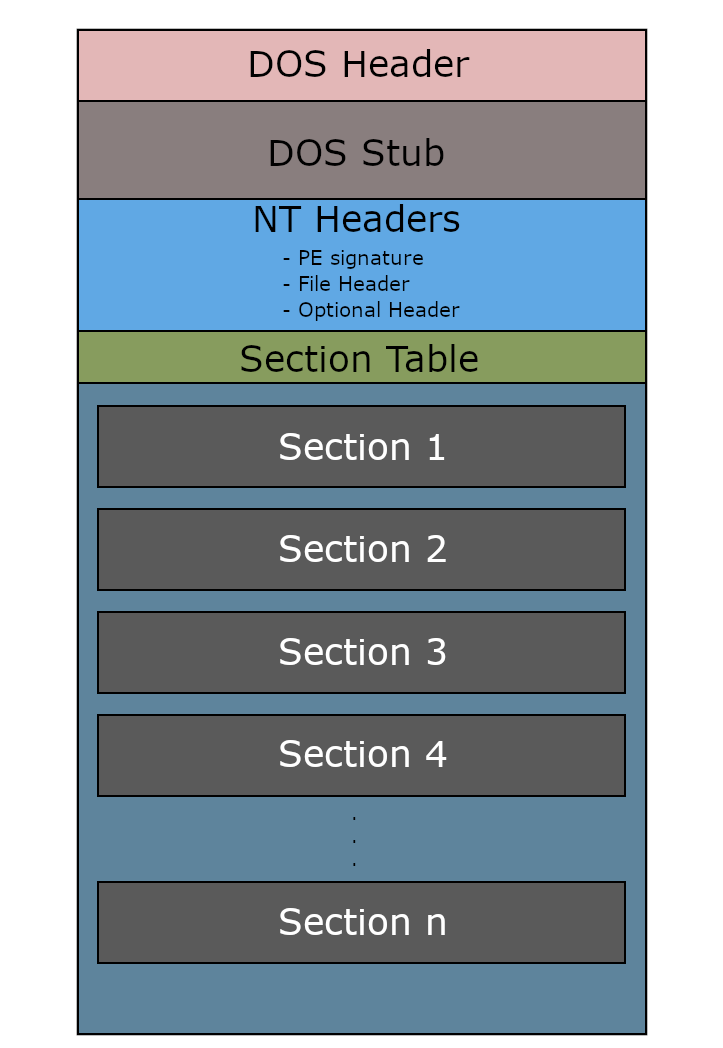

data types of features extracted from PE files: 

 - 'DOS_HEADER_e_magic': categorical,
 - 'DOS_HEADER_e_cblp': interval,
 - 'DOS_HEADER_e_cp': interval,
 - 'DOS_HEADER_e_crlc': interval,
 - 'DOS_HEADER_e_cparhdr': interval,
 - 'DOS_HEADER_e_minalloc': interval,
 - 'DOS_HEADER_e_maxalloc': interval,
 - 'DOS_HEADER_e_ss': interval,
 - 'DOS_HEADER_e_sp': interval,
 - 'DOS_HEADER_e_csum': interval,
 - 'DOS_HEADER_e_ip': interval?,
 - 'DOS_HEADER_e_cs': interval?,
 - 'DOS_HEADER_e_lfarlc': interval,
 - 'DOS_HEADER_e_ovno': interval,
 - 'DOS_HEADER_e_oemid': interval,
 - 'DOS_HEADER_e_oeminfo': interval,
 - 'DOS_HEADER_e_lfanew': interval,
 
 - 'FILE_HEADER_Machine': categorical,
 - 'FILE_HEADER_NumberOfSections': Interval, 
 - 'FILE_HEADER_TimeDateStamp': 1595906276,
 - 'FILE_HEADER_PointerToSymbolTable': Interval?,
 - 'FILE_HEADER_NumberOfSymbols': Interval,
 - 'FILE_HEADER_SizeOfOptionalHeader': Interval,
 - 'FILE_HEADER_Characteristics': categorical,
 
 - 'OPTIONAL_HEADER_Magic': categorical,
 - 'OPTIONAL_HEADER_MajorLinkerVersion': interval,
 - 'OPTIONAL_HEADER_MinorLinkerVersion': interval,
 - 'OPTIONAL_HEADER_SizeOfCode': interval,
 - 'OPTIONAL_HEADER_SizeOfInitializedData': interval,
 - 'OPTIONAL_HEADER_SizeOfUninitializedData': interval,
 - 'OPTIONAL_HEADER_AddressOfEntryPoint': interval,
 - 'OPTIONAL_HEADER_BaseOfCode': interval,
 - 'OPTIONAL_HEADER_ImageBase': interval,
 - 'OPTIONAL_HEADER_SectionAlignment': interval,
 - 'OPTIONAL_HEADER_FileAlignment': interval,
 - 'OPTIONAL_HEADER_MajorOperatingSystemVersion': interval,
 - 'OPTIONAL_HEADER_MinorSubsystemVersion': interval,
 - 'OPTIONAL_HEADER_SizeOfImage': interval,
 - 'OPTIONAL_HEADER_SizeOfHeaders': interval,
 - 'OPTIONAL_HEADER_CheckSum': interval,
 - 'OPTIONAL_HEADER_Subsystem': categorical,
 - 'OPTIONAL_HEADER_DllCharacteristics': 320,
 - 'OPTIONAL_HEADER_SizeOfStackReserve': interval,
 - 'OPTIONAL_HEADER_SizeOfStackCommit': interval,
 - 'OPTIONAL_HEADER_SizeOfHeapReserve': interval,
 - 'OPTIONAL_HEADER_SizeOfHeapCommit': interval,
 - 'OPTIONAL_HEADER_LoaderFlags': 0, zero, eliminate 
 - 'OPTIONAL_HEADER_NumberOfRvaAndSizes': interval,
 
 
 - 'SECTION_0_Name': categorical,
 - 'SECTION_0_Misc': 526830,
 - 'SECTION_0_Misc_PhysicalAddress': interval,
 - 'SECTION_0_Misc_VirtualSize': interval,
 - 'SECTION_0_VirtualAddress': interval,
 - 'SECTION_0_SizeOfRawData': interval,
 - 'SECTION_0_PointerToRawData': interval,
 - 'SECTION_0_PointerToRelocations': 0,
 - 'SECTION_0_PointerToLinenumbers': 0,
 - 'SECTION_0_NumberOfRelocations': 0,
 - 'SECTION_0_NumberOfLinenumbers': 0,
 - 'SECTION_0_Characteristics': categorical,
 
 
 

In [123]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25098 entries, 0 to 14629
Columns: 350 entries, DOS_HEADER_e_magic to Target
dtypes: float64(323), int64(1), object(26)
memory usage: 67.2+ MB


In [124]:
data.head()

DOS_HEADER_e_magic  DOS_HEADER_e_cblp  DOS_HEADER_e_cp  DOS_HEADER_e_crlc  \
0                 NaN                NaN              NaN                NaN   
1             23117.0              144.0              3.0                0.0   
2             23117.0              144.0              3.0                0.0   
3             23117.0              144.0              3.0                0.0   
4             23117.0              144.0              3.0                0.0   

   DOS_HEADER_e_cparhdr  DOS_HEADER_e_minalloc  DOS_HEADER_e_maxalloc  \
0                   NaN                    NaN                    NaN   
1                   4.0                    0.0                65535.0   
2                   4.0                    0.0                65535.0   
3                   4.0                    0.0                65535.0   
4                   4.0                    0.0                65535.0   

   DOS_HEADER_e_ss  DOS_HEADER_e_sp  DOS_HEADER_e_csum  ...  \
0              NaN              NaN                NaN  ...   
1              0.0            184.0                0.0  ...   
2              0.0            184.0                0.0  ...   
3              0.0            184.0                0.0  ...   
4              0.0            184.0                0.0  ...   

   SECTION_24_VirtualAddress  SECTION_24_SizeOfRawData  \
0                        NaN                       NaN   
1                        NaN                       NaN   
2                        NaN                       NaN   
3                        NaN                       NaN   
4                        NaN                       NaN   

   SECTION_24_PointerToRawData  SECTION_24_PointerToRelocations  \
0                          NaN                              NaN   
1                          NaN                              NaN   
2                          NaN                              NaN   
3                          NaN                              NaN   
4                          NaN                              NaN   

   SECTION_24_PointerToLinenumbers  SECTION_24_NumberOfRelocations  \
0                              NaN                             NaN   
1                              NaN                             NaN   
2                              NaN                             NaN   
3                              NaN                             NaN   
4                              NaN                             NaN   

   SECTION_24_NumberOfLinenumbers  SECTION_24_Characteristics  \
0                             NaN                         NaN   
1                             NaN                         NaN   
2                             NaN                         NaN   
3                             NaN                         NaN   
4                             NaN                         NaN   

                                          file_words  Target  
0                                    ollqs qago ncit       0  
1  this program cannot mode rich text rdata data ...       0  
2  this program cannot mode rich text rdata data ...       0  
3  this program cannot mode rrichl text rdata dat...       0  
4  this program cannot mode text rsrc reloc strin...       0  

[5 rows x 350 columns]

drop rows which doesnt have e_magic, which is a standart to have in PE files

In [125]:
data_clean = data[data["DOS_HEADER_e_magic"].notnull()]

I will identify missing variables for each feature as a new binary feature. As missing variables will be imputed, new feature will identify if variable was missing or not. However some of the variables might be missing by random. As it is random it doesn't bring any information for classification task. 

To identify those features, chi2 test of dependence where H0 - independent, H1 dependent will be used with alpha = 0.05. If p-value is higher than 0.05 we say that we don't have evidence to reject null hypothesis, meaning that feature is missing by random.

In [15]:
features_with_missing_values = data_clean.columns[data_clean.isnull().sum() > 0]
missing_values = data_clean[features_with_missing_values].isnull() # make dataset which identifies if variable is missing or not 
p_values = [stats.chi2_contingency(pd.crosstab(missing_values[column], data_clean["Target"]))[1] for column in features_with_missing_values]

In [16]:
features_missing_by_random = list(missing_values.columns[np.array(p_values) > 0.05])
print(features_missing_by_random)

['SECTION_20_Name', 'SECTION_20_Misc', 'SECTION_20_Misc_PhysicalAddress', 'SECTION_20_Misc_VirtualSize', 'SECTION_20_VirtualAddress', 'SECTION_20_SizeOfRawData', 'SECTION_20_PointerToRawData', 'SECTION_20_PointerToRelocations', 'SECTION_20_PointerToLinenumbers', 'SECTION_20_NumberOfRelocations', 'SECTION_20_NumberOfLinenumbers', 'SECTION_20_Characteristics', 'SECTION_21_Name', 'SECTION_21_Misc', 'SECTION_21_Misc_PhysicalAddress', 'SECTION_21_Misc_VirtualSize', 'SECTION_21_VirtualAddress', 'SECTION_21_SizeOfRawData', 'SECTION_21_PointerToRawData', 'SECTION_21_PointerToRelocations', 'SECTION_21_PointerToLinenumbers', 'SECTION_21_NumberOfRelocations', 'SECTION_21_NumberOfLinenumbers', 'SECTION_21_Characteristics', 'SECTION_22_Name', 'SECTION_22_Misc', 'SECTION_22_Misc_PhysicalAddress', 'SECTION_22_Misc_VirtualSize', 'SECTION_22_VirtualAddress', 'SECTION_22_SizeOfRawData', 'SECTION_22_PointerToRawData', 'SECTION_22_PointerToRelocations', 'SECTION_22_PointerToLinenumbers', 'SECTION_22_Numbe

I will drop missing variables of features which are missing by random  

In [17]:
missing_values_df = missing_values.drop(columns = features_missing_by_random).add_prefix("MISSING_")

now I will drop features with one unique value as it doesnt give any information for classification

In [18]:
features_with_one_unique_value = list(data_clean.columns[data_clean.nunique() == 1])

In [19]:
features_with_one_unique_value

['DOS_HEADER_e_magic',
 'OPTIONAL_HEADER_LoaderFlags',
 'SECTION_0_NumberOfRelocations',
 'SECTION_1_PointerToRelocations',
 'SECTION_1_NumberOfRelocations',
 'SECTION_2_PointerToRelocations',
 'SECTION_2_NumberOfRelocations',
 'SECTION_3_NumberOfRelocations',
 'SECTION_4_NumberOfRelocations',
 'SECTION_4_NumberOfLinenumbers',
 'SECTION_5_PointerToRelocations',
 'SECTION_5_PointerToLinenumbers',
 'SECTION_5_NumberOfRelocations',
 'SECTION_5_NumberOfLinenumbers',
 'SECTION_6_PointerToRelocations',
 'SECTION_6_PointerToLinenumbers',
 'SECTION_6_NumberOfRelocations',
 'SECTION_7_PointerToRelocations',
 'SECTION_7_NumberOfRelocations',
 'SECTION_8_PointerToRelocations',
 'SECTION_8_PointerToLinenumbers',
 'SECTION_8_NumberOfRelocations',
 'SECTION_8_NumberOfLinenumbers',
 'SECTION_9_PointerToRelocations',
 'SECTION_9_PointerToLinenumbers',
 'SECTION_9_NumberOfRelocations',
 'SECTION_9_NumberOfLinenumbers',
 'SECTION_10_PointerToRelocations',
 'SECTION_10_PointerToLinenumbers',
 'SECTION_10

lets drop those 



In [20]:
data_clean.drop(columns = set(features_with_one_unique_value + features_missing_by_random), inplace = True)

C:\Users\marty\AppData\Local\Temp\ipykernel_2732\1111550012.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean.drop(columns = set(features_with_one_unique_value + features_missing_by_random), inplace = True)


In [21]:
data_clean

DOS_HEADER_e_cblp  DOS_HEADER_e_cp  DOS_HEADER_e_crlc  \
1                  144.0              3.0                0.0   
2                  144.0              3.0                0.0   
3                  144.0              3.0                0.0   
4                  144.0              3.0                0.0   
5                  144.0              3.0                0.0   
...                  ...              ...                ...   
14625              144.0              3.0                0.0   
14626              144.0              3.0                0.0   
14627              144.0              3.0                0.0   
14628              144.0              3.0                0.0   
14629              144.0              3.0                0.0   

       DOS_HEADER_e_cparhdr  DOS_HEADER_e_minalloc  DOS_HEADER_e_maxalloc  \
1                       4.0                    0.0                65535.0   
2                       4.0                    0.0                65535.0   
3                       4.0                    0.0                65535.0   
4                       4.0                    0.0                65535.0   
5                       4.0                    0.0                65535.0   
...                     ...                    ...                    ...   
14625                   4.0                    0.0                65535.0   
14626                   4.0                    0.0                65535.0   
14627                   4.0                    0.0                65535.0   
14628                   4.0                    0.0                65535.0   
14629                   4.0                    0.0                65535.0   

       DOS_HEADER_e_ss  DOS_HEADER_e_sp  DOS_HEADER_e_csum  DOS_HEADER_e_ip  \
1                  0.0            184.0                0.0              0.0   
2                  0.0            184.0                0.0              0.0   
3                  0.0            184.0                0.0              0.0   
4                  0.0            184.0                0.0              0.0   
5                  0.0            184.0                0.0              0.0   
...                ...              ...                ...              ...   
14625              0.0            184.0                0.0              0.0   
14626              0.0            184.0                0.0              0.0   
14627              0.0            184.0                0.0              0.0   
14628              0.0            184.0                0.0              0.0   
14629              0.0            184.0                0.0              0.0   

       ...  SECTION_19_Name  SECTION_19_Misc  SECTION_19_Misc_PhysicalAddress  \
1      ...              NaN              NaN                              NaN   
2      ...              NaN              NaN                              NaN   
3      ...              NaN              NaN                              NaN   
4      ...              NaN              NaN                              NaN   
5      ...              NaN              NaN                              NaN   
...    ...              ...              ...                              ...   
14625  ...              NaN              NaN                              NaN   
14626  ...              NaN              NaN                              NaN   
14627  ...              NaN              NaN                              NaN   
14628  ...              NaN              NaN                              NaN   
14629  ...              NaN              NaN                              NaN   

       SECTION_19_Misc_VirtualSize  SECTION_19_VirtualAddress  \
1                              NaN                        NaN   
2                              NaN                        NaN   
3                              NaN                        NaN   
4                              NaN                        NaN   
5                              NaN                        NaN   
.

I will do one hot encoding for categorical and make characteristic features binary because it can have many combinations of messages

"SECTION_.*_Name" will be also dropped as it is text and we extracted text as a new feature

In [148]:
def transform_to_binary(number: bytes, bits : int) -> list:
    return list(map(int,list(bin(int(number))[2:].zfill(bits))))

def transform_binary_features(data: pd.DataFrame, features: list, bits: int) -> pd.DataFrame:
    df_colector = []
    for feature in features:
        series = data[feature].fillna(0)
        transformed_data = series.transform(transform_to_binary, bits = bits).to_list()
        column_names = [feature + "_" + str(i) for i in range(bits)]
        data_frame = pd.DataFrame(transformed_data, columns = column_names, dtype = np.int32)
        df_colector.append(data_frame)
    return pd.concat(df_colector, axis = 1)

In [149]:
file_header_Characteristics = transform_binary_features(data_clean, ["FILE_HEADER_Characteristics"], 16)
section_characteristics = transform_binary_features(data_clean,data_clean.filter(regex = "SECTION_.*_Characteristics").columns,32)

one hot encode categorical features

In [24]:
file_header_machine = pd.get_dummies(data_clean["FILE_HEADER_Machine"], prefix = "FILE_HEADER_Machine_")
optional_header_magic = pd.get_dummies(data_clean["OPTIONAL_HEADER_Magic"], prefix = "OPTIONAL_HEADER_Magic_")
optional_header_subsystem = pd.get_dummies(data_clean["OPTIONAL_HEADER_Subsystem"], prefix = "OPTIONAL_HEADER_Subsystem_")

drop processed features

In [26]:
cat_columns_to_drop = ["FILE_HEADER_Machine", "OPTIONAL_HEADER_Magic", "OPTIONAL_HEADER_Subsystem"]
section_names_columns = list(data_clean.filter(regex = "SECTION_.*_Name").columns)
section_characteristics_columns = list(data_clean.filter(regex = "SECTION_.*_Characteristics").columns)
cat_columns_to_drop = cat_columns_to_drop + section_names_columns + section_characteristics_columns
data_clean = data_clean.drop(columns= cat_columns_to_drop)

make one dataframe 

In [27]:
data_encoded = pd.concat([file_header_Characteristics.reset_index(drop = True),
                          file_header_machine.reset_index(drop = True),
                          optional_header_magic.reset_index(drop = True),
                          optional_header_subsystem.reset_index(drop = True),
                          section_characteristics.reset_index(drop = True)
                         ],
                         axis = 1)

lets drop encoded features which has only 1 unique value 

In [28]:
characteristics_bits_no_info = list(data_encoded.nunique().index[data_encoded.nunique() == 1])
data_encoded.drop(columns = characteristics_bits_no_info, inplace = True)

In [30]:
data_clean.fillna(0,inplace = True)

now I will check correlations between features as and will remove one of the highly correlated feature. in this way number of features will be reduced - model simplified 

<AxesSubplot:>

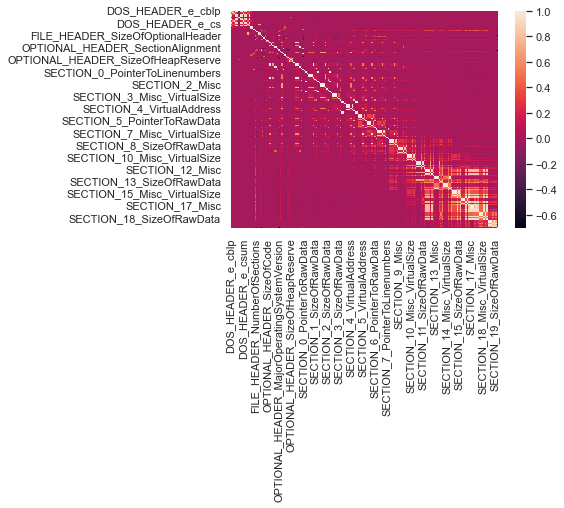

In [31]:
corr = data_clean.corr()
sns.set(rc={"figure.figsize": (50, 50)})
sns.heatmap(corr)

<AxesSubplot:>

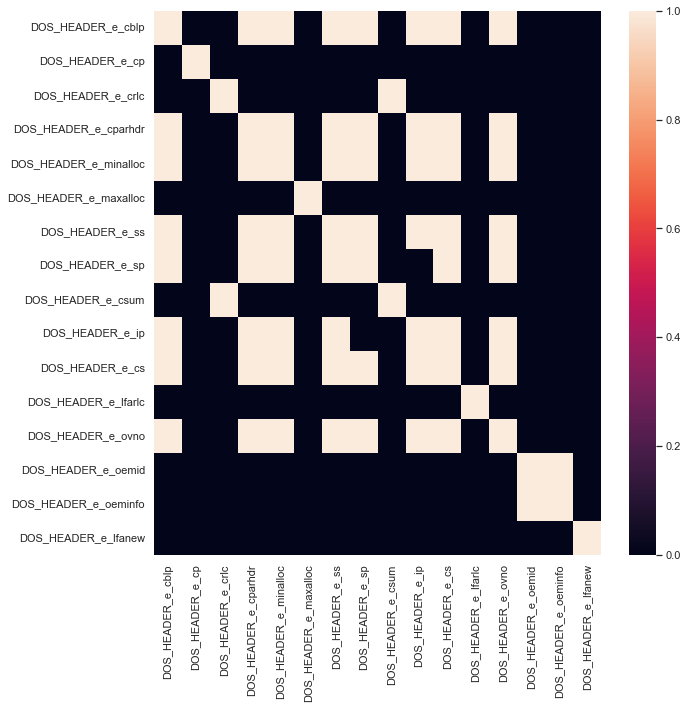

In [32]:
corr = data_clean.iloc[:,:16].corr()
sns.set(rc={"figure.figsize": (10, 10)})
sns.heatmap(abs(corr)>0.8)

In [33]:
dos_header_to_drop = ["DOS_HEADER_e_cparhdr",
                      "DOS_HEADER_e_minalloc",
                      "DOS_HEADER_e_ss",
                      "DOS_HEADER_e_cs",
                      "DOS_HEADER_e_ovno",
                      "DOS_HEADER_e_sp",
                      "DOS_HEADER_e_ip",
                      "DOS_HEADER_e_csum",
                      "DOS_HEADER_e_oeminfo"]

<AxesSubplot:>

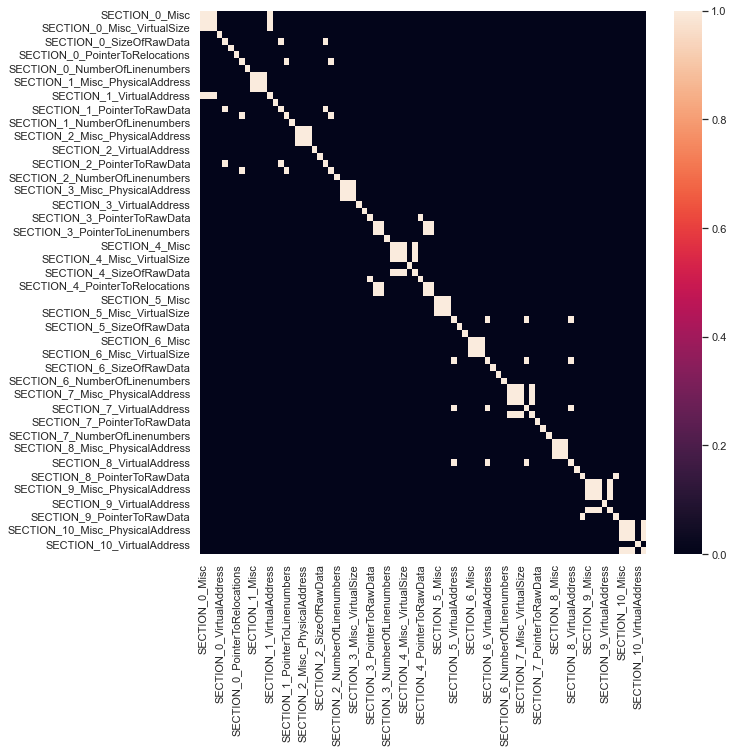

In [34]:
corr = data_clean.iloc[:,43:123].corr()
sns.heatmap(abs(corr)>0.8)

I can see that Misc_PhysicalAddress, Misc_VirtualSize are correlated with Misc, as a result only MISC will be kept 

lets drop those features 

In [35]:
data_clean.drop(columns = dos_header_to_drop, inplace = True)
section_columns_to_drop = data_clean.filter(regex = "(SECTION.*Misc_PhysicalAddress)|(SECTION.*Misc_VirtualSize)").columns
data_clean.drop(columns = section_columns_to_drop, inplace = True)

final dataset 

In [36]:
final_df = pd.concat([data_clean.reset_index(drop = True), missing_values_df.reset_index(drop = True), data_encoded.reset_index(drop = True)], axis = 1)

# MODEL TRAINING

## data split

I will separate target, text and structured features so structured(which is interval type) will be standardized 

In [37]:
target = final_df["Target"]
text = final_df["file_words"]
structured = final_df.drop(columns = ["Target", "file_words"])

words in text should be joined to one string as it will go through text vectoriser 

lets standardize structured data

In [39]:
scaler = StandardScaler()
structured_scaled = scaler.fit_transform(structured)

Now I will split data 

In [40]:
target.value_counts()

1    14619
0     9253
Name: Target, dtype: int64

classes are not balanced:
it will be assumed that both classes has equal importance.
I will use accuracy as one of the metrics and for this reason classes should be balanced that score wouldnd be biased for dominating class. 

data will be split to train/validation/test because at the end i want to have scores of the model which are not biased. 

for validation and test we will have 1000 samples of each class. 

  

In [41]:
target = target.to_numpy()
text = text.to_numpy()

In [43]:
sample_idx_1 = np.random.choice(np.where(target == 1)[0], size=1000, replace=False)
sample_idx_0 = np.random.choice(np.where(target == 0)[0], size=1000, replace=False)
sample_idx = np.concatenate((sample_idx_1, sample_idx_0),axis=0) 

X_test = structured_scaled[sample_idx]
text_test = text[sample_idx]
X_train = np.delete(structured_scaled, sample_idx, axis=0)
text_train = np.delete(text, sample_idx, axis=0)
Y_test = target[sample_idx]
Y_train = np.delete(target, sample_idx, axis=0)

In [45]:
sample_idx_1 = np.random.choice(np.where(Y_train == 1)[0], size=1000, replace=False)
sample_idx_0 = np.random.choice(np.where(Y_train == 0)[0], size=1000, replace=False)
sample_idx = np.concatenate((sample_idx_1, sample_idx_0),axis=0) 

X_valid = X_train[sample_idx]
X_train = np.delete(X_train, sample_idx, axis=0)
text_valid = text_train[sample_idx]
text_train = np.delete(text_train, sample_idx, axis=0)
Y_valid = Y_train[sample_idx]
Y_train = np.delete(Y_train, sample_idx, axis=0)

In [46]:
print(X_train.shape, X_valid.shape, X_test.shape)

(19872, 619) (2000, 619) (2000, 619)


In [47]:
# shuffle data
sample_idx = np.random.choice(range(X_train.shape[0]), size=X_train.shape[0], replace=False)
X_train = X_train[sample_idx]
text_train = text_train[sample_idx]
Y_train = Y_train[sample_idx]


## Metrics: 
    
to measure performance of the classifiers we will use accuracy, sensitivity, specificity, precision.

### random classifier 

In [48]:
y_pred = np.random.choice([0,1], size=2000, replace=True)

In [144]:
def print_metrics(cm):
    accuracy = (cm[0,0] + cm[1,1]) / (cm[0, 0] + cm[0, 1] + cm[1, 0] + cm[1, 1])
    sensitivity = (cm[0,0]) / (cm[0, 0] + cm[0, 1])
    specificity = (cm[1,1]) / (cm[1, 0] + cm[1, 1])
    precision = (cm[0,0]) / (cm[0, 0] + cm[1, 0])
    print("Accuracy: {}, Sensitivity {}, Specificity {}, Precision {}".format(accuracy, sensitivity, specificity, precision))
    return(accuracy, sensitivity, specificity, precision)

Accuracy: 0.505, Sensitivity 0.506, Specificity 0.504, Precision 0.5049900199600799


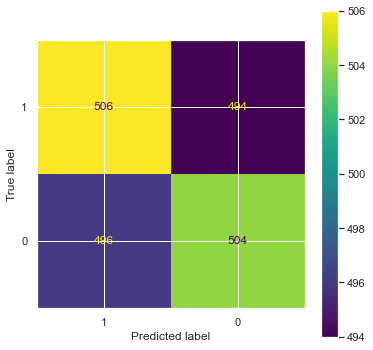

In [145]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

sns.set(rc={"figure.figsize": (6, 6)})
cm = confusion_matrix(Y_valid, y_pred, labels = [1,0])
print_metrics(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = [1,0])
disp.plot()

### Feed Forward NN 

to balance importance of classes I will calculate weights 

In [51]:
class_weights = compute_class_weight(class_weight = "balanced", classes = np.unique(Y_train), y = Y_train)
class_weights = {i : class_weights[i] for i in range(2)}

In [52]:
class_weights

{0: 1.3699158968702605, 1: 0.787384103336239}

now I will build a basic NN model with arbitrary number of layers. The best structure and parameters are not know so much more research should be done to find it. 

In [58]:
model = keras.Sequential(
    [
        layers.Dense(200, activation="relu", name="layer1", kernel_regularizer='l1'),
        layers.BatchNormalization(),
        layers.Dense(200, activation="relu", name="layer2", kernel_regularizer='l1'),
        layers.BatchNormalization(),
        layers.Dense(100, name="layer3"),
        layers.BatchNormalization(),
        layers.Dense(100, name="layer4"),
        layers.BatchNormalization(),
        layers.Dense(50, name="layer5"),
        layers.Dropout(.2),
        layers.Dense(1, activation = "sigmoid", name="output"),
    ]
)

callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
model.compile(optimizer='adam', loss='binary_crossentropy')

model.fit(X_train, Y_train, batch_size=300, epochs=300, class_weight = class_weights,  validation_data=(X_valid, Y_valid), callbacks = [callback])

Epoch 1/300
67/67 [==============================] - 5s 24ms/step - loss: 40.1033 - val_loss: 12.4790
Epoch 2/300
67/67 [==============================] - 1s 14ms/step - loss: 4.7489 - val_loss: 2.1895
Epoch 3/300
67/67 [==============================] - 1s 17ms/step - loss: 1.2610 - val_loss: 1.5633
Epoch 4/300
67/67 [==============================] - 2s 25ms/step - loss: 0.8731 - val_loss: 1.2262
Epoch 5/300
67/67 [==============================] - 2s 24ms/step - loss: 0.6834 - val_loss: 0.9375
Epoch 6/300
67/67 [==============================] - 2s 28ms/step - loss: 0.5883 - val_loss: 0.7596
Epoch 7/300
67/67 [==============================] - 1s 18ms/step - loss: 0.5877 - val_loss: 0.6458
Epoch 8/300
67/67 [==============================] - 2s 31ms/step - loss: 0.5637 - val_loss: 0.5456
Epoch 9/300
67/67 [==============================] - 2s 24ms/step - loss: 0.4744 - val_loss: 0.5233
Epoch 10/300
67/67 [==============================] - 1s 20ms/step - loss: 0.5349 - val_loss: 0.52

In [59]:
predictions = np.rint(model.predict(X_test)).reshape(-1)

63/63 [==============================] - 1s 5ms/step


Accuracy: 0.9485, Sensitivity 0.94, Specificity 0.957, Precision 0.9562563580874873


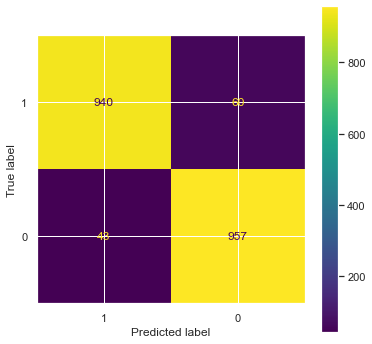

In [60]:
sns.set(rc={"figure.figsize": (6, 6)})
cm = confusion_matrix(Y_test, predictions, labels = [1,0])
print_metrics(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = [1,0])
disp.plot()

- accuracy shows how many percent of samples model classified correctly (a.k.a probability to classify correctly) this model has accuracy of 94.8%. 
- Sensitivity(recall) is a probability of detecting true positives (in our case malware). model has 94%.
- Specificity is a probability of detecting negatives (clean files). Model has 95.7%.
- Precision is a probability that positive prediction will actually be a true positive (the probability that predicted malware is actually a malware). this model 95.6%.


I wont go in details of the confusion matrix, but will leave here an self explanatory image from wikipedia
 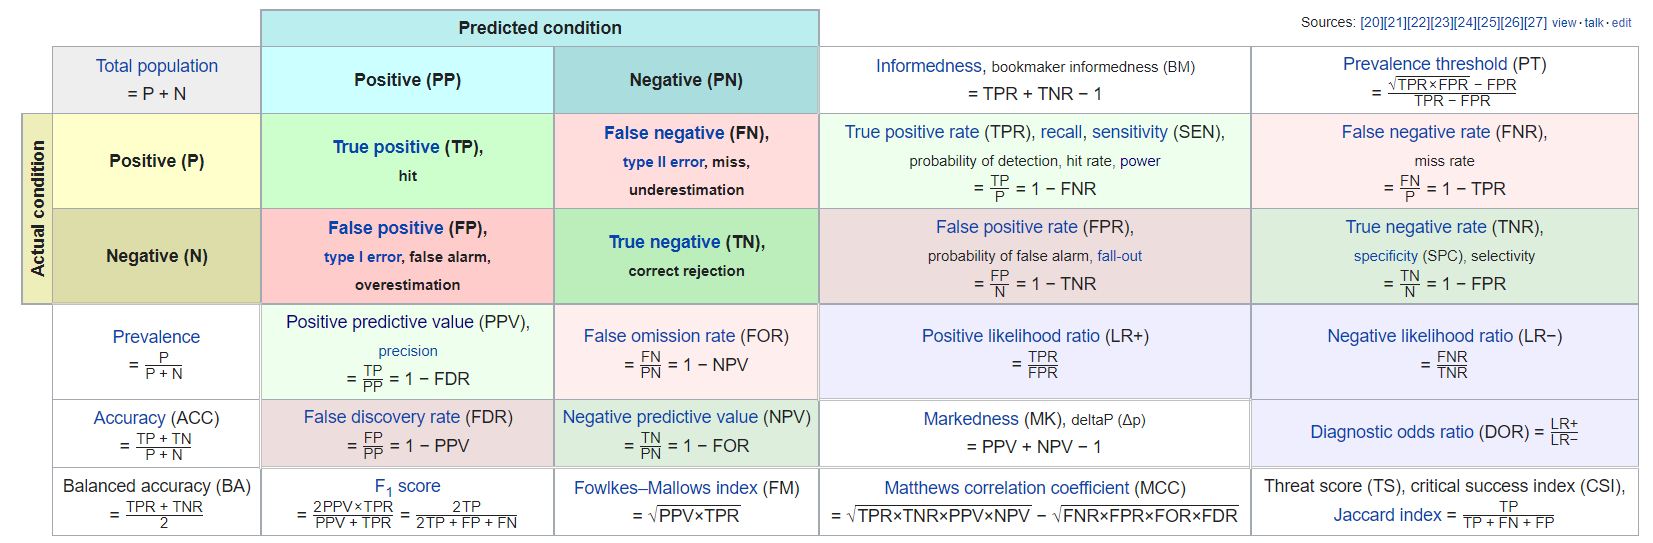

Decreasing a FPR: 

There are few ways to decrease a FPR for a classifier: 
1. we give more importance for negatives while training. 
2. we adjust a probability level to identify the class as a true negative. 

In both ways false negative rate would increase. see image  

other options is to find a better classifier. 
    
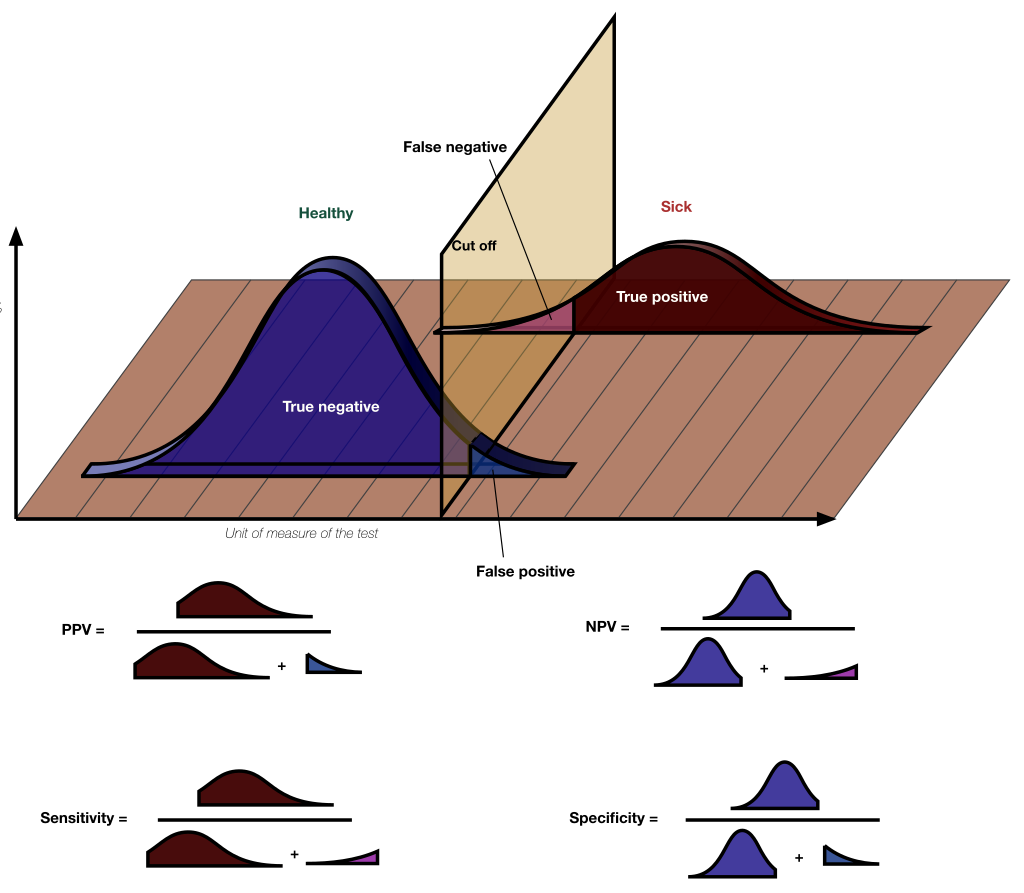

first of all we can check ROC curve which shows TPR on FPR

63/63 [==============================] - 0s 4ms/step


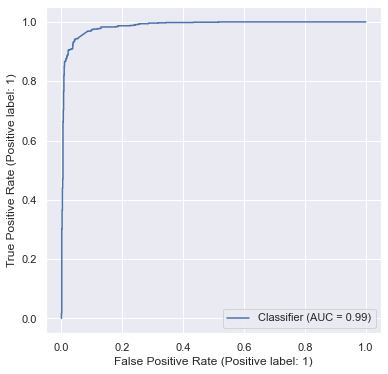

In [61]:
RocCurveDisplay.from_predictions(Y_test, model.predict(X_test))

we can see that by decreasing FPR, TPR will also decrease and quite drastically then FPR is low 

In [62]:
fpr, tpr, threshold = roc_curve(Y_test, model.predict(X_test))

63/63 [==============================] - 0s 4ms/step


In [63]:
thresholds = pd.DataFrame({"fpr": fpr, "tpr": tpr, "threshold": threshold})

thresholds[thresholds["fpr"] < 0.01]

fpr    tpr  threshold
0    0.000  0.000   1.999840
1    0.000  0.003   0.999840
2    0.000  0.007   0.999414
3    0.000  0.009   0.999376
4    0.000  0.013   0.999288
..     ...    ...        ...
116  0.009  0.820   0.947769
117  0.009  0.832   0.940621
118  0.009  0.834   0.937248
119  0.009  0.841   0.937176
120  0.009  0.850   0.926846

[121 rows x 3 columns]

as we can see in the table, to get fpr < 0.01 threshold should be at least 0.926. See results and confusion matrix down below where threshold is 0.926 for malware prediction.


In [64]:
predictions = model.predict(X_test) > 0.926

63/63 [==============================] - 0s 4ms/step


Accuracy: 0.9205, Sensitivity 0.85, Specificity 0.991, Precision 0.989522700814901


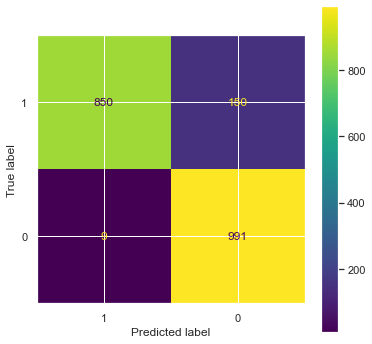

In [65]:
sns.set(rc={"figure.figsize": (6, 6)})
cm = confusion_matrix(Y_test, predictions, labels = [1,0])
print_metrics(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = [1,0])
disp.plot()

another method: give more weight for clean files while training. we will use same model structure, but importance for clean files will 4x bigger than for malware  

In [66]:
class_weights = {0: 4, 1: 1}

In [67]:

model = keras.Sequential(
    [
        layers.Dense(200, activation="relu", name="layer1", kernel_regularizer='l1'),
        layers.BatchNormalization(),
        layers.Dense(200, activation="relu", name="layer2", kernel_regularizer='l1'),
        layers.BatchNormalization(),
        layers.Dense(100, name="layer3"),
        layers.BatchNormalization(),
        layers.Dense(100, name="layer4"),
        layers.BatchNormalization(),
        layers.Dense(50, name="layer5"),
        layers.Dropout(.2),
        layers.Dense(1, activation = "sigmoid", name="output"),
    ]
)

callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
model.compile(optimizer='adam', loss='binary_crossentropy')

model.fit(X_train, Y_train, batch_size=300, epochs=300, class_weight = class_weights,  validation_data=(X_valid, Y_valid), callbacks = [callback])

Epoch 1/300
67/67 [==============================] - 5s 21ms/step - loss: 44.5283 - val_loss: 17.1381
Epoch 2/300
67/67 [==============================] - 1s 17ms/step - loss: 8.0300 - val_loss: 3.5206
Epoch 3/300
67/67 [==============================] - 2s 31ms/step - loss: 2.4067 - val_loss: 2.1535
Epoch 4/300
67/67 [==============================] - 2s 31ms/step - loss: 1.7146 - val_loss: 1.7024
Epoch 5/300
67/67 [==============================] - 2s 27ms/step - loss: 1.3088 - val_loss: 1.3798
Epoch 6/300
67/67 [==============================] - 1s 18ms/step - loss: 1.1454 - val_loss: 1.3110
Epoch 7/300
67/67 [==============================] - 2s 36ms/step - loss: 1.0967 - val_loss: 0.8781
Epoch 8/300
67/67 [==============================] - 2s 31ms/step - loss: 0.8555 - val_loss: 0.7548
Epoch 9/300
67/67 [==============================] - 1s 18ms/step - loss: 0.7988 - val_loss: 0.6767
Epoch 10/300
67/67 [==============================] - 1s 17ms/step - loss: 0.8221 - val_loss: 0.73

63/63 [==============================] - 0s 3ms/step
Accuracy: 0.9495, Sensitivity 0.941, Specificity 0.958, Precision 0.9572736520854527


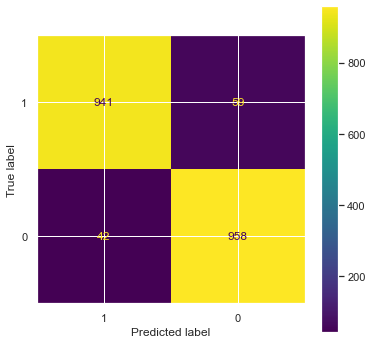

In [68]:
predictions = np.rint(model.predict(X_test)).reshape(-1)
sns.set(rc={"figure.figsize": (6, 6)})
cm = confusion_matrix(Y_test, predictions, labels = [1,0])
print_metrics(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = [1,0])
disp.plot()

results for model without weights for clean files are: Accuracy: 0.9485, Sensitivity 0.94, Specificity 0.957, Precision 0.956
        
as we can see specificity increased meaning FPR decresed, however Sensitivity(TPR) decreased         

## Other experiments

Dataset has a lot of features, yet most of them might be not that important and doesnt bring a lot of value. Here we will do a feature selection using ANOVA test and will compare models on same parameters. This test however has assumption that features follow normal distribution, which is incorrect for categorical features. 

In [76]:
selector = SelectKBest(score_func=f_classif, k=50)
selected_data = selector.fit_transform(structured, target)
sorted_features = pd.DataFrame({"scores": selector.scores_, "p_values": selector.pvalues_, "names": selector.feature_names_in_}).sort_values(by='scores', ascending=False)

In [77]:
sorted_features.head()

scores  p_values                             names
364  25599.172731       0.0     FILE_HEADER_Characteristics_7
366  24856.976686       0.0    FILE_HEADER_Characteristics_10
371  23951.333848       0.0        FILE_HEADER_Machine__332.0
11   23419.893920       0.0  FILE_HEADER_SizeOfOptionalHeader
378  23419.893920       0.0      OPTIONAL_HEADER_Magic__523.0

In [83]:
class_weights = compute_class_weight(class_weight = "balanced", classes = np.unique(Y_train), y = Y_train)
class_weights = {i : class_weights[i] for i in range(2)}

In [85]:
number_of_features = [i*20 for i in range(1,30)]

accuracy_res = []
sensitivity_res = []
specificity_res = []
precision_res = []
for i in number_of_features:
    print(i)
    feature_best_idx = sorted_features.index[:i]
    model = keras.Sequential(
        [
            layers.Dense(200, activation="relu", name="layer1", kernel_regularizer='l1'),
            layers.BatchNormalization(),
            layers.Dense(200, activation="relu", name="layer2", kernel_regularizer='l1'),
            layers.BatchNormalization(),
            layers.Dense(100, name="layer3"),
            layers.BatchNormalization(),
            layers.Dense(100, name="layer4"),
            layers.BatchNormalization(),
            layers.Dense(50, name="layer5"),
            layers.Dropout(.2),
            layers.Dense(1, activation = "sigmoid", name="output"),
        ]
    )

    callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
    model.compile(optimizer='adam', loss='binary_crossentropy')

    model.fit(X_train[:,feature_best_idx], Y_train, batch_size=300, epochs=300, class_weight = class_weights,  validation_data=(X_valid[:,feature_best_idx], Y_valid), callbacks = [callback], verbose = 0)
    predictions = np.rint(model.predict(X_test[:,feature_best_idx])).reshape(-1)
    cm = confusion_matrix(Y_test, predictions, labels = [1,0])
    accuracy, sensitivity, specificity, precision = print_metrics(cm)
    accuracy_res.append(accuracy)
    sensitivity_res.append(sensitivity)
    specificity_res.append(specificity)
    precision_res.append(precision)
    

20
63/63 [==============================] - 0s 3ms/step
Accuracy: 0.9315, Sensitivity 0.931, Specificity 0.932, Precision 0.9319319319319319
40
63/63 [==============================] - 0s 3ms/step
Accuracy: 0.9375, Sensitivity 0.963, Specificity 0.912, Precision 0.9162702188392008
60
63/63 [==============================] - 1s 4ms/step
Accuracy: 0.9465, Sensitivity 0.944, Specificity 0.949, Precision 0.9487437185929648
80
63/63 [==============================] - 0s 3ms/step
Accuracy: 0.9495, Sensitivity 0.952, Specificity 0.947, Precision 0.9472636815920398
100
63/63 [==============================] - 1s 3ms/step
Accuracy: 0.929, Sensitivity 0.96, Specificity 0.898, Precision 0.903954802259887
120
63/63 [==============================] - 0s 3ms/step
Accuracy: 0.938, Sensitivity 0.93, Specificity 0.946, Precision 0.9451219512195121
140
63/63 [==============================] - 0s 3ms/step
Accuracy: 0.909, Sensitivity 0.859, Specificity 0.959, Precision 0.9544444444444444
160
63/63 [=====

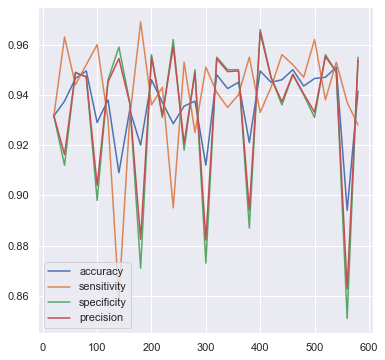

In [86]:
plt.plot(number_of_features, accuracy_res)
plt.plot( number_of_features, sensitivity_res)
plt.plot( number_of_features, specificity_res)
plt.plot(number_of_features, precision_res)
plt.legend(labels = ["accuracy","sensitivity", "specificity", "precision"])

It is hard to comment about the results of the model as we dont know the variance of scored. However it looks that metrics are not incresing much while number of features is incresing. To simplify model most of the features could be dropped and only little of the scores will be lost .

# BONUS TASKS 

## text extraction 



In [90]:
len_words = [len(i.split(" ")) for i in text]
np.average(len_words)

2250.3146782841823

### model 1 : 

First we will have an assumption that text words in text files going in sequence has no meaning. Sentences in the text will be tokeniszed using word tokeniser which will remember 5000 most frequent words. later words will be vectorised using word embedding layer. Length of sentences will be an average number of words in all extracted sentences - 2250.
    
    

In [92]:
vectorize_layer = keras.layers.TextVectorization(
                    max_tokens= 5000,
                    output_mode='int',
                    output_sequence_length=2250)


In [94]:
vectorize_layer.adapt(text_train)

In [106]:
X_train_text_vectorised = vectorize_layer(text_train)
X_valid_text_vectorised = vectorize_layer(text_valid)
X_test_text_vectorised = vectorize_layer(text_test)

In [96]:
X_train_text_vectorised[0]

<tf.Tensor: shape=(2250,), dtype=int64, numpy=array([36, 71, 54, ...,  0,  0,  0], dtype=int64)>

In [131]:
feature_input = Input((619, ))
text_input = Input(shape = (2250,), name='text_vec')


x2 = layers.Embedding(5000, 4)(text_input)
x2 = layers.Flatten()(x2)
x = layers.Concatenate()([feature_input, x2])
x = layers.Dense(200, activation="relu", name="layer1", kernel_regularizer='l1')(x)
x = layers.BatchNormalization()(x)
x = layers.Dense(200, activation="relu", name="layer2", kernel_regularizer='l1')(x)
x = layers.BatchNormalization()(x)
x = layers.Dense(100, name="layer3")(x)
x = layers.BatchNormalization()(x)
x = layers.Dense(100, name="layer4")(x)
x = layers.BatchNormalization()(x)
x = layers.Dense(50, name="layer5")(x)
x = layers.Dropout(.2)(x)
outputs = layers.Dense(1, activation = "sigmoid", name="output")(x)

model = keras.Model(inputs=[feature_input, text_input], outputs=outputs, name="modelWithText")

In [132]:
callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)
model.compile(optimizer='adam', loss='binary_crossentropy')

history = model.fit((X_train, X_train_text_vectorised), Y_train, batch_size=300, epochs=300, class_weight = class_weights,  validation_data=((X_valid, X_valid_text_vectorised), Y_valid), callbacks = [callback])

Epoch 1/300
67/67 [==============================] - 6s 68ms/step - loss: 56.9554 - val_loss: 10.7908
Epoch 2/300
67/67 [==============================] - 5s 68ms/step - loss: 5.8833 - val_loss: 4.1149
Epoch 3/300
67/67 [==============================] - 5s 82ms/step - loss: 3.3503 - val_loss: 3.8292
Epoch 4/300
67/67 [==============================] - 6s 83ms/step - loss: 2.9250 - val_loss: 3.2268
Epoch 5/300
67/67 [==============================] - 5s 80ms/step - loss: 2.6824 - val_loss: 2.9983
Epoch 6/300
67/67 [==============================] - 5s 80ms/step - loss: 2.6376 - val_loss: 2.9789
Epoch 7/300
67/67 [==============================] - 6s 82ms/step - loss: 2.5992 - val_loss: 2.6818
Epoch 8/300
67/67 [==============================] - 5s 78ms/step - loss: 2.5163 - val_loss: 2.5928
Epoch 9/300
67/67 [==============================] - 5s 79ms/step - loss: 2.5267 - val_loss: 2.5354
Epoch 10/300
67/67 [==============================] - 6s 90ms/step - loss: 2.5038 - val_loss: 2.52

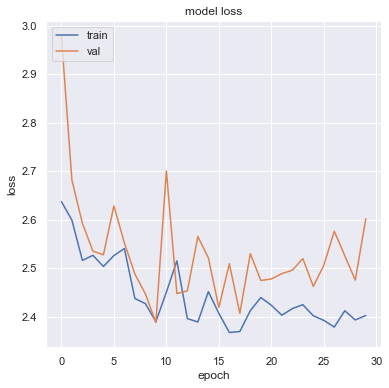

In [133]:
# summarize history for loss
plt.plot(history.history['loss'][5:])
plt.plot(history.history['val_loss'][5:])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

63/63 [==============================] - 0s 5ms/step
Accuracy: 0.9635, Sensitivity 0.966, Specificity 0.961, Precision 0.9611940298507463


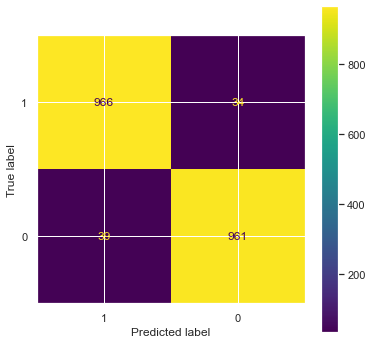

In [134]:
predictions = np.rint(model.predict((X_test, X_test_text_vectorised))).reshape(-1)
#sns.set(rc={"figure.figsize": (6, 6)})
cm = confusion_matrix(Y_test, predictions, labels = [1,0])
print_metrics(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = [1,0])
disp.plot()

simple feed forward NN results Accuracy: 0.9485, Sensitivity 0.94, Specificity 0.957, Precision 0.9562563580874873

model with embedding layer has a little bit higher accuracy and sensitivity, but lower Specificity and precision. 

Accuracy increased by 1% which is not that significant 

### model 2. assuming that text has sequence 



In [135]:
feature_input = Input((619, ))
text_input = Input(shape = (2250,), name='text_vec')


x2 = layers.Embedding(5000, 4)(text_input)
x2 = layers.LSTM(10)(x2)
x2 = layers.Flatten()(x2)
x = layers.Concatenate()([feature_input, x2])
x = layers.Dense(200, activation="relu", name="layer1", kernel_regularizer='l1')(x)
x = layers.BatchNormalization()(x)
x = layers.Dense(200, activation="relu", name="layer2", kernel_regularizer='l1')(x)
x = layers.BatchNormalization()(x)
x = layers.Dense(100, name="layer3")(x)
x = layers.BatchNormalization()(x)
x = layers.Dense(100, name="layer4")(x)
x = layers.BatchNormalization()(x)
x = layers.Dense(50, name="layer5")(x)
x = layers.Dropout(.2)(x)
outputs = layers.Dense(1, activation = "sigmoid", name="output")(x)

model = keras.Model(inputs=[feature_input, text_input], outputs=outputs, name="modelWithText")

In [137]:
callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)
model.compile(optimizer='adam', loss='binary_crossentropy')
history = model.fit((X_train, X_train_text_vectorised), Y_train, batch_size=300, epochs=300, class_weight = class_weights,  validation_data=((X_valid, X_valid_text_vectorised), Y_valid), callbacks = [callback])

Epoch 1/300
67/67 [==============================] - 90s 1s/step - loss: 40.6796 - val_loss: 12.7483
Epoch 2/300
67/67 [==============================] - 83s 1s/step - loss: 4.8362 - val_loss: 2.2154
Epoch 3/300
67/67 [==============================] - 84s 1s/step - loss: 1.3026 - val_loss: 1.4314
Epoch 4/300
67/67 [==============================] - 81s 1s/step - loss: 0.9637 - val_loss: 1.3056
Epoch 5/300
67/67 [==============================] - 81s 1s/step - loss: 0.7285 - val_loss: 0.9996
Epoch 6/300
67/67 [==============================] - 82s 1s/step - loss: 0.6600 - val_loss: 0.8207
Epoch 7/300
67/67 [==============================] - 92s 1s/step - loss: 0.5468 - val_loss: 0.6730
Epoch 8/300
67/67 [==============================] - 95s 1s/step - loss: 0.5208 - val_loss: 0.6066
Epoch 9/300
67/67 [==============================] - 95s 1s/step - loss: 0.5037 - val_loss: 0.5302
Epoch 10/300
67/67 [==============================] - 95s 1s/step - loss: 0.5028 - val_loss: 0.5861
Epoch 1

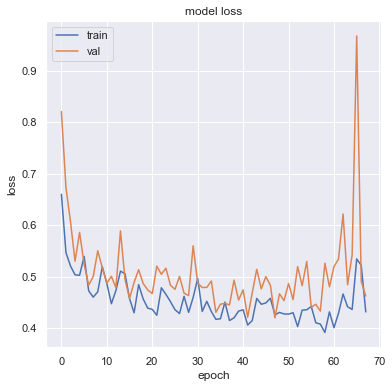

In [139]:
# summarize history for loss
plt.plot(history.history['loss'][5:])
plt.plot(history.history['val_loss'][5:])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

63/63 [==============================] - 11s 166ms/step
Accuracy: 0.9245, Sensitivity 0.97, Specificity 0.879, Precision 0.8890925756186985


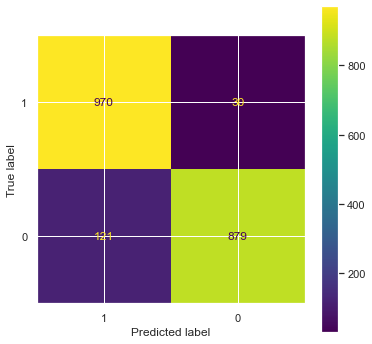

In [140]:
predictions = np.rint(model.predict((X_test, X_test_text_vectorised))).reshape(-1)
cm = confusion_matrix(Y_test, predictions, labels = [1,0])
print_metrics(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = [1,0])
disp.plot()

from the results it can be seen that accuracy is lower than for previous models, however it can be noticed that model overfitted, (validation loss started to increase). 

## binary representation 

After analysing few research papers like Youngbok Cho, Dynamic RNN -CNN based Malware Classifier for Deep Learning Algorithm I found that for malware classification it is common to represent file as an image where 0 would be white pixel and 1 black pixel. It is assumed that image of virus files will be similar in some kind of way and image classification tehniques can be used. Some papers use Convolutional LSTM layers because file size is not fixed. 

This method was not done because of memory and time limitaions. 

In [100]:
with open(".\\data\\31DszY6IlYSOH9dEuB3DErnchhubkB41.dll", "rb") as f:
    contents = f.read()

In [107]:
s = BitArray(bytes = contents)

In [109]:
s.bin

'010011010101101010010000000000000000001100000000000000000000000000000100000000000000000000000000111111111111111100000000000000001011100000000000000000000000000000000000000000000000000000000000010000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000110110000000000000000000000000000000111000011111101110100000111000000000101101000000100111001101001000011011100000000001010011001100110100100001010101000110100001101001011100110010000001110000011100100110111101100111011100100110000101101101001000000110001101100001011011100110111001101111011101000010000001100010011001010010000001110010011101010110111000100000011010010110111000100000010001000100111101010011001000000110110101101111011001000110010100101110000011010000110100001010001001000000000000000000000000000000000

In [116]:
def using_putdata(value):
    cmap = {'0': (255,255,255),
            '1': (0,0,0)}

    data = [cmap[letter] for letter in value]
    img = Image.new('RGB', (64, len(value)//64), "white")
    img.putdata(data)
    return img

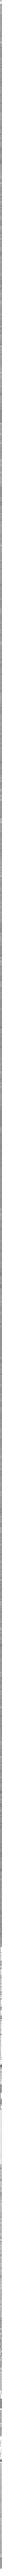

In [117]:
using_putdata(s.bin)

In [122]:
image = np.array(list(s.bin))

In [126]:
image.reshape((-1,16,1)).shape

(349184, 16, 1)

In [2]:
def extract_bits(path: str) -> str:
    with open(path, "rb") as f:
        contents = f.read()
        s = BitArray(bytes = contents)
    return s.bin

In [3]:
path_0 = './data/0'
files = os.listdir(path_0)

binary_strings_0 = []
for file in tqdm(files):
    binary_strings_0.append(extract_bits(path_0 + "/" + file))

100%|██████████| 10469/10469 [02:03<00:00, 84.43it/s] 


In [ ]:
path_1 = './data/1'
files = os.listdir(path_1)

binary_strings_1 = []
for file in tqdm(files):
    binary_strings_1.append(extract_bits(path_1 + "/" + file))

 26%|██▋       | 3854/14630 [02:13<07:37, 23.53it/s]  

# Conclusions 

In this task a classifier to identify benign files from malware was trained. First the PE file structure was explored and all features were exctracted. During data preprocessing features which might not give any benefit for classification were removed, missing values were imputed. Several classifiers were examined: simple feed forward NN, and NN with embedding layer and another with LSTM were trained. Models were evaluated using accuracy, sensitivity, specificity and precision. All of the classifiers had accuracy higher than 92%. The highest accuracy was reached with a model who had embedding layer for text encoding which was 96.35%.
Feature selection using ANOVA test was explored, it was noted that more than half of the features used for training could be dropped and only a minimal amount of accuracy would be lost. The methods to use binary data from files were explored, however due to computer resource and time limitations it could not be implemented. 
